In [1]:
import statistics
import math
import os
import re
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tqdm import tqdm
from collections import Counter
from itertools import combinations
from warnings import simplefilter

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import r_regression
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score


In [2]:
# uncomment one or two of the lines below to adjust max visible columns/rows in the data frames

# pd.set_option("display.max_rows", 10)
# pd.set_option("display.max_columns", 10)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)


In [3]:
# If the relative path doesn't work for you, please paste an absolute path for "diagnosis", "patient", and "transcript"
diagnosis = "../Final-proj-Alain-Tamazian/data/diagnosis.csv"
patient = "../Final-proj-Alain-Tamazian/data/patient.csv"
transcript = "../Final-proj-Alain-Tamazian/data/transcript.csv"

diagnosis_df = pd.read_csv(diagnosis, index_col="PatientGuid")
patient_df = pd.read_csv(patient, index_col="PatientGuid")
transcript_df = pd.read_csv(transcript, index_col="PatientGuid")


In [4]:
# display(diagnosis_df)
# display(patient_df)
# display(transcript_df)


In [5]:

diagnosis2_df = pd.concat([patient_df.loc[:, "Age"], diagnosis_df], axis=1)
# display(diagnosis2_df)


In [6]:
dataset = pd.concat([transcript_df, diagnosis2_df], axis=1)
display(dataset)


Height_Max  Weight_Max  BMI_Max  \
00023761-9D8D-445B-874C-2424CC7CF620   68.000000      185.00   28.972   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1   67.000000      137.00   22.796   
000B4862-7CE7-4EC5-8043-A97FCD74BD78   65.896726      100.09   16.654   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109   71.500000      215.00   29.983   
002667F4-B9A3-4DE2-875F-8034DD637865   65.896726      109.00   22.013   
...                                          ...         ...      ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353   74.200000      202.50   25.857   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E   65.896726      141.40   25.860   
FFEF293B-6147-47F0-8F0B-76180C124205   60.000000      193.60   37.806   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6   72.000000      214.60   29.565   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63   67.000000      167.00   26.153   

                                      SystolicBP_Max  DiastolicBP_Max  \
00023761-9D8D-445B-874C-2424CC7CF620      134.000000        86.000000   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1      152.000000        82.000000   
000B4862-7CE7-4EC5-8043-A97FCD74BD78      126.728523        76.451297   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109      130.000000        80.000000   
002667F4-B9A3-4DE2-875F-8034DD637865      160.000000        90.000000   
...                                              ...              ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353      138.000000        91.000000   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E      126.728523        76.451297   
FFEF293B-6147-47F0-8F0B-76180C124205      132.000000        88.000000   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6      171.000000        95.000000   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63      176.000000        95.000000   

                                      RespiratoryRate_Max  Temperature_Max  \
00023761-9D8D-445B-874C-2424CC7CF620            16.915026        97.900000   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1            16.915026        98.600000   
000B4862-7CE7-4EC5-8043-A97FCD74BD78            20.000000        97.765331   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109            16.915026        97.765331   
002667F4-B9A3-4DE2-875F-8034DD637865            20.000000        97.765331   
...                                                   ...              ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353            19.000000        97.765331   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E            24.000000        97.800000   
FFEF293B-6147-47F0-8F0B-76180C124205            16.915026        96.800000   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6            16.915026        98.500000   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63            16.915026        98.600000   

                                      Height_Min  Weight_Min  BMI_Min  \
00023761-9D8D-445B-874C-2424CC7CF620   67.000000       182.0   27.670   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1   65.000000         0.0    0.000   
000B4862-7CE7-4EC5-8043-A97FCD74BD78   65.000000         0.0    0.000   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109   65.896726         0.0    0.000   
002667F4-B9A3-4DE2-875F-8034DD637865   59.000000         0.0    0.000   
...                                          ...         ...      ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353   65.896726         0.0    0.000   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E   62.000000         0.0    0.000   
FFEF293B-6147-47F0-8F0B-76180C124205   60.000000       191.8   37.454   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6   65.896726       212.0    0.000   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63   65.896726         0.0    0.000   

                                      SystolicBP_Min  DiastolicBP_Min  \
00023761-9D8D-445B-874C-2424CC7CF620           120.0             62.0   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1           125.0             59.0   
000B4862-7CE7-4EC5-8043-A97FCD74BD78            80.0             56.0   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109           125.0             75.0   
002667F4-B9A3-4DE2-875F-8034DD637865           112.0             70.0   
...                             

0 Height_Max


PatientGuid  IQR Method
0  34BE1AB7-01D7-440D-81AB-8BE5EB2F48A4        54.0
1  60279539-9521-46B9-8DF4-81FBDA08ECF2        56.5
2  9C3CA08C-DADC-444E-87CD-555F3F1E1996        56.0
3  A85B64C5-9454-4063-8403-C07C710D0A2D        56.0
4  E843942B-5EED-44F8-8198-D5D3DA1EF8A3        56.5
5  F6F90681-FDFA-47B5-BA46-189F1D29AD14        56.0

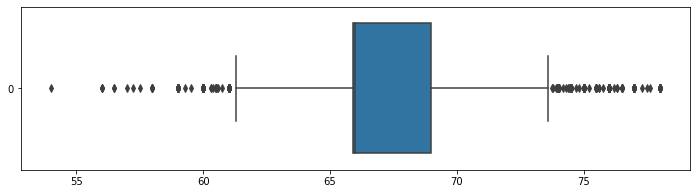


1 Weight_Max


PatientGuid  IQR Method
0   18BC11B4-EBF1-4BF1-B9E7-C11055BC6A14     449.743
1   1B0556CF-72DF-480E-8429-DF61C252F16F     425.000
2   1EA808B2-72A4-4C6E-A716-300B9C838915     423.000
3   25785CFF-F39F-4BA6-8DE3-A5530008DD5B     418.878
4   2A52F349-5132-42AC-ABF9-3D803261D580     451.000
5   2FB646C2-6591-4DEF-B48E-D011515C02F8     418.878
6   30A7AAC7-C241-48BE-8A69-58FC73BE481F     451.948
7   3883F426-565D-496E-BA34-13FBEF03EB7E     448.420
8   3FA7FB3D-1998-434B-876F-A68DB154BC8D     451.948
9   4AEE26AF-745F-4B74-8542-1B719B25B8B9     423.300
10  6719844D-4EF6-47C9-8C73-EF7BB61C2BA4     416.674
11  9C8A25F3-4F46-4350-976E-D30F0BE0E413     432.106
12  A6468F7F-417A-4261-AC6D-D64F8E2228A9     440.000
13  B16E2F06-7EB4-44BB-91B3-795D90BED43B     451.948
14  C85A8A29-9C32-4B1A-B97A-40DFA987EB09     445.000
15  CDDA9B54-D578-4A83-B777-9B6816C0EE91     423.288
16  CED5D2BF-3C3A-47B8-868D-AC27DD88CFCF     429.901
17  F65CCB07-8354-4B70-8C2A-E3A40F0CC496     449.743

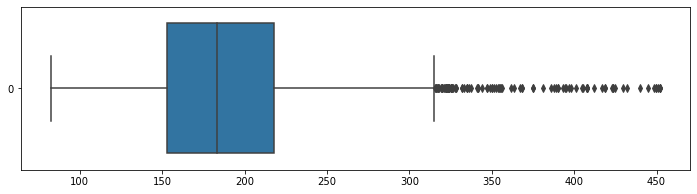


2 BMI_Max


PatientGuid  IQR Method
0   03C055C2-B11D-41AB-B9CD-FC73EA7CF85E      60.458
1   1A883AAC-0DBF-4981-B35D-3C34B96897A2      60.271
2   1EA808B2-72A4-4C6E-A716-300B9C838915      61.024
3   2A7D81AE-0089-4269-B7DA-70182F54D8E9      68.652
4   498421C5-3895-47FC-9312-0EF9B85ED820      67.503
5   530720D7-65C6-4E24-89A9-DAE0E5259154      69.207
6   5883AF5C-513F-4F2A-B204-762AAF6963E6      62.098
7   5BA1DD3D-3E94-46D6-AA6E-CA96FAD120A3      60.328
8   63D44CA0-2BE6-4736-B6EA-A539C26A9531      62.899
9   763112F7-6F43-43D7-B745-75C0506E4197      62.779
10  77D719CC-C139-411D-A575-2860A1C01BEF      65.806
11  A6468F7F-417A-4261-AC6D-D64F8E2228A9      63.127
12  E1D71461-4283-4B69-ADE6-71CB047AC17A      66.483
13  EB494A20-8414-47D3-BE0B-6F00FA0FCB9E      60.271

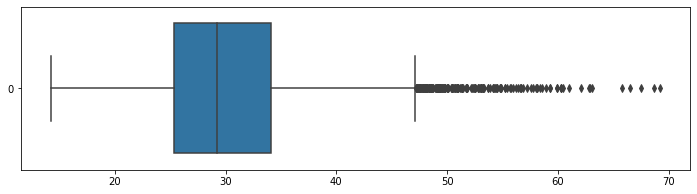


3 SystolicBP_Max


PatientGuid  IQR Method
0  3A822D7B-A7C2-4EC1-92B8-CD1A35C031BE       238.0
1  6F0E750E-5BCD-4ABE-B4F0-FBBA856565B4       230.0
2  760436A9-E94B-4FA0-803C-F360EAF82F47       270.0
3  8DB692FC-4383-41B1-A950-03E2E954CFD5       240.0
4  971ABA70-6F5F-422E-8382-5ABC62AA8F2F       230.0
5  A08C57E2-753C-4A06-8CB0-53FB309E656C       230.0
6  C56D0649-A5E6-4BB2-AFF6-E680F1ED6B2F       227.0
7  E1D71461-4283-4B69-ADE6-71CB047AC17A       240.0

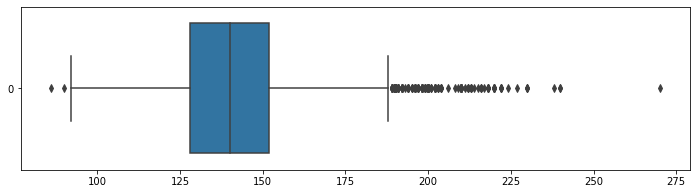


4 DiastolicBP_Max


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

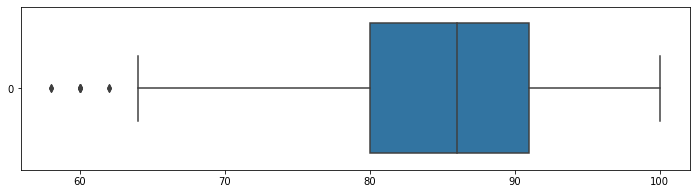


5 RespiratoryRate_Max


PatientGuid  IQR Method
0   02D318BB-B886-4D6F-BF98-8AF41F4023A8        36.0
1   03C5142D-319A-4D46-B726-81196F08927E        48.0
2   047FD84D-8B1C-4DD3-AEFE-CCAD275CCF91        44.0
3   096A281C-7C60-4F6D-B0E5-195192752C54        76.0
4   0CE143F6-78DE-4509-A101-6F774A4F5B6A        60.0
..                                   ...         ...
62  CD84E45F-F40A-4095-9439-395E0A5C0491        73.0
63  E109BFE0-E824-4E7A-A5C4-34EBF6F2D6E0        34.0
64  FA3C6FDE-35A0-46DC-B284-9EA293C20D3C        61.0
65  FBF3DE89-BC83-4407-9DBE-7B29C13A0ACB        36.0
66  FC928FD9-8124-4095-B2C6-ECB7A4CC4862        61.0

[67 rows x 2 columns]

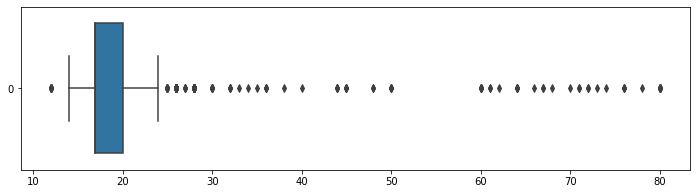


6 Temperature_Max


PatientGuid  IQR Method
0   006948F2-1118-4F56-A561-6A254EE357C6       102.6
1   00B7C61A-82E5-42E1-B9C0-6B39C5BC552F       103.0
2   083C6B1A-CFB1-4C4D-B97D-0548171A9FE2       103.0
3   0B83EC0A-F830-4955-9213-912816DB32FB       102.3
4   0CF2A715-8C77-4D0E-B775-808E4F3E0F07       102.1
5   124238D1-FCDB-4D48-A43C-4B38F8E2E61D       102.1
6   168E854D-3627-471E-A388-0E477C5B01B2       103.0
7   1B36BD01-707C-44F4-9070-F534A9DC5541       104.2
8   1B9B36F1-1A1A-4EFF-99B5-D0F31E6A291C       102.1
9   1BAD1433-9802-4ADB-A667-9B89FA381BC6       103.0
10  1CFE0F7B-95F5-4EFC-B814-6D2343681C38       103.6
11  1EA808B2-72A4-4C6E-A716-300B9C838915       105.0
12  2F83BEA5-AA67-42FA-95E0-ED594F0A96CC       103.8
13  34B284C1-8560-460C-BC70-1D66376A51A9       104.0
14  3817E750-E51E-4F8C-B012-D97E2C7AB82E       103.6
15  3BB3763A-838E-4ADA-B8C5-1981640C1EC3       102.3
16  3D14C099-BF03-44AB-A9FC-99A2BFEE134B       102.5
17  3D61E389-64CE-48DC-BEC0-5EE371006563       102.2
18  3EEB996D-3831-4EAD-95A1-EF7EC05FE5F9       102.8
19  42320C55-4C1A-42DF-A024-0ED1BA4ADADD       102.0
20  425C3D38-C43E-4E78-95C8-0D0C58266AA5       103.5
21  52C3AD27-FAAE-48DF-9803-4E307CA8B0EC       104.7
22  53BABCAD-A094-405B-BFC5-E0B07AF9653A       102.0
23  53EA7F3C-22F8-4247-BE0E-66DEA70B7728       103.0
24  59AA8FC7-F01D-4296-A20A-D65317C79187       102.5
25  5D438E9C-84D3-4CA7-91F7-E91D777D25AB       103.4
26  622B4B02-DAC4-4ADE-91F9-54C9D4B45D37        93.6
27  7656A579-3B4B-40CF-976C-752246147A4F       102.3
28  775BF643-5BB2-44C0-8C60-B8B9E7D63269       102.5
29  7EB4E97F-FA91-44E5-ADBF-61B10A8AB068       102.5
30  7FE5A367-AF3F-4F1D-9760-859525B75F1A       102.4
31  8E6998FA-E69E-4D7B-AC6C-5EEF2838516C       103.8
32  9308EB40-647E-4F5F-B1C6-3FC6BF82A7CE       102.4
33  9379E14D-8A3E-4982-95EB-73BBF2CE1D83       102.0
34  9C52601E-5670-41DD-BC96-6D652CD1792C       103.0
35  9DEB3C36-6C37-4339-AF65-642AD364395C       102.0
36  A6DED543-EA29-40E0-8935-D652A8E6038E       102.0
37  B401E703-EDA7-4046-A8A9-CC4B105866FC       102.0
38  B688190F-A837-4769-9059-F766E35FDD24       103.2
39  B8481F3D-3E6B-4099-A63B-10B4409FDF75       102.9
40  B94E6051-46E2-4A8D-BBDD-C67D4A8506A0       102.9
41  BB320ECA-E45B-4617-A63B-6E02246DB529       106.0
42  C065E34B-C0CC-4239-BC25-292F5E734805       102.6
43  D0A3E98E-12C2-48BE-A0DD-2440F888F3B9       103.0
44  D6BCF178-C8E7-4B89-BDE2-E4A9763CAE5E       107.5
45  DB5D808A-9638-40F9-9967-675DFE44B1C0       103.5
46  E112B9DB-175F-4F7C-86A0-9109ACA45ACC       105.0
47  E28B2C53-805D-464C-8BF7-5C841E8473B0       102.2
48  E8042E57-07D1-42F0-8380-9C6386313D7B       104.0
49  EC9C9906-C3C1-4A36-A818-1F4B903F1A68       106.0
50  F5236597-3773-4780-9717-607631A58AE6       181.0
51  FF618A7A-92FE-4651-8646-D43E81E7A949       104.3

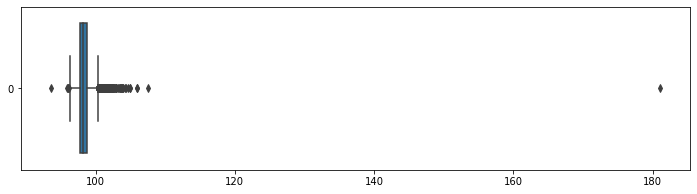


7 Height_Min


PatientGuid  IQR Method
0  8A1A1BFD-B70C-460F-ABE8-2A99FAF8F5DC        77.0
1  9B5B930B-ADDD-428E-8501-EA627CEF2097        77.0

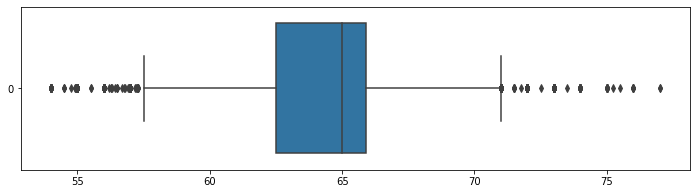


8 Weight_Min


PatientGuid  IQR Method
0     00023761-9D8D-445B-874C-2424CC7CF620       182.0
1     003CEE1F-5BF5-4171-9284-F5464EC12D41       105.0
2     004382BD-E31F-4091-8DE5-E86A59D70C2D       230.0
3     006948F2-1118-4F56-A561-6A254EE357C6       164.0
4     006E3A23-F786-4ED2-BE70-D91D23BA56EA       221.0
...                                    ...         ...
2339  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4       228.0
2340  FFB0830F-B789-4B37-A43C-6E2A02368F5E       155.0
2341  FFC8E19F-A199-46A3-895A-E3C07FBAC809       206.0
2342  FFEF293B-6147-47F0-8F0B-76180C124205       191.8
2343  FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6       212.0

[2344 rows x 2 columns]

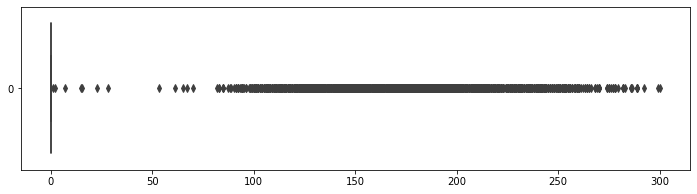


9 BMI_Min


PatientGuid  IQR Method
0     00023761-9D8D-445B-874C-2424CC7CF620      27.670
1     004382BD-E31F-4091-8DE5-E86A59D70C2D      40.738
2     006948F2-1118-4F56-A561-6A254EE357C6      26.230
3     007CB9B1-F4DE-44FA-9CEC-916C1235988C      25.766
4     0094395F-F853-4689-85D3-4AE5C2EA3EC0      18.654
...                                    ...         ...
1587  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2      36.154
1588  FF8011CC-ABB1-4E70-8F25-FEB75F33396F      23.203
1589  FF9BA1EB-03AB-47FE-B110-B559D8E0835B      20.551
1590  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4      34.663
1591  FFEF293B-6147-47F0-8F0B-76180C124205      37.454

[1592 rows x 2 columns]

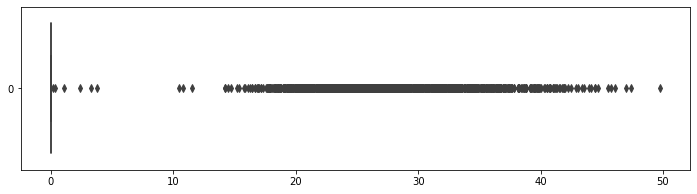


10 SystolicBP_Min


PatientGuid  IQR Method
0   00AB891C-67A0-4528-9EC2-50DD7AB368AB        10.0
1   03F6F07A-61EF-434C-9036-8338C6963735        11.0
2   047FD84D-8B1C-4DD3-AEFE-CCAD275CCF91        12.0
3   0592D97A-1B6D-429D-84FE-723B0527D4CE        11.0
4   20D51030-10EF-4DA0-B872-2125A9565EE6       192.0
5   3C322598-5E8F-4BF2-8EF1-8843FC9B1851        10.0
6   4449F75C-23CA-45C3-88D4-981E61883481        11.0
7   498421C5-3895-47FC-9312-0EF9B85ED820        30.0
8   9F138440-07E6-47C3-BCEA-D6DDC87C87D0        14.0
9   C277AE2F-7247-4C74-9B0E-3FE843097C87        17.0
10  C5D41CE5-13F8-4D9A-85EB-8D7381BE644B        10.0
11  E109BFE0-E824-4E7A-A5C4-34EBF6F2D6E0        34.0

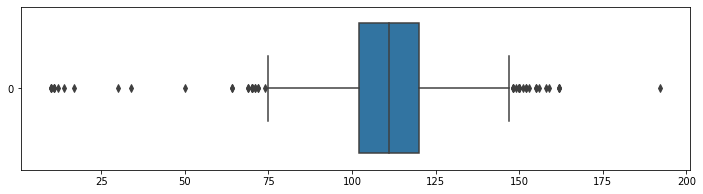


11 DiastolicBP_Min


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

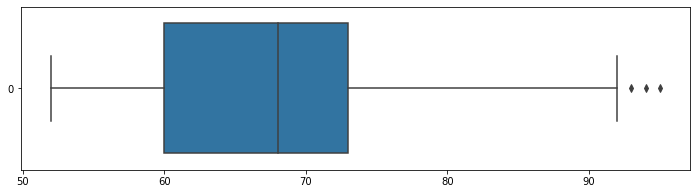


12 RespiratoryRate_Min


PatientGuid  IQR Method
0   15A8FF8C-B96A-4687-923C-6C9D87967CD3         1.0
1   1829802B-B60A-45CA-BAC6-AAF3CA751A78         1.0
2   1C029B51-D235-456A-B430-8B41743C4091         1.0
3   2AAC00B1-4A08-47D3-9876-12554055E77A         1.0
4   33D5D160-645F-4687-9EA5-1F3301451F66         1.0
5   3FA5D68A-405B-48D1-B0DA-9D8916C54F22         4.0
6   4643F5D1-78E9-4333-9B89-342A471F3C05         1.0
7   61F6FDD0-1FF1-4180-90C9-A989D756C40F         1.0
8   6C87A189-5CFC-4FDF-9EDC-66A5230EF5D5         1.0
9   8847847B-295F-4FE1-BCA6-D81D364148DA         1.0
10  9660534A-6D07-418B-873E-3D69C9A3D064         1.0
11  9BE6A90D-9CAA-423F-A487-670865375484         1.0
12  A3A69085-0689-4DB5-917A-52C6A838D349         1.0
13  B08D782F-B803-47FB-AA97-1BB5B04DF0DF         1.0
14  B3A2BB4D-1C32-4D01-8765-F3DD2098B008         1.0
15  B8866A2A-6C38-4957-97FB-F5612C76052D         1.0
16  D6DC685F-2CB1-4D7F-8781-76ED480D7EFC         2.0
17  DFD50F7E-2F89-4BDE-B567-CD3B306DE31F         5.0
18  ECB471F6-0282-48AA-B7A0-743177A88266         3.0
19  F7D81464-588E-4B12-9F54-90E6155C19D9         1.0

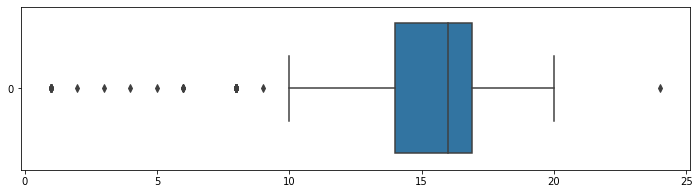


13 Temperature_Min


PatientGuid  IQR Method
0    0094395F-F853-4689-85D3-4AE5C2EA3EC0        93.9
1    02D318BB-B886-4D6F-BF98-8AF41F4023A8        93.1
2    035BB97A-58CF-43E9-BA0D-BD7CC4D47CBC        87.7
3    03C5142D-319A-4D46-B726-81196F08927E        93.7
4    04308486-471F-4A73-B8A4-0AC389844178        79.0
..                                    ...         ...
393  FEBFEB1E-EF34-47C8-9CAC-28A12DF5EE42        92.3
394  FED06E2E-7123-4030-BB61-8B2FBAF149CF        77.0
395  FEF753C0-9808-49F1-8E31-9FDA502B360A        93.2
396  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2        92.5
397  FF69D56A-B1C5-4F04-B458-5F58BB9E70E6        76.0

[398 rows x 2 columns]

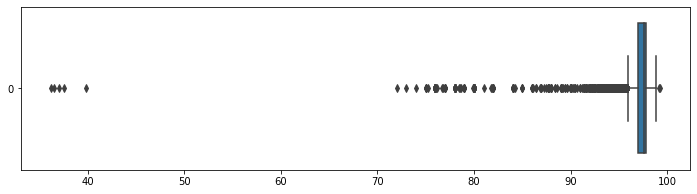


14 Height_Std


PatientGuid  IQR Method
0  2371B822-C007-4EC7-86F3-F03625034F3A    6.868578
1  563B4D81-611E-411B-9A6A-ECB5DC91F270    6.987828
2  A6082359-266E-45F3-BB81-F193D195FC73    6.987828
3  EB494A20-8414-47D3-BE0B-6F00FA0FCB9E    8.485438

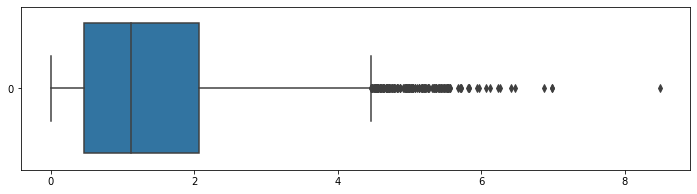


15 Weight_Std


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

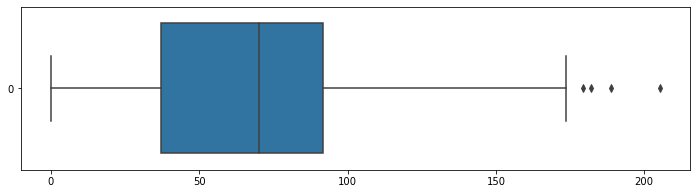


16 BMI_Std


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

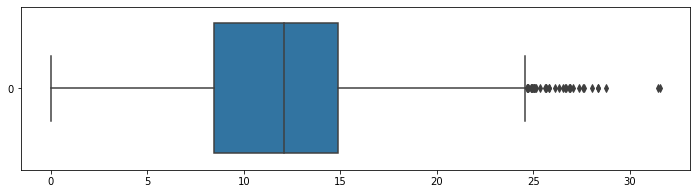


17 SystolicBP_Std


PatientGuid  IQR Method
0   007CB9B1-F4DE-44FA-9CEC-916C1235988C   36.460024
1   00AB891C-67A0-4528-9EC2-50DD7AB368AB   47.623524
2   0D098927-DB14-4D3E-9174-6961F9AEAB5A   43.003876
3   10D2EDD4-DFB2-44F6-B73F-0351739F4A03   37.873825
4   14F4B8EE-90A2-48E2-B201-45CA2A70E936   31.796226
5   15D170D8-C4AF-4273-B61A-D1997F22676E   32.405263
6   1D21222A-4A26-4614-BCD0-D32F3E7139CD   33.306766
7   29C81907-728D-4405-8A1F-C6D9871E27A6   34.792707
8   34A3E425-EE98-4E80-AF06-8BBDB1F1E6E3   32.557641
9   3A822D7B-A7C2-4EC1-92B8-CD1A35C031BE   37.427206
10  3C322598-5E8F-4BF2-8EF1-8843FC9B1851   44.384682
11  3EF56EE9-1DD6-4190-8C21-23E28E0F9596   60.961737
12  42EAB721-3B2E-4E91-97D7-537D1283D2F2   32.010415
13  46B8AB7D-052E-4C69-B950-3B74156878BF   40.311289
14  4B49EA55-531C-4E9C-9046-BBD19C7D42D6   31.753908
15  52B09A3F-6D25-4425-8271-2D083A074934   31.531495
16  54320C1C-89A0-46F5-91DA-3AC4C58F6331   42.407900
17  552DDF29-3251-43C7-BBF6-131365E96428   32.305367
18  5C50903B-2388-4152-96F5-92A9C2F74328   33.079450
19  71CA4B6F-BAAC-4264-9A45-423C5041866D   32.993990
20  74D63498-8697-48FB-A853-DEF38B1D736A   33.196385
21  760436A9-E94B-4FA0-803C-F360EAF82F47   41.902321
22  77AC7DB2-B798-488A-AE06-B2E3D8CA0A3D   53.678053
23  8DB692FC-4383-41B1-A950-03E2E954CFD5   33.058333
24  9716AECC-8887-4DE4-950D-983CA742460E   30.847425
25  9B688E9F-D6E6-40BD-A7B4-921825662912   31.088408
26  9DF22440-9F32-4EA1-8E58-2276FCF35916   36.529804
27  A08C57E2-753C-4A06-8CB0-53FB309E656C   31.637709
28  A4086AB7-8647-4ACF-8D31-CF5630DB6B5E   30.786713
29  A56FC239-676F-4AE1-BDE4-7DB4BD4D34A3   32.633355
30  ADE4C15D-FECA-475A-AF04-4B79EF40086F   36.518655
31  B94071BE-D223-467D-A35C-36B39D87867F   43.038742
32  BCE3BB64-D61B-4F98-9A53-40EA70983988   42.603132
33  C56D0649-A5E6-4BB2-AFF6-E680F1ED6B2F   55.428633
34  C6838560-5785-492A-9485-04D9ED62B421   30.498283
35  C8F6D28D-E49D-4DF5-A521-0FA818B284C3   41.617304
36  D1B7C483-5725-44A6-95A4-4DC290F1B53E   38.730215
37  D64A394B-23D3-49F8-BD39-9DD5F1720D85   37.463703
38  D6F55600-FD8A-4438-AC04-205D4CF0618A   30.565608
39  E03F262B-4CD2-43C2-B63A-370A127755A0   31.765810
40  E14F7E59-D508-47C7-9F25-A915690AF939   33.468254
41  E1D71461-4283-4B69-ADE6-71CB047AC17A   42.458027
42  E23776EC-27FF-4CBA-BB44-30E7ED7A822E   30.906310
43  E6D393FA-1041-4EA0-98E6-ACF29EFEB634   38.114497
44  E94B77A2-FF2A-47BC-ACA3-1B8DA930F6FE   39.283276
45  E9973CB7-8EDE-49B0-ABE5-25911EF5C619   32.883633
46  EC9C9906-C3C1-4A36-A818-1F4B903F1A68   31.891507
47  F19DE34B-1BEA-4B18-8E1C-180827E691EB   30.619341
48  F53B4C04-030D-4297-99F4-FC92F02919B1   30.730279
49  F676533A-B5A5-4B43-8EE6-3535F4F61C29   33.115705
50  FC7F181D-3B74-421E-9CD2-3AAD7E242B08   32.600579
51  FF618A7A-92FE-4651-8646-D43E81E7A949   33.735410

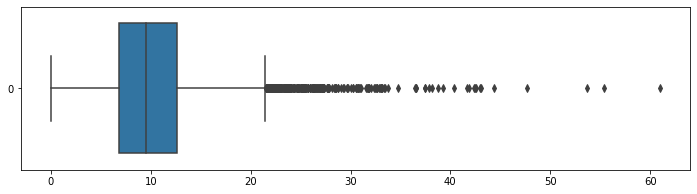


18 DiastolicBP_Std


PatientGuid  IQR Method
0  438AFC4F-4A96-4542-931C-E1F3EAD22C7F   20.297783
1  548A8409-202A-4C99-958D-BEBAEED316B1   18.583146
2  64067629-9644-4BEE-B42D-01E6B5DA6C36   18.903263
3  7A6371F2-807F-42D2-87DC-A9F04B7FD05D   18.645822
4  8725703B-F691-4A15-8F5A-2B7E584CE3B7   18.406521

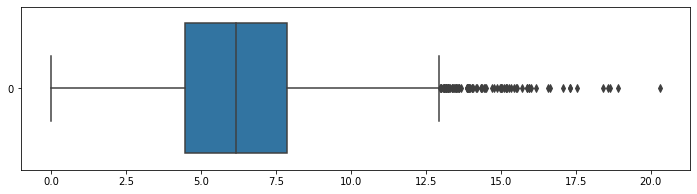


19 RespiratoryRate_Std


PatientGuid  IQR Method
0   02D318BB-B886-4D6F-BF98-8AF41F4023A8    7.791408
1   03C5142D-319A-4D46-B726-81196F08927E    8.815777
2   096A281C-7C60-4F6D-B0E5-195192752C54   13.326319
3   0CE143F6-78DE-4509-A101-6F774A4F5B6A   12.522404
4   0D8F4040-8FDD-48DB-A9AE-2D58ED649CFD    9.153303
5   1825C7BB-F958-4A35-B2B5-04300DC63C08    6.579855
6   1829802B-B60A-45CA-BAC6-AAF3CA751A78    7.500000
7   1B2F8598-B43E-4E05-9D7C-2283D06FB291   16.372719
8   1C029B51-D235-456A-B430-8B41743C4091   12.048007
9   1EA808B2-72A4-4C6E-A716-300B9C838915   10.024013
10  285C1EEA-A5F0-47EB-A9C4-5F04B5316A0C   10.557199
11  28728349-9F3A-4123-B46D-26B74B2C90F9    9.240741
12  2B56BD57-16E7-4338-8B46-DFE48D81A9FE    7.825081
13  2E1F9C9E-5B1B-4B84-9D9C-A0E17D067C8B    9.781424
14  2ECA343C-C7AC-4603-927A-6145C8029282    7.500131
15  2FEE2043-8E9F-400F-83A9-3D41785D6FA7    9.429487
16  33D5D160-645F-4687-9EA5-1F3301451F66    6.861051
17  4013D217-DFC8-490F-8057-3F0F72A6ED58   13.102897
18  47D9007D-2924-4A36-B8E0-F167B1EF9FE2   16.079349
19  4917B2B1-26BD-4380-A3AA-4EC3FE701C9E    6.637007
20  498421C5-3895-47FC-9312-0EF9B85ED820    7.425762
21  4FE539E7-B296-4A04-BB0B-CB7CDF33DA7A   10.334409
22  5178EB05-A86C-4D70-9057-91B005367722    7.924783
23  530720D7-65C6-4E24-89A9-DAE0E5259154    6.611400
24  55E40FED-B50C-4151-B0BC-EB4C0B074304    7.441699
25  56E010D8-519B-41D5-AC73-FEEA5638AECE   11.269648
26  59C20DDC-1020-4F4E-823D-997D3E4B46BD   10.007002
27  5BEA3241-A97D-4875-B105-8E5CBB2EDC2E    9.700420
28  666EE880-B534-4D30-8FDE-455A22B3EA88   14.320947
29  6A859054-D31A-42B4-8571-FD4EEBFC01A4   11.465643
30  796F8775-00C1-49E4-97C3-1CF192C822CB   13.880442
31  8209DAD2-7904-49F4-A36E-A707290428AA    7.947112
32  86ACBD72-1295-49B2-9A8B-5569D6BA53B9    7.196237
33  890C4C84-3D42-4F6F-BCE0-FBDCCD62A91A   15.542487
34  89206387-88F1-4FC9-9E7D-36BB69B033F8   13.164687
35  91E7555C-F7F6-49D7-AE12-54DA2243D196   17.192975
36  932AC943-6A4C-46FB-9453-2A3516252B03   25.742146
37  98CE4381-E463-4FE4-AFE8-3A0DB09D7F94    6.633250
38  9A5006E1-7CC6-42C0-9DB4-846402D76E3D    7.776377
39  9FAFAB5D-EF8D-4850-85D6-83E739EBACBA   29.444864
40  A31A150A-95E5-42BD-8153-757338C19225    7.611323
41  AD33A68A-41DC-4535-B42A-6666829E855B    9.531994
42  B45F41DB-E2A0-4167-8BDB-C5EF7509AB5D    7.554613
43  B80F8941-B6D2-49F8-9E94-1EE612EE2ED0   19.221572
44  C3C25819-BDFC-4B54-923C-3143A1A9AC27   11.594890
45  CD84E45F-F40A-4095-9439-395E0A5C0491   12.918399
46  FA3C6FDE-35A0-46DC-B284-9EA293C20D3C   19.715400
47  FC928FD9-8124-4095-B2C6-ECB7A4CC4862    8.065744

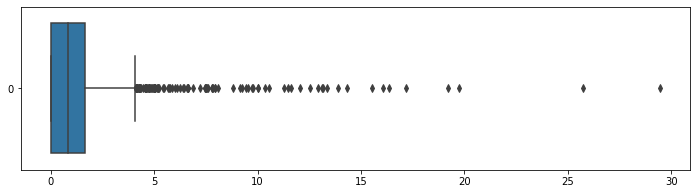


20 Temperature_Std


PatientGuid  IQR Method
0    006948F2-1118-4F56-A561-6A254EE357C6    2.308246
1    035BB97A-58CF-43E9-BA0D-BD7CC4D47CBC    3.098416
2    04308486-471F-4A73-B8A4-0AC389844178    4.989922
3    04621D5A-F0BC-49A3-83F1-9094EC0B0CB5    3.452566
4    05625020-4F92-49E3-8012-496E56CD03C5    2.605970
..                                    ...         ...
167  FB63CCCC-14C2-44A8-8B6E-DDA49E9C8376    2.819008
168  FDF79426-A2F5-43B0-81EF-0C7594DBEDEC    3.704830
169  FED06E2E-7123-4030-BB61-8B2FBAF149CF    8.475486
170  FEF753C0-9808-49F1-8E31-9FDA502B360A    2.202635
171  FF69D56A-B1C5-4F04-B458-5F58BB9E70E6    4.460967

[172 rows x 2 columns]

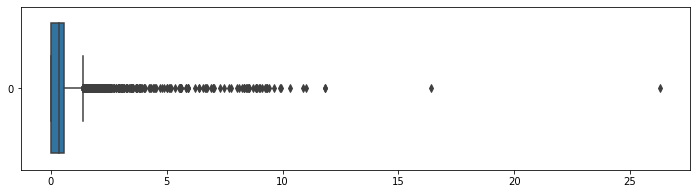


21 Height_Mean


PatientGuid  IQR Method
0   0149B9E1-5393-4CF3-94C7-E65D9976A713   75.000000
1   01CDC046-1F79-4667-B6FC-FDC4C928B709   76.000000
2   04387B84-9D12-4DFB-9050-8EC66F32E0CE   74.316121
3   0B9AA2E6-433B-4662-9A99-036B6D0E6411   76.000000
4   0E62C59D-CB51-4113-B40B-8499ECE0B74B   57.375000
5   131F5FFD-6E7D-47BD-A9E0-5E0D3062D4D6   56.222825
6   19500D12-8A8C-4547-8027-58AC391C9369   74.604205
7   2BB9CF9F-E682-454C-967D-0B3A7B037C56   74.865939
8   2BF9EAC9-89A0-4DE4-A0EF-8264A6F01048   74.464513
9   34BE1AB7-01D7-440D-81AB-8BE5EB2F48A4   54.000000
10  37A1469C-5A6B-4082-90B4-7184DAB311B4   56.750000
11  4F3E5352-7FC8-4B55-8BB2-282BDBCFD9BE   75.500000
12  60279539-9521-46B9-8DF4-81FBDA08ECF2   56.500000
13  66C54A31-03DF-4A88-8816-1DFD744144D1   75.000000
14  7C4A5E80-1A18-4AF6-B40C-903B18A439D2   75.000000
15  85B70A5B-D4FB-4E7A-BDA2-436B35D36B83   75.437500
16  86823458-241D-4C63-B540-E73A27CC56C2   75.000000
17  8A1A1BFD-B70C-460F-ABE8-2A99FAF8F5DC   77.062500
18  8B6688AB-E183-4C32-8FE6-29B9D8865687   57.179345
19  90BE2876-17D7-41A0-A407-19C954DA138F   75.500000
20  95A464CF-52E9-4212-84CF-356B6166F3A1   76.000000
21  96A6E3BA-BE7C-4A8F-8F29-CE77A6385FEA   75.935102
22  9851D320-CF9C-41B5-BB86-F1C05FD2F05D   57.053667
23  986C4DCC-8CDC-4109-A546-EB05B826AC4E   75.000000
24  98AACBC5-E5A3-4F4B-86E7-D651CDDF011B   75.000000
25  9B5B930B-ADDD-428E-8501-EA627CEF2097   77.000000
26  9C3CA08C-DADC-444E-87CD-555F3F1E1996   56.000000
27  9D31E8F1-A63D-42D5-8FD8-E5D5B5C4872D   76.000000
28  9F6E56A9-271B-4C62-A15C-D7F2A7B08D48   74.715523
29  A0A6BB1B-0C9B-404C-813C-2591603D2426   75.000000
30  A85B64C5-9454-4063-8403-C07C710D0A2D   56.000000
31  B3E488E0-DB0D-46B1-91B9-8AD12F235B81   75.149454
32  B615EC4F-FDAE-4268-9BCC-0FC43228F2DA   76.000000
33  C4F55D94-8A1C-4426-AF1E-712946149679   74.714286
34  C85A8A29-9C32-4B1A-B97A-40DFA987EB09   75.750000
35  CC2BB1D3-1532-4F7C-9DD1-85BB684E4572   75.416667
36  D010AB5E-FF65-4EC8-8349-6CF5E496513F   75.666667
37  D88797E7-3C6F-4C6F-BE17-2364F944DE1C   75.000000
38  E4B3193E-02BC-45A5-A1E3-353DD2AAA9AC   75.000000
39  E6B1BF77-AC51-4F08-883F-D6CF5359D43C   76.437500
40  E745EC2A-2F04-41F7-A446-287CFE2B92BE   74.583333
41  E843942B-5EED-44F8-8198-D5D3DA1EF8A3   55.264706
42  F6F90681-FDFA-47B5-BA46-189F1D29AD14   55.500000

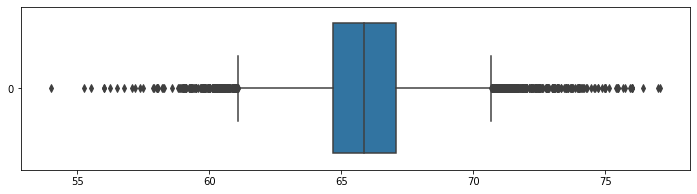


22 Weight_Mean


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

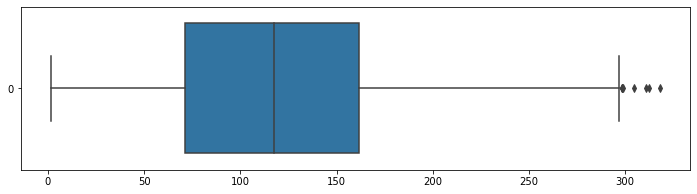


23 BMI_Mean


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

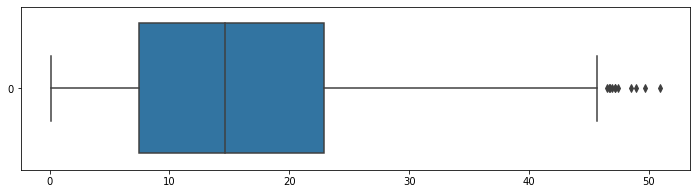


24 SystolicBP_Mean


PatientGuid  IQR Method
0   00AB891C-67A0-4528-9EC2-50DD7AB368AB   81.000000
1   00D69218-4084-47AB-A605-2CD75F5A89EE  175.500000
2   06AAB37C-22D5-4B35-B54C-1618C6E5AE24  167.636503
3   078EFB82-9958-4CEC-9E9D-216C742FF7BE  184.747614
4   09BAFC37-8001-401D-A6A1-455284A7BC02  166.182131
5   0D677D11-005B-4E39-BBA9-674371F32771  172.083333
6   10D2EDD4-DFB2-44F6-B73F-0351739F4A03  168.909508
7   20D51030-10EF-4DA0-B872-2125A9565EE6  198.000000
8   2A56A9DE-2AA9-44DC-B7DC-67950A03CE34   83.000000
9   3908BFDF-E1EC-4F2A-82EF-C5C262F39ADE  167.000000
10  3A556946-ABBA-4927-A834-7FEAFE69118B  176.187386
11  3A822D7B-A7C2-4EC1-92B8-CD1A35C031BE  177.195705
12  3D61E389-64CE-48DC-BEC0-5EE371006563  172.000000
13  46B8AB7D-052E-4C69-B950-3B74156878BF  177.500000
14  54320C1C-89A0-46F5-91DA-3AC4C58F6331  171.491409
15  552DDF29-3251-43C7-BBF6-131365E96428  166.859731
16  62D80C50-CAD3-4F68-AE18-71FFA8E0084C  172.389789
17  685FCC18-20D8-49BA-A63D-414574C7867E  168.857143
18  760436A9-E94B-4FA0-803C-F360EAF82F47  182.715235
19  7D8D67D6-59C8-446C-9A1E-50BCC5E53E2F  177.363733
20  7FA40718-DE15-4EAC-ABF0-3812D36DC418  180.500000
21  8BEB5D10-99A9-4FFF-B6EE-064C96EC2921  169.454754
22  94B82185-A299-4765-A3B2-962802624AC1  170.400000
23  9716AECC-8887-4DE4-950D-983CA742460E  169.181818
24  A08C57E2-753C-4A06-8CB0-53FB309E656C  183.429866
25  AD88069E-429A-4455-ABEC-AE967625F65C  166.857143
26  BCE3BB64-D61B-4F98-9A53-40EA70983988  173.576174
27  C13C7261-7096-48E4-B291-4460200A6375  172.500000
28  C71E74E6-9118-4463-9F8B-9952DDA6FE02  169.500000
29  D0084121-E4AA-4263-A652-87DAD85D4B1E  170.333333
30  D14D8109-F99D-4679-9193-F4A0CC6179D7  166.556297
31  D1B7C483-5725-44A6-95A4-4DC290F1B53E  177.182131
32  D6F55600-FD8A-4438-AC04-205D4CF0618A  187.384615
33  E03F262B-4CD2-43C2-B63A-370A127755A0  166.666667
34  E94B77A2-FF2A-47BC-ACA3-1B8DA930F6FE  166.675503
35  F2C07C49-7A9B-428C-BB1F-B41EC74C1A5A  185.285714

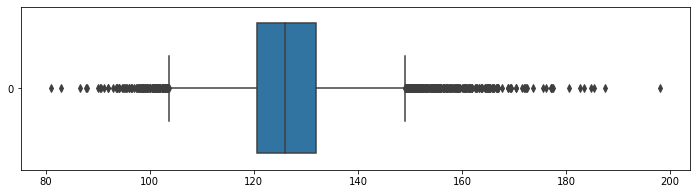


25 DiastolicBP_Mean


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

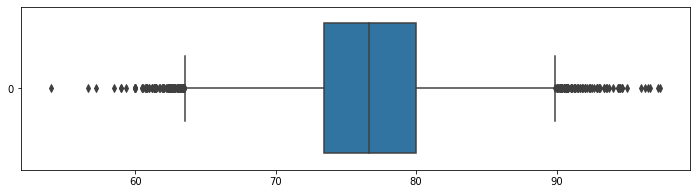


26 RespiratoryRate_Mean


PatientGuid  IQR Method
0    003CEE1F-5BF5-4171-9284-F5464EC12D41   11.500000
1    007CB9B1-F4DE-44FA-9CEC-916C1235988C   21.333333
2    0119DD3F-0AE4-468A-88FE-D381ABCE75B9   12.409585
3    01A85D79-561C-4EDB-81FF-DCDE0CB35AE9   19.409585
4    02B33243-B52E-4579-9338-D7795C9A8711   20.000000
..                                    ...         ...
384  FBF3DE89-BC83-4407-9DBE-7B29C13A0ACB   19.478756
385  FC664FB6-4D5D-45BC-B15F-F1552E6C1E15   19.820725
386  FC81666F-A9CD-4496-9090-DD4C72125673   20.000000
387  FD553669-5855-446B-98A4-F6AB9E8EF4B5   13.188165
388  FE77FBC0-65C0-433A-A21E-7E3101590651   20.000000

[389 rows x 2 columns]

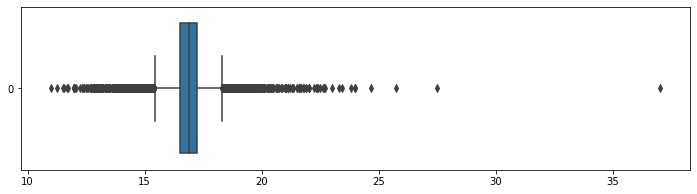


27 Temperature_Mean


PatientGuid  IQR Method
0    006948F2-1118-4F56-A561-6A254EE357C6   98.560000
1    0094395F-F853-4689-85D3-4AE5C2EA3EC0   96.620969
2    00B80F57-1B0B-4409-BF26-549A29A6B5C0   98.775000
3    0149B9E1-5393-4CF3-94C7-E65D9976A713   96.550000
4    01A85D79-561C-4EDB-81FF-DCDE0CB35AE9   98.700000
..                                    ...         ...
892  FF69D56A-B1C5-4F04-B458-5F58BB9E70E6   96.921109
893  FF8011CC-ABB1-4E70-8F25-FEB75F33396F   98.500000
894  FF9B4F39-5A81-4150-9E2C-550BDE418FFB   98.666333
895  FFB0830F-B789-4B37-A43C-6E2A02368F5E   98.782665
896  FFEF293B-6147-47F0-8F0B-76180C124205   96.750000

[897 rows x 2 columns]

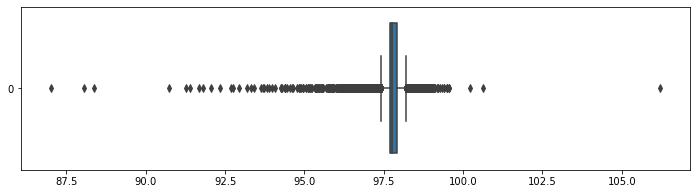


28 BMI_Change


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

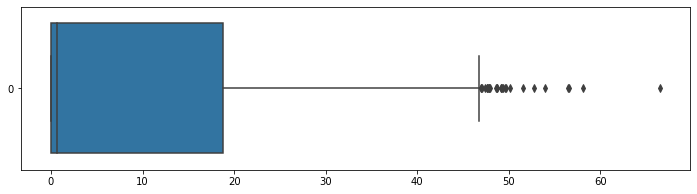


29 DiastolicBP_Change


PatientGuid  IQR Method
0  103E8040-4EC0-4E9B-BEFC-588C9C64AD8F        33.0
1  25253032-39C1-4EAC-BE54-A154A68F6766        33.0
2  6402E51B-FFB7-4377-B178-3AFB5B4CB356        38.0
3  64067629-9644-4BEE-B42D-01E6B5DA6C36        36.0
4  8725703B-F691-4A15-8F5A-2B7E584CE3B7        40.0
5  93D1E8C3-FA99-4717-ADAA-C1003BD24479        33.0
6  96E3A3BC-9378-4A58-A115-AD5246510232        40.0
7  CB14C861-40EF-4B10-99E1-F9AE4B874D94        36.0
8  F410AFCA-8E3C-4BB1-924C-F264C2469C43        38.0
9  F88A2D66-01C2-4D49-98AD-851B63DC385A        39.0

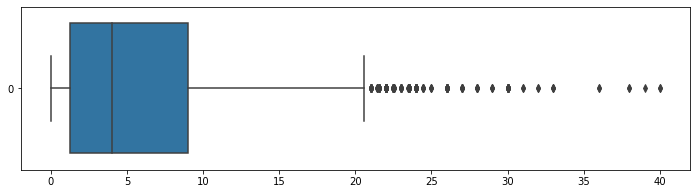


30 Height_Change


PatientGuid  IQR Method
0    01058702-90B3-4AEA-B2DB-80936FD66216    6.103274
1    0254DF22-EA5C-49CD-B425-A08514C75149    7.103274
2    02631AC9-6413-44F0-8393-53B2C4092103    6.103274
3    035B92F2-92DC-4F6E-90BF-80479138DB90    5.896726
4    03D3152A-9569-4547-B45F-9F5B7BC46E6A    5.896726
..                                    ...         ...
505  FDD1E15E-F500-4898-BAC5-7486F9FC9917    6.103274
506  FEFE858D-0204-4B1C-A862-9B3DA9063E22    6.103274
507  FFA25126-98E0-46E2-9B80-FBEEEA1C7D71    7.896726
508  FFB51256-FBE9-4825-9172-09789E757770    7.103274
509  FFC9E47E-6971-4210-8370-3FB01BB1B47F    5.896726

[510 rows x 2 columns]

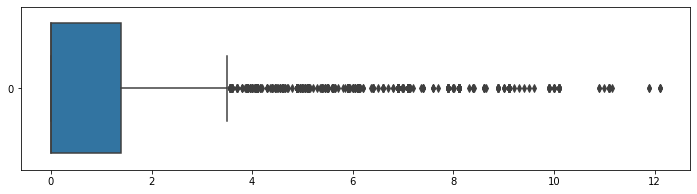


31 RespiratoryRate_Change


PatientGuid  IQR Method
0    0101A85A-9D25-48D7-A11C-498AC5E4CE03    4.915026
1    01269935-4EE6-4DB6-923B-4A086BD62833    5.084974
2    01B5181A-E12B-4960-8761-51D655B5D060    7.084974
3    02D318BB-B886-4D6F-BF98-8AF41F4023A8   19.084974
4    02DC281D-D37A-429C-A6BD-1D26348704DA    4.915026
..                                    ...         ...
361  FA3F4BFD-54C3-4305-B4AD-C3E6BD1F5FBC    4.915026
362  FB896760-A419-4298-A37D-5C6913672719    4.915026
363  FBEC9262-943F-45F8-B691-B0E904182723    4.915026
364  FBF3DE89-BC83-4407-9DBE-7B29C13A0ACB   16.000000
365  FF574B32-F375-411E-B7C4-99C6034A187A    4.915026

[366 rows x 2 columns]

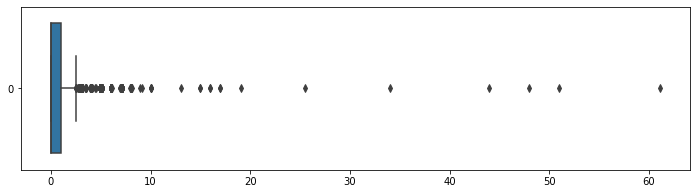


32 SystolicBP_Change


PatientGuid  IQR Method
0   031BF1C4-96FE-4775-8D36-717AB81CA3FC   56.000000
1   03F6F07A-61EF-434C-9036-8338C6963735   57.864262
2   047FD84D-8B1C-4DD3-AEFE-CCAD275CCF91   53.271477
3   078EFB82-9958-4CEC-9E9D-216C742FF7BE   81.271477
4   0D098927-DB14-4D3E-9174-6961F9AEAB5A   84.000000
..                                   ...         ...
58  E03F262B-4CD2-43C2-B63A-370A127755A0   56.000000
59  E2BC6FA8-461E-4BC5-8B2E-DEFA58C737E7   58.271477
60  EC9C9906-C3C1-4A36-A818-1F4B903F1A68   52.271477
61  F53B4C04-030D-4297-99F4-FC92F02919B1   64.000000
62  F86D1ED0-AE76-4486-BDF4-6A0A0E15A87D   54.000000

[63 rows x 2 columns]

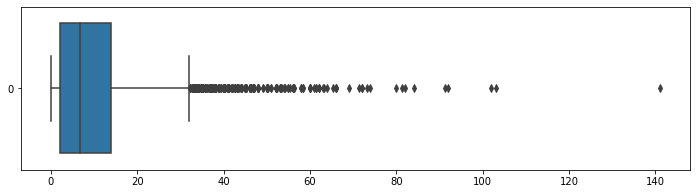


33 Temperature_Change


PatientGuid  IQR Method
0    006948F2-1118-4F56-A561-6A254EE357C6    5.600000
1    02D318BB-B886-4D6F-BF98-8AF41F4023A8    4.665331
2    07936C2D-4DB9-46D3-A928-0AB9D38FA0E6    2.700000
3    0885F47B-219A-4E00-9F46-9703F7BA9293    2.100000
4    0A169B9B-709A-4499-8310-5248CFE92475    2.765331
..                                    ...         ...
187  FB076249-7115-476B-8E69-8834C059DD51    5.300000
188  FDCF552C-D0A5-4EA9-9E2E-48D253C8D353    2.734669
189  FE18FB04-F8D3-4285-9A0F-F47554C6ADAF    3.734669
190  FEF753C0-9808-49F1-8E31-9FDA502B360A    3.400000
191  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2    4.400000

[192 rows x 2 columns]

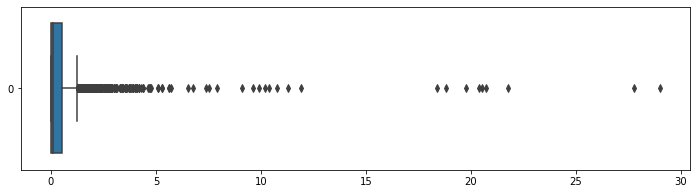


34 Weight_Change


PatientGuid  IQR Method
0  3FA7FB3D-1998-434B-876F-A68DB154BC8D     451.948
1  C85A8A29-9C32-4B1A-B97A-40DFA987EB09     445.000

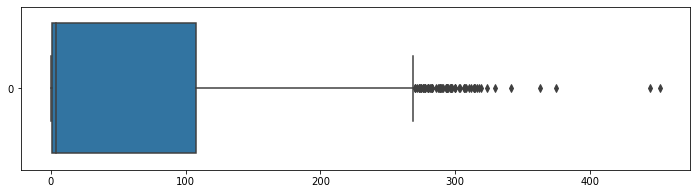


35 Age


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

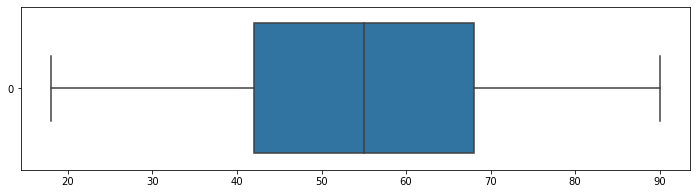


36 Icd9_001-139


PatientGuid  IQR Method
0     0029BBC8-7C22-4444-9F44-87BEF05FE033         2.0
1     00607D4B-5F8F-4026-AF20-85A961B4B904         1.0
2     006948F2-1118-4F56-A561-6A254EE357C6         2.0
3     006A9198-1BB4-42B9-A864-210BF14AD445         1.0
4     006E3A23-F786-4ED2-BE70-D91D23BA56EA         2.0
...                                    ...         ...
2049  FF64E901-267B-4095-B9D7-880BEA72B44B         1.0
2050  FF8011CC-ABB1-4E70-8F25-FEB75F33396F         1.0
2051  FFA25126-98E0-46E2-9B80-FBEEEA1C7D71         2.0
2052  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4         1.0
2053  FFEF293B-6147-47F0-8F0B-76180C124205         1.0

[2054 rows x 2 columns]

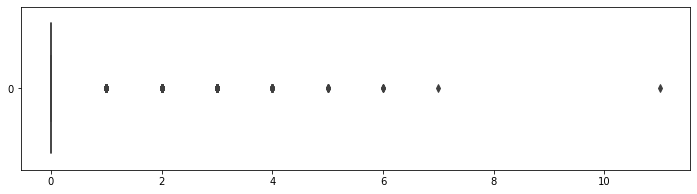


37 Icd9_140-239


PatientGuid  IQR Method
0    009FFF75-B641-4EFD-87EB-53BAC29906F5         1.0
1    00B7C61A-82E5-42E1-B9C0-6B39C5BC552F         1.0
2    00F6133C-EE95-4036-A960-E6AAE330624B         1.0
3    00FA044F-4B86-4966-8BB3-253BB60E6E58         1.0
4    0132BC96-2D06-4B01-ACAF-51027BDFCFC8         1.0
..                                    ...         ...
772  FE1F52BF-3E1E-4910-9848-A45DF554FDEB         1.0
773  FF0745C3-4271-4F69-9FD4-426FC8704368         2.0
774  FF467B55-9E50-4073-AB7F-B9919DAA3CB7         1.0
775  FF99C22E-E5B5-442A-B0B0-73747BD2F04E         1.0
776  FF9B4F39-5A81-4150-9E2C-550BDE418FFB         1.0

[777 rows x 2 columns]

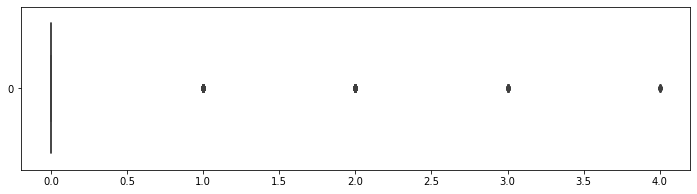


38 Icd9_240-279


PatientGuid  IQR Method
0  1FC93340-0770-4C5D-ABB0-71E52BB7F75B        10.0
1  2AD60EF1-2091-435D-926E-69DAA5C01030         9.0
2  2FAE265A-C425-41F0-96CE-3A0CCB26655F         9.0
3  52965E52-26E6-4F8C-913F-0D7382AF2581         9.0
4  7915771D-6FD5-4E58-9A66-C2B71488DFB9         9.0
5  D08E31D0-86AE-49C7-ABB4-62DDE83EFBFF        10.0
6  DD6160EB-75E7-4740-ADCE-B8BD187DDE22         9.0

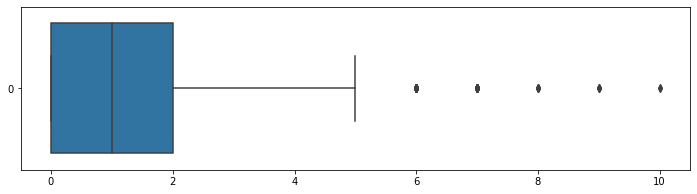


39 Icd9_280-289


PatientGuid  IQR Method
0    006E3A23-F786-4ED2-BE70-D91D23BA56EA         1.0
1    0094395F-F853-4689-85D3-4AE5C2EA3EC0         1.0
2    00B1FB6D-84EA-4ED9-A0CC-5A14FC2989D2         1.0
3    01058702-90B3-4AEA-B2DB-80936FD66216         1.0
4    0132BC96-2D06-4B01-ACAF-51027BDFCFC8         1.0
..                                    ...         ...
904  FE888BA9-3897-4E03-BF31-B9338AD8B605         1.0
905  FF391C47-2E9A-4F83-858D-A0EA50B19674         2.0
906  FF618A7A-92FE-4651-8646-D43E81E7A949         1.0
907  FF827F18-B26E-4B6A-B03D-1BE5F6768B88         1.0
908  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4         1.0

[909 rows x 2 columns]

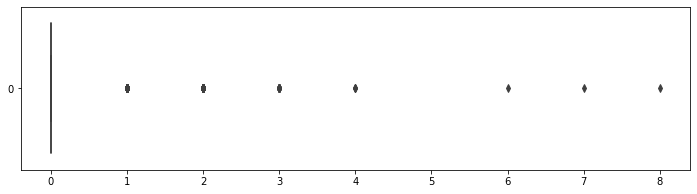


40 Icd9_290-319


PatientGuid  IQR Method
0    034555D8-4351-4675-BCB5-2B09748B9AC5        11.0
1    045CDC05-0036-4677-A979-CA6D18DEF60B         5.0
2    0589289A-6C1E-4F8B-A56E-A4B938580401         6.0
3    06E00F6F-FC5C-4AFC-B1F1-8F99A5CE82EC         8.0
4    086407C2-AB35-48E4-B16A-B3DF78AE5585         6.0
..                                    ...         ...
104  F86D1ED0-AE76-4486-BDF4-6A0A0E15A87D         5.0
105  F96F3DB5-EAC8-4238-85C6-01094598D1F5         6.0
106  FAC8D999-3F05-4A91-BD2D-019A3C3DA248         6.0
107  FD79D5D0-A09F-40B6-956A-528BA367866E         5.0
108  FF618A7A-92FE-4651-8646-D43E81E7A949         5.0

[109 rows x 2 columns]

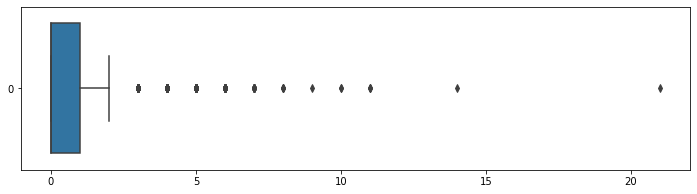


41 Icd9_320-359


PatientGuid  IQR Method
0     0029BBC8-7C22-4444-9F44-87BEF05FE033         2.0
1     004382BD-E31F-4091-8DE5-E86A59D70C2D         1.0
2     0066553F-732C-4654-99AA-68B26819DFD8         1.0
3     006F8D62-651E-4ADD-B630-8F7DB667C148         1.0
4     008A55FD-0735-47EC-A2FA-20043D1423C2         1.0
...                                    ...         ...
2038  FF99C22E-E5B5-442A-B0B0-73747BD2F04E         1.0
2039  FF9B4F39-5A81-4150-9E2C-550BDE418FFB         1.0
2040  FFB6EAD7-1BFB-4EDD-BC30-67CD1E214474         1.0
2041  FFEF293B-6147-47F0-8F0B-76180C124205         1.0
2042  FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63         1.0

[2043 rows x 2 columns]

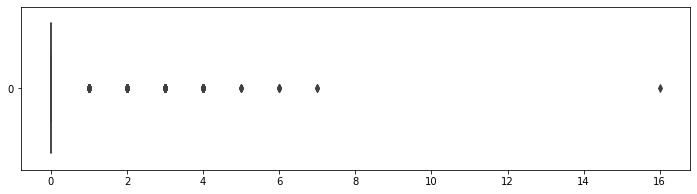


42 Icd9_360-389


PatientGuid  IQR Method
0     000B4862-7CE7-4EC5-8043-A97FCD74BD78         1.0
1     004EA6A7-6159-4D70-B06A-C0391D8623BD         1.0
2     005F61C9-E537-4AD2-B39C-37F25891F33A         1.0
3     0063B34F-C2C4-423A-A144-E51F7149253A         1.0
4     0094395F-F853-4689-85D3-4AE5C2EA3EC0         1.0
...                                    ...         ...
2022  FF574B32-F375-411E-B7C4-99C6034A187A         1.0
2023  FF64E901-267B-4095-B9D7-880BEA72B44B         1.0
2024  FF827F18-B26E-4B6A-B03D-1BE5F6768B88         1.0
2025  FF9BA1EB-03AB-47FE-B110-B559D8E0835B         1.0
2026  FFCCEB55-7FCA-4CCD-A035-9672674F2353         2.0

[2027 rows x 2 columns]

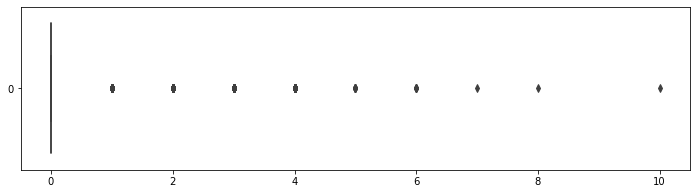


43 Icd9_390-459


PatientGuid  IQR Method
0    00DFEA15-6AE7-4FF3-A7D0-FEF911632377         7.0
1    055142E2-8249-48AF-B6B2-BF97980B9442         5.0
2    06FF3F02-0804-44C5-877D-5D3D9FACDD8C         5.0
3    07193BC3-F2F6-45F0-A26B-DE51C3F5D102         6.0
4    072267AD-EDF4-452E-9516-23A789744BA6         9.0
..                                    ...         ...
187  F5A3CCC6-EB10-45B0-B79C-EDC2E5A8DE53         6.0
188  F5E49D7A-FD35-4498-9A9C-B3771758E5A9         5.0
189  F93FBC08-847B-4C8E-BEA5-12AAA70D20F8         5.0
190  F99BAC85-04C9-4EFD-8394-12DBA8FF3322         5.0
191  FC106A57-FBEB-4913-9130-50E4375277A0         8.0

[192 rows x 2 columns]

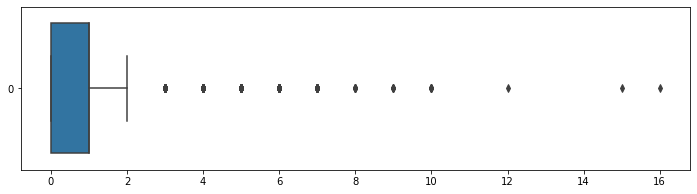


44 Icd9_460-519


PatientGuid  IQR Method
0   0C113990-AC0E-458C-9EDA-6247574AB49C         9.0
1   0D2F30BF-AB70-4EF5-95D8-14CC6EA92491        15.0
2   1C029B51-D235-456A-B430-8B41743C4091         9.0
3   4E69B386-48FC-4682-B021-ADA28DF1DDB5         9.0
4   6182D886-D7C3-436B-9B1E-39BD490D73F6        10.0
5   628B2FA5-2484-4CCC-8FBE-55E6551B1A4D         9.0
6   739BF737-F710-4817-BAA7-BB8B123907A2         9.0
7   8CFF18D7-6A06-4B7F-9127-59CB68FFC523         9.0
8   90074236-71F4-4194-8B5F-FC3EB1EECE11        10.0
9   95022F47-D410-4FF7-907B-757200936F57        12.0
10  9C52601E-5670-41DD-BC96-6D652CD1792C        12.0
11  B7E2E8E3-F32C-45BA-AE8E-979824063580         9.0
12  B88CF67F-5519-4CC2-94D0-58F50632C2D0        11.0
13  C000F888-2318-425D-A923-82FCB0BABBDD        15.0
14  C08FB926-833C-4FC3-8EBA-2439A9DB0C13        10.0
15  C8C2D94B-B73C-4EB3-930D-4867AD7F59E9         9.0
16  F3FFA232-1292-4200-99AB-33D1318ABF5D         9.0
17  F764BC86-0CFA-4661-8D84-FFFA8E2B6080        17.0
18  FE77FBC0-65C0-433A-A21E-7E3101590651        10.0

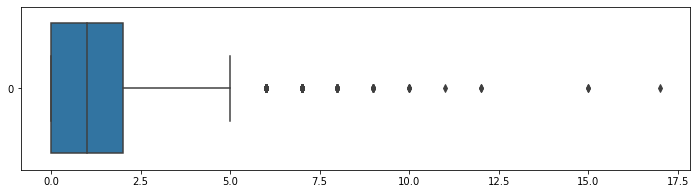


45 Icd9_520-579


PatientGuid  IQR Method
0   0094395F-F853-4689-85D3-4AE5C2EA3EC0         6.0
1   0814A591-0A14-49FD-A8E2-A5080CCC4585         6.0
2   186B7F0D-5FCC-437D-B8B5-B4B1871EA82E         5.0
3   2FAE265A-C425-41F0-96CE-3A0CCB26655F         6.0
4   2FB7F804-88D6-4B3B-BDEA-50E74EBEFAF5         6.0
5   30ED0935-3E4B-4401-9F9C-6EAE871D0625         5.0
6   4895D13C-50CD-4824-89B2-A3E7B0C3C1D2         5.0
7   52485ACC-93CE-4F87-BE50-67CF42AB6096         6.0
8   5EA18A14-293D-4455-AE36-DE315FC2B03E         6.0
9   614FDE5C-C98A-419E-A983-74A059619427         5.0
10  6AA24A92-2CAA-414C-B975-41EC65F86F20         6.0
11  6DFEA5EE-E7E1-4B7D-BC31-A0763EFDCAA7         5.0
12  6F0661DF-EE4C-45A5-9322-1E9C68552E5B         5.0
13  7B130739-C84E-472E-9662-4E4A3BF45EB9         5.0
14  7F92F1C2-0224-4E7A-9AFB-CF0C9C7E340A         6.0
15  83345D87-4A58-4296-A301-E39DCC4C4564         5.0
16  876A6456-74FE-4659-A440-390DD1D0A44F         6.0
17  89206387-88F1-4FC9-9E7D-36BB69B033F8         5.0
18  98156A05-9A0C-45F2-8D36-53664239F07E         5.0
19  993E5977-F712-46EF-A9D9-1157A0E401A7         5.0
20  9C112790-E60E-4DD4-80EE-A4007514913F         8.0
21  A5A76828-F61D-4F60-A327-D7DFEAE66B5B         7.0
22  ABC20007-4469-47BA-A8F4-3CCD5B8A0481         6.0
23  B612358D-F164-4CCF-BAA3-687CD19D3FA8         6.0
24  B9E6F517-65CA-41F3-A093-89C34DCAE0D0         5.0
25  C08FB926-833C-4FC3-8EBA-2439A9DB0C13         6.0
26  C58E5059-BF1E-4500-A32F-6B99A3F9530B         7.0
27  CA49C279-591F-4A13-86FE-FF9C16A4331C         7.0
28  DD15A857-7F7F-40A5-95C6-F9C415FE8EE7         7.0
29  E25647F9-E225-4040-BCF5-CE1303A7D1C1         7.0
30  F05F327D-4FD3-4960-B417-AFF74DA54C22         5.0
31  F127C5F8-7893-4B20-93B3-5184DD53FAAB         7.0
32  F1450EF6-9807-4507-A004-CDAE7D9DCB05         5.0
33  F764BC86-0CFA-4661-8D84-FFFA8E2B6080         9.0
34  FE68C32E-55AB-4C25-AAA9-CE62A3DC6975         6.0
35  FF618A7A-92FE-4651-8646-D43E81E7A949         8.0

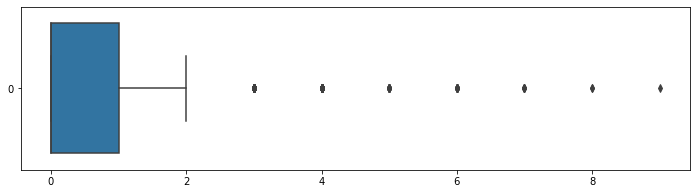


46 Icd9_580-629


PatientGuid  IQR Method
0   0DBFDED7-6A6E-43F8-AFEB-E25816B816C1         5.0
1   0E86556C-EA25-483A-9EAF-E86152FCF684         5.0
2   103384EE-2F6C-44D8-B7F2-B553A7B3C98A        17.0
3   1040DAEC-3ED4-4D36-BAD9-0A07C753F54D         5.0
4   1A6DDD7C-48D4-4A69-92FD-325FCDB21437         5.0
..                                   ...         ...
61  F90B4F51-7C77-4EAF-8A82-40B6A3619880         7.0
62  F92892FF-2CCB-4022-821C-7F6D7EBAA451         9.0
63  F93476FC-D6D3-4BE0-B396-D8994C4E1D84         5.0
64  F9DB519A-2929-4DE3-AFD2-98798CB19637         6.0
65  FB5F0578-B696-422F-98CA-750A301698AB         7.0

[66 rows x 2 columns]

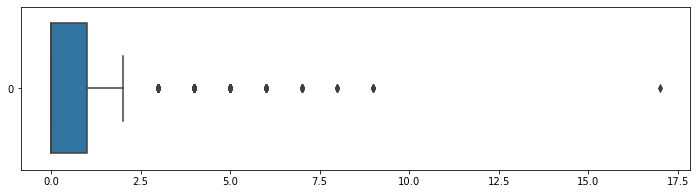


47 Icd9_630-679


PatientGuid  IQR Method
0    00607D4B-5F8F-4026-AF20-85A961B4B904         4.0
1    024BD07F-7629-4242-A531-D01EC7F76C53         1.0
2    0F95066E-DD9C-4355-91D1-C52C58F8BD14         2.0
3    10250D32-3A08-4065-995C-3FC649939086         1.0
4    10CC7823-E79C-4BE8-A444-7F4D5AB4568D         3.0
..                                    ...         ...
101  F5CAD516-1113-4277-B985-F212D1548A95         1.0
102  F92892FF-2CCB-4022-821C-7F6D7EBAA451         3.0
103  FB110E44-1A10-44C0-8D96-9C9E417CF2DE         1.0
104  FD72179C-5253-4B51-9338-0C82BA11CDA6         1.0
105  FE35D2CE-C7F7-4113-8D9A-449F22316FC6         2.0

[106 rows x 2 columns]

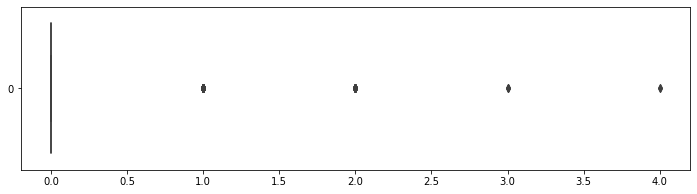


48 Icd9_680-709


PatientGuid  IQR Method
0     0005D9BD-0247-4F02-B7EE-7C1B44825FA1         2.0
1     00110ABC-DAB9-49E3-A1C8-88BBF8D58109         1.0
2     0029BBC8-7C22-4444-9F44-87BEF05FE033         1.0
3     003CEE1F-5BF5-4171-9284-F5464EC12D41         1.0
4     004AACFF-5D67-49B3-81F4-883A72A2AB97         3.0
...                                    ...         ...
2327  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2         1.0
2328  FF8011CC-ABB1-4E70-8F25-FEB75F33396F         1.0
2329  FF827F18-B26E-4B6A-B03D-1BE5F6768B88         3.0
2330  FFB6EAD7-1BFB-4EDD-BC30-67CD1E214474         1.0
2331  FFCD70A8-72FC-4F06-AC19-D9962B2CA95E         1.0

[2332 rows x 2 columns]

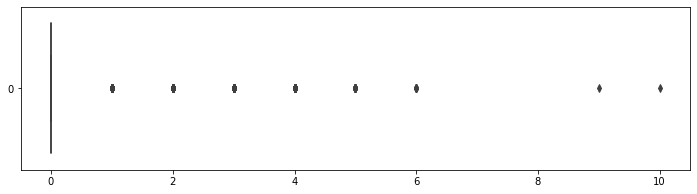


49 Icd9_710-739


PatientGuid  IQR Method
0   087E57D1-19C9-4484-94DC-FAF3D9535270        11.0
1   0D2F30BF-AB70-4EF5-95D8-14CC6EA92491        12.0
2   0DEE2EC2-410A-4C85-A9B9-E748618E9940         9.0
3   15005EAC-5B0D-42EF-A489-E497B3083933        10.0
4   1B2F8598-B43E-4E05-9D7C-2283D06FB291        33.0
5   1B77E7A1-2AB9-4C06-BC0E-EBAADB9729BA         9.0
6   23597C9E-C6A3-469D-BC9F-589F4B9E338C         9.0
7   25D3FD87-5835-45C7-9786-753609F9C9B3        15.0
8   2D939754-98D8-4A5D-98E7-7EDC765CE9ED        12.0
9   34E76C02-936A-4783-B997-EFB7EC80CA59        10.0
10  35A3A566-1928-4AC7-A3B9-3AACDE087EDA        15.0
11  36D7D2C3-D1B8-48C2-9791-707EA6E39549        11.0
12  39059E4A-778A-4685-8376-E426D7DEEC59        10.0
13  4917B3EE-FC57-4794-BCD0-2969D3E92EAA        14.0
14  493A0922-F726-4F71-9EE8-90E602F15D38        10.0
15  49CA3B01-095A-4822-8AEE-2A737D17675F         9.0
16  4F11DE19-5A62-46F2-9152-E8A8AC5359FC        13.0
17  4FA564B4-E9E9-4C8D-AC1B-A4CF32A73E48        10.0
18  614FDE5C-C98A-419E-A983-74A059619427        12.0
19  61F8DE80-0B5A-4999-871D-B462D2CF96A4        11.0
20  79DB16F0-7263-4E19-8933-48398190C3C0         9.0
21  86DF9B2E-1861-42E5-BE45-6E9EB15C6926        14.0
22  8B646975-9275-4ECE-9EEF-6E2D088A68FE        14.0
23  8FF5C02A-FC71-4530-A10D-2C0232E41376         9.0
24  91252511-0B5A-439A-B9C2-940D37DF48ED        10.0
25  92A29A83-1C34-4D7D-BD7F-54780EEE40BA         9.0
26  9597BBBB-D317-4A9A-A97F-10ECA7577491        10.0
27  963E58FB-EF50-4759-AD01-815FB708694B        11.0
28  A9E58C5A-0253-4C3F-A0C6-E4CE52738985         9.0
29  B27DD8F2-63BA-491D-A288-7F92E7B1348F        16.0
30  C45D6B6E-F47A-40B2-9A6B-B617153222B7        16.0
31  C8C2D94B-B73C-4EB3-930D-4867AD7F59E9         9.0
32  CA507F79-46F1-4BE5-B789-C19AACADB40D        13.0
33  D730B70A-7FAF-48FA-A923-7E9CC0ACA5C9         9.0
34  D7F13E0F-AD34-4B58-9500-0BB94433E043         9.0
35  D80EF4B2-A73F-4BBA-A2A5-3FD905D9215E        11.0
36  DF5CEAF4-188B-41B7-BDE1-E03E8AE670F0         9.0
37  E4C9B967-FB44-4D6A-B44C-0249EB90BD50         9.0
38  E66A4EE6-A006-4F8E-85E7-2A35F2AD7F62         9.0
39  EF5F93F8-8C36-406D-8AA8-5AD65A8D842D        17.0
40  F127C5F8-7893-4B20-93B3-5184DD53FAAB        14.0
41  F2C438DE-3D56-4B3C-B75F-7D51A5B33A3A         9.0
42  FE68C32E-55AB-4C25-AAA9-CE62A3DC6975         9.0

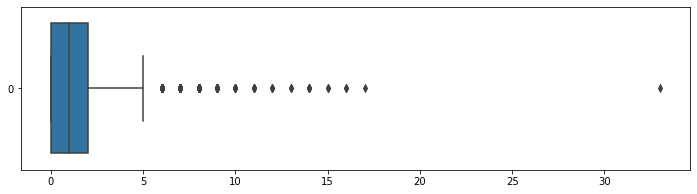


50 Icd9_740-759


PatientGuid  IQR Method
0    0119DD3F-0AE4-468A-88FE-D381ABCE75B9         1.0
1    019E6474-ADB6-49C9-BD29-716141A0B24C         1.0
2    02FF617A-8217-4DD0-93AB-DA317B235C27         1.0
3    055142E2-8249-48AF-B6B2-BF97980B9442         1.0
4    05589C4E-3D60-47E0-8928-00E3E081E1C8         1.0
..                                    ...         ...
172  F77CE7CC-7448-4F82-A1D5-51D2921B89A1         1.0
173  F94D8625-F307-43A6-8601-54030DD36130         1.0
174  FAC8D999-3F05-4A91-BD2D-019A3C3DA248         1.0
175  FAE325DA-EA04-4486-95E9-1B877BBF6C07         1.0
176  FB4AA8FD-8662-456D-B849-E5E9EA3AFD0A         1.0

[177 rows x 2 columns]

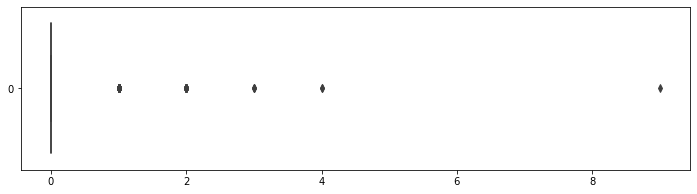


51 Icd9_760-779


PatientGuid  IQR Method
0  06BD76A2-370A-4D1D-83C6-C0AF43851D26         1.0
1  084FED70-312C-4EEC-8787-98BF93E06082         1.0
2  10A0E929-ACAF-41C6-8CEE-6964278C1E61         1.0
3  30B6531F-A780-4939-98C4-57507BD77D5D         1.0
4  5B3E5CD0-7ED4-40CD-A954-9E9672578E91         1.0
5  A6FFC0EE-63C2-4491-977E-BA2005B29FEF         1.0
6  B7BDBF13-9329-442E-8D5A-2AF4FB9361D9         2.0
7  BD90E724-ABCB-4E1B-993A-3617117711F6         2.0
8  DBEC07AF-2327-44C2-ABAA-FFBB3B28CFF9         1.0
9  FDDD271B-3EEB-42B8-B186-A2370493AB41         1.0

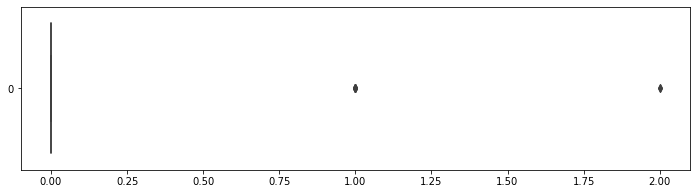


52 Icd9_780-799


PatientGuid  IQR Method
0   0844EA2D-08BD-4F7C-87CF-C4D594C8EF27         9.0
1   0B5BCD43-1065-4FEC-B2CC-C7A4225C2BF6        11.0
2   0C113990-AC0E-458C-9EDA-6247574AB49C         9.0
3   0CC39D02-9DD9-45B9-B492-93996EC07016        12.0
4   0D3013FF-5681-4827-972E-65011F8654AA        10.0
..                                   ...         ...
70  F764BC86-0CFA-4661-8D84-FFFA8E2B6080        15.0
71  F86D1ED0-AE76-4486-BDF4-6A0A0E15A87D        15.0
72  F90B4F51-7C77-4EAF-8A82-40B6A3619880        10.0
73  FB5F0578-B696-422F-98CA-750A301698AB         9.0
74  FF827F18-B26E-4B6A-B03D-1BE5F6768B88        12.0

[75 rows x 2 columns]

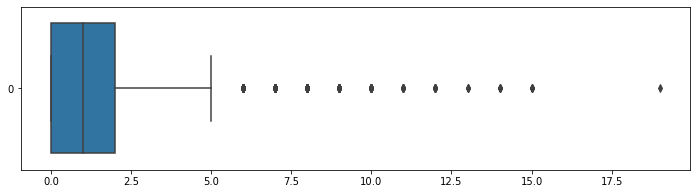


53 Icd9_800-899


PatientGuid  IQR Method
0     00110ABC-DAB9-49E3-A1C8-88BBF8D58109         2.0
1     005F61C9-E537-4AD2-B39C-37F25891F33A         2.0
2     008383B8-BF24-4DBB-A848-A377A4899599         1.0
3     0118F991-1988-4CDF-B2B7-94B66F74E694         1.0
4     0153C556-09DF-428C-BB87-279C07DBD9BF         1.0
...                                    ...         ...
1042  FEFBEB8A-083D-4133-A415-2801AB1190E5         1.0
1043  FF467B55-9E50-4073-AB7F-B9919DAA3CB7         1.0
1044  FF9B4F39-5A81-4150-9E2C-550BDE418FFB         1.0
1045  FFA25126-98E0-46E2-9B80-FBEEEA1C7D71         1.0
1046  FFCCEB55-7FCA-4CCD-A035-9672674F2353         4.0

[1047 rows x 2 columns]

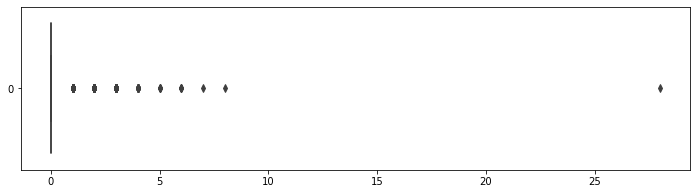


54 Icd9_E-V


PatientGuid  IQR Method
0    003CEE1F-5BF5-4171-9284-F5464EC12D41         7.0
1    00607D4B-5F8F-4026-AF20-85A961B4B904         5.0
2    038CA2A9-5B23-425E-A38A-00D3002E7500         9.0
3    03C055C2-B11D-41AB-B9CD-FC73EA7CF85E         6.0
4    03C952FD-0287-4EEE-AF9A-4A29FA562566         5.0
..                                    ...         ...
234  F9D29A1E-B462-46AE-88AC-188039B1D393         6.0
235  F9F7C1E9-0363-4565-BACE-071DB685F3C8         8.0
236  FACDA951-A203-4EBE-8BF7-247513E2682C         7.0
237  FAFBC212-1DCD-4DFB-91AF-57DE7E5877F7         9.0
238  FE1F52BF-3E1E-4910-9848-A45DF554FDEB         7.0

[239 rows x 2 columns]

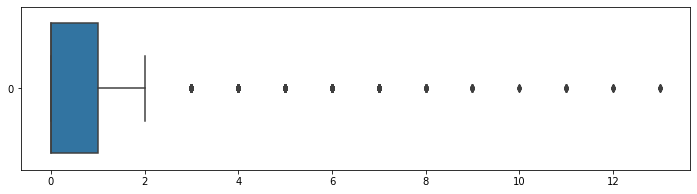


55 Icd9_Unknown


PatientGuid  IQR Method
0    00023761-9D8D-445B-874C-2424CC7CF620         1.0
1    006948F2-1118-4F56-A561-6A254EE357C6         1.0
2    008383B8-BF24-4DBB-A848-A377A4899599         1.0
3    00B7C61A-82E5-42E1-B9C0-6B39C5BC552F         1.0
4    0101AC44-80F4-4FF2-9600-322F1C07B38A         1.0
..                                    ...         ...
754  FE94F44C-D91A-4489-A822-B33FC8147754         1.0
755  FED06E2E-7123-4030-BB61-8B2FBAF149CF         1.0
756  FF618A7A-92FE-4651-8646-D43E81E7A949         1.0
757  FF9BA1EB-03AB-47FE-B110-B559D8E0835B         1.0
758  FFC8E19F-A199-46A3-895A-E3C07FBAC809         1.0

[759 rows x 2 columns]

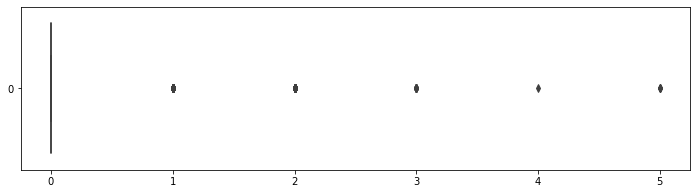


56 DiagnosisCount


PatientGuid  IQR Method
0    0589289A-6C1E-4F8B-A56E-A4B938580401        48.0
1    0B5BCD43-1065-4FEC-B2CC-C7A4225C2BF6        44.0
2    0CC39D02-9DD9-45B9-B492-93996EC07016        37.0
3    0D2F30BF-AB70-4EF5-95D8-14CC6EA92491        54.0
4    0DBFDED7-6A6E-43F8-AFEB-E25816B816C1        48.0
..                                    ...         ...
99   FAC8D999-3F05-4A91-BD2D-019A3C3DA248        40.0
100  FB5F0578-B696-422F-98CA-750A301698AB        35.0
101  FE18FB04-F8D3-4285-9A0F-F47554C6ADAF        36.0
102  FF391C47-2E9A-4F83-858D-A0EA50B19674        34.0
103  FF618A7A-92FE-4651-8646-D43E81E7A949        39.0

[104 rows x 2 columns]

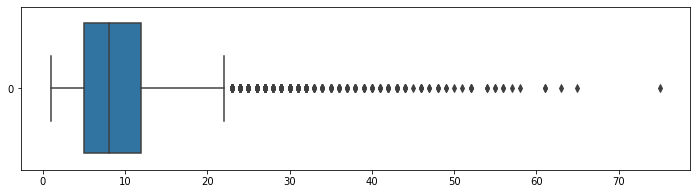


57 VisitCount


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

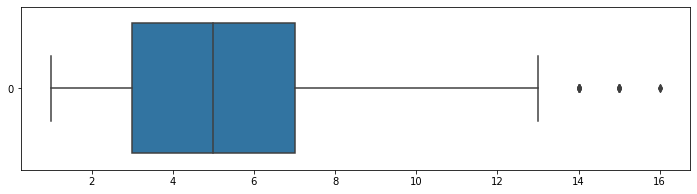


58 DiagnosisFreq


PatientGuid  IQR Method
0   034555D8-4351-4675-BCB5-2B09748B9AC5   11.000000
1   06E00F6F-FC5C-4AFC-B1F1-8F99A5CE82EC    4.333333
2   087E57D1-19C9-4484-94DC-FAF3D9535270    5.000000
3   0D2F30BF-AB70-4EF5-95D8-14CC6EA92491    5.400000
4   0D640735-3773-4ECE-B4D0-AA5159CDC42D    4.500000
..                                   ...         ...
63  F127C5F8-7893-4B20-93B3-5184DD53FAAB    4.666667
64  F1450EF6-9807-4507-A004-CDAE7D9DCB05    4.909091
65  F764BC86-0CFA-4661-8D84-FFFA8E2B6080    6.100000
66  F7A55C37-222E-40D6-883B-1F3943364BA8    8.000000
67  FAFBC212-1DCD-4DFB-91AF-57DE7E5877F7    6.000000

[68 rows x 2 columns]

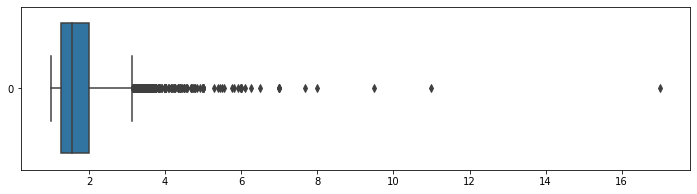


59 AcuteCount


PatientGuid  IQR Method
0    0254DF22-EA5C-49CD-B425-A08514C75149          11
1    038CA2A9-5B23-425E-A38A-00D3002E7500          24
2    04FC8B9B-D20C-47AE-814F-3003BDE59AA3          10
3    06A0A554-58F9-46DD-825E-A5CDAEAD409F          13
4    06BD76A2-370A-4D1D-83C6-C0AF43851D26          23
..                                    ...         ...
370  FD4ABAD5-3065-4C25-8C14-A8C976833A82          21
371  FD4F9D9C-3127-47B2-9676-778F68CFF245          11
372  FE1F52BF-3E1E-4910-9848-A45DF554FDEB          12
373  FE2E1DF7-1D56-430B-B8A0-7ED7F925A11C          10
374  FF827F18-B26E-4B6A-B03D-1BE5F6768B88          27

[375 rows x 2 columns]

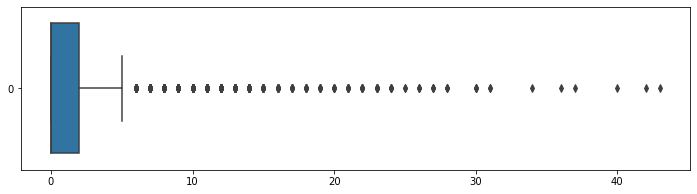


60 AcuteFreq


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

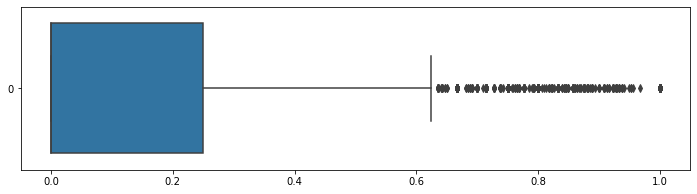

In [7]:
# using boxplots to understand the distribution for the featurers -- and its "outliers"

featuresL = list(dataset.columns)

for i, attr in enumerate(featuresL):
    
    print(i, attr)
    trainX = dataset[attr]
    
#     for ind, obs in zip(trainX.index, trainX):
#         print(ind, obs)
#         break
    
    # detecting significant outliers using the IQR method; suggested to try by a TA
    # however, this method might be considered a little simplistic
    q1 = trainX.quantile(.25)
    q3 = trainX.quantile(.75)
    iqr = q3-q1
    
#     threshold_max = q3 + 1.5*iqr
#     threshold_min = q1 - 1.5*iqr
    threshold_max = q3 + 3*iqr
    threshold_min = q1 - 3*iqr
    
    sig_outliers = []
    for index, obs in zip(trainX.index, trainX):
        if (obs > threshold_max) or (obs < threshold_min):
            sig_outliers.append([index, obs])
#     sig_outliers = [index, obs for index, obs in zip(trainX.index, trainX) if (obs > threshold_max) or (obs < threshold_min)]
    sig_outliers_df = pd.DataFrame(sig_outliers, columns=["PatientGuid", "IQR Method"])
    
    display(sig_outliers_df)
    
    fig, ax = plt.subplots(figsize=(12, 3))
    # I visually understand horizontally orriented boxplots better
    boxplot = sns.boxplot(data=trainX, orient="h", ax=ax)
    plt.show()
    
    print()

In [8]:
# identifying the skew value of each features

count = 0

right_count = 0
left_count = 0
norm_count = 0

skewL2 = []


for attr, skew in zip(dataset.columns, dataset.skew()):
    if skew > 1:
        skew_nom = "right"
        right_count +=1
    elif skew < -1:
        skew_nom = "left"
        left_count +=1 
    else:
        skew_nom = "normal"
        norm_count += 1
    print(count, attr, skew)
    
    if skew > 0:
        sign = "plus"
    elif skew < 0:
        sign = "minus"
    
    skewL2.append((count, attr, skew_nom, sign))
    
    
    count += 1
    
print()
print(right_count)
print(left_count)
print(norm_count)

# print(skewL)


0 Height_Max 0.6783793046464177
1 Weight_Max 0.8420299378986272
2 BMI_Max 0.9183224736223565
3 SystolicBP_Max 1.1315866009473696
4 DiastolicBP_Max 0.17582894831565515
5 RespiratoryRate_Max 9.757541555989281
6 Temperature_Max 39.118602497966215
7 Height_Min -0.2928924546986153
8 Weight_Min 1.4922922318223726
9 BMI_Min 2.069873870345969
10 SystolicBP_Min -0.6661569349290426
11 DiastolicBP_Min -0.005723200568372294
12 RespiratoryRate_Min -1.583846804360707
13 Temperature_Min -10.818199072478473
14 Height_Std 0.9890551808384666
15 Weight_Std -0.218372812706701
16 BMI_Std -0.4304680137910723
17 SystolicBP_Std 1.441101148053542
18 DiastolicBP_Std 0.31122129326846754
19 RespiratoryRate_Std 5.481558452848051
20 Temperature_Std 9.790780967410567
21 Height_Mean 0.3250424037300918
22 Weight_Mean 0.2370663675265918
23 BMI_Mean 0.47762492957362346
24 SystolicBP_Mean 0.5654916741406655
25 DiastolicBP_Mean 0.00795581289272482
26 RespiratoryRate_Mean 0.8881964666552503
27 Temperature_Mean -4.767839685

In [9]:
count = 0

right_count = 0
right_moderate_count = 0
right_high_count = 0
left_count = 0
left_moderate_count = 0
left_high_count = 0
norm_count = 0

skewL = []

for attr, skew in zip(dataset.columns, dataset.skew()):
    if skew > 1:
        skew_nom = "right"
        right_count +=1
        right_high_count +=1
    elif skew < -1:
        skew_nom = "left"
        left_count +=1 
        left_high_count +=1 
    elif 0.5 < skew < 1:
        right_count +=1
        right_moderate_count +=1
    elif -0.5 > skew > -1:
        left_count +=1 
        left_moderate_count +=1 
    else:
        skew_nom = "normal"
        norm_count += 1
#     print(count, attr, skew)
    
    skewL.append((count, attr, skew))
    
    count += 1
    
print()
skewL.sort(reverse=False, key=lambda x:abs(x[2]))
for skew in skewL:
    print(skew)


print()
print("right_high", right_high_count)
print("left_high", left_high_count)
print("right_moderate", right_moderate_count)
print("left_moderate", left_moderate_count)
print("right", right_count)
print("left", left_count)
print("normal", norm_count)


(11, 'DiastolicBP_Min', -0.005723200568372294)
(25, 'DiastolicBP_Mean', 0.00795581289272482)
(35, 'Age', -0.05882551130120443)
(4, 'DiastolicBP_Max', 0.17582894831565515)
(15, 'Weight_Std', -0.218372812706701)
(22, 'Weight_Mean', 0.2370663675265918)
(7, 'Height_Min', -0.2928924546986153)
(18, 'DiastolicBP_Std', 0.31122129326846754)
(21, 'Height_Mean', 0.3250424037300918)
(16, 'BMI_Std', -0.4304680137910723)
(57, 'VisitCount', 0.46731005487996347)
(23, 'BMI_Mean', 0.47762492957362346)
(24, 'SystolicBP_Mean', 0.5654916741406655)
(10, 'SystolicBP_Min', -0.6661569349290426)
(0, 'Height_Max', 0.6783793046464177)
(1, 'Weight_Max', 0.8420299378986272)
(26, 'RespiratoryRate_Mean', 0.8881964666552503)
(2, 'BMI_Max', 0.9183224736223565)
(14, 'Height_Std', 0.9890551808384666)
(28, 'BMI_Change', 1.108981326972921)
(3, 'SystolicBP_Max', 1.1315866009473696)
(34, 'Weight_Change', 1.2759946726271267)
(29, 'DiastolicBP_Change', 1.325136800591391)
(17, 'SystolicBP_Std', 1.441101148053542)
(8, 'Weight_M

In [10]:
# feature transformation depending on whether its right skewed or left -- and by how much

dataset_tran = dataset.copy()

for col, attr, skew, sign in skewL2:
    if sign == "plus":
        x_1 = pd.Series([val+1 for val in dataset_tran.iloc[:, col]])    
        log = list(np.log(x_1))
        
        sqrt = list(np.sqrt(dataset_tran.iloc[:, col]))
        
#         cbrt = list(np.cbrt(dataset_tran.iloc[:, col]))
        
        if ( abs(dataset_tran.iloc[:, col].skew()) < abs(pd.Series(log).skew()) ) and (abs(dataset_tran.iloc[:, col].skew()) < abs(pd.Series(sqrt).skew()) ):
            continue
        elif abs(pd.Series(log).skew()) < abs(pd.Series(sqrt).skew()):
            dataset_tran[attr] = log
        else:
            dataset_tran[attr] = sqrt
    
#         if abs(pd.Series(cbrt).skew()) < abs(dataset_tran.iloc[:, col].skew()) and abs(pd.Series(cbrt).skew()) < abs(pd.Series(log).skew()) and abs(pd.Series(cbrt).skew()) < abs(pd.Series(sqrt).skew()):
#             print(col, attr, pd.Series(cbrt).skew())
    
    elif sign == "minus":        
        x = pd.Series([val for val in dataset_tran.iloc[:, col]])
        
#         x_1 = pd.Series([val+1 for val in dataset_tran.iloc[:, col]])
        
        best_exp = 1
        for exp in range(2, 21):
            best_exp_tran = list(np.power(x, best_exp))
            exp_tran = list(np.power(x, exp))
            if abs(pd.Series(exp_tran).skew()) < abs(pd.Series(best_exp_tran).skew()):
                best_exp = exp
                best_exp_tran = list(np.power(x, best_exp))
        dataset_tran[attr] = best_exp_tran
        
            
#         log = list(np.log(max(x_1+1)-x_1))
        
#         sqrt = list(np.sqrt(max(dataset_tran.iloc[:, col]+1)-dataset_tran.iloc[:, col]))
        
#         cbrt = list(np.cbrt(max(dataset_tran.iloc[:, col]+1)-dataset_tran.iloc[:, col]))
        
#         if ( abs(dataset_tran.iloc[:, col].skew()) < abs(pd.Series(log).skew()) ) and (abs(dataset_tran.iloc[:, col].skew()) < abs(pd.Series(sqrt).skew()) ):
#             continue
#         elif abs(pd.Series(log).skew()) < abs(pd.Series(sqrt).skew()):
#             dataset_tran[attr] = log
#         else:
#             dataset_tran[attr] = sqrt
            
display(dataset_tran)

Height_Max  Weight_Max   BMI_Max  \
00023761-9D8D-445B-874C-2424CC7CF620    4.234107    5.225747  3.400264   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1    4.219508    4.927254  3.169517   
000B4862-7CE7-4EC5-8043-A97FCD74BD78    4.203150    4.616011  2.870962   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109    4.283587    5.375278  3.433439   
002667F4-B9A3-4DE2-875F-8034DD637865    4.203150    4.700480  3.136059   
...                                          ...         ...       ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353    4.320151    5.315666  3.290526   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E    4.203150    4.958640  3.290638   
FFEF293B-6147-47F0-8F0B-76180C124205    4.110874    5.270946  3.658575   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6    4.290459    5.373425  3.419856   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63    4.219508    5.123964  3.301488   

                                      SystolicBP_Max  DiastolicBP_Max  \
00023761-9D8D-445B-874C-2424CC7CF620        4.905275         4.465908   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1        5.030438         4.418841   
000B4862-7CE7-4EC5-8043-A97FCD74BD78        4.849907         4.349649   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109        4.875197         4.394449   
002667F4-B9A3-4DE2-875F-8034DD637865        5.081404         4.510860   
...                                              ...              ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353        4.934474         4.521789   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E        4.849907         4.349649   
FFEF293B-6147-47F0-8F0B-76180C124205        4.890349         4.488636   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6        5.147494         4.564348   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63        5.176150         4.564348   

                                      RespiratoryRate_Max  Temperature_Max  \
00023761-9D8D-445B-874C-2424CC7CF620             2.885640         4.594109   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1             2.885640         4.601162   
000B4862-7CE7-4EC5-8043-A97FCD74BD78             3.044522         4.592747   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109             2.885640         4.592747   
002667F4-B9A3-4DE2-875F-8034DD637865             3.044522         4.592747   
...                                                   ...              ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353             2.995732         4.592747   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E             3.218876         4.593098   
FFEF293B-6147-47F0-8F0B-76180C124205             2.885640         4.582925   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6             2.885640         4.600158   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63             2.885640         4.601162   

                                      Height_Min  Weight_Min   BMI_Min  \
00023761-9D8D-445B-874C-2424CC7CF620   4489.0000    5.209486  3.355851   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1   4225.0000    0.000000  0.000000   
000B4862-7CE7-4EC5-8043-A97FCD74BD78   4225.0000    0.000000  0.000000   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109   4342.3785    0.000000  0.000000   
002667F4-B9A3-4DE2-875F-8034DD637865   3481.0000    0.000000  0.000000   
...                                          ...         ...       ...   
FFCCEB55-7FCA-4CCD-A035-9672674F2353   4342.3785    0.000000  0.000000   
FFCD70A8-72FC-4F06-AC19-D9962B2CA95E   3844.0000    0.000000  0.000000   
FFEF293B-6147-47F0-8F0B-76180C124205   3600.0000    5.261653  3.649463   
FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6   4342.3785    5.361292  0.000000   
FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63   4342.3785    0.000000  0.000000   

                                      SystolicBP_Min  DiastolicBP_Min  \
00023761-9D8D-445B-874C-2424CC7CF620         14400.0             62.0   
0005D9BD-0247-4F02-B7EE-7C1B44825FA1         15625.0             59.0   
000B4862-7CE7-4EC5-8043-A97FCD74BD78          6400.0             56.0   
00110ABC-DAB9-49E3-A1C8-88BBF8D58109         15625.0             75.0   
002667F4-B9A3-4DE2-875F-8034DD637865         12544.0             70.0   
...     

In [11]:
count = 0

right_count = 0
right_moderate_count = 0
right_high_count = 0
left_count = 0
left_moderate_count = 0
left_high_count = 0
norm_count = 0

skewL = []

for attr, skew in zip(dataset.columns, dataset_tran.skew()):
    if skew > 1:
        skew_nom = "right"
        right_count +=1
        right_high_count +=1
    elif skew < -1:
        skew_nom = "left"
        left_count +=1 
        left_high_count +=1 
    elif 0.5 < skew < 1:
        right_count +=1
        right_moderate_count +=1
    elif -0.5 > skew > -1:
        left_count +=1 
        left_moderate_count +=1 
    else:
        skew_nom = "normal"
        norm_count += 1
#     print(count, attr, skew)
    
    skewL.append((count, attr, skew))
    
    count += 1
    
print()
skewL.sort(reverse=False, key=lambda x:abs(x[2]))
for skew in skewL:
    print(skew)


print()
print("right_high", right_high_count)
print("left_high", left_high_count)
print("right_moderate", right_moderate_count)
print("left_moderate", left_moderate_count)
print("right", right_count)
print("left", left_count)
print("normal", norm_count)


(4, 'DiastolicBP_Max', -0.00028440485496116896)
(11, 'DiastolicBP_Min', -0.005723200568372294)
(25, 'DiastolicBP_Mean', 0.00795581289272482)
(35, 'Age', 0.014655807230516389)
(1, 'Weight_Max', 0.057337848293453196)
(7, 'Height_Min', -0.05763513093746108)
(29, 'DiastolicBP_Change', 0.062344166391555815)
(14, 'Height_Std', 0.07294958246891464)
(10, 'SystolicBP_Min', 0.07424074106850066)
(12, 'RespiratoryRate_Min', 0.08646551374895635)
(56, 'DiagnosisCount', -0.10309243928123928)
(24, 'SystolicBP_Mean', 0.11233684020902988)
(23, 'BMI_Mean', -0.12729364002511603)
(38, 'Icd9_240-279', 0.13492833510540184)
(21, 'Height_Mean', 0.13886027817489585)
(57, 'VisitCount', -0.14021381298225244)
(17, 'SystolicBP_Std', 0.15659441332567967)
(26, 'RespiratoryRate_Mean', -0.1889767444569665)
(27, 'Temperature_Mean', 0.20547247044629083)
(15, 'Weight_Std', -0.218372812706701)
(19, 'RespiratoryRate_Std', 0.22312126471957633)
(22, 'Weight_Mean', 0.2370663675265918)
(2, 'BMI_Max', 0.24864172884517574)
(32, 

0 Height_Max


PatientGuid  IQR Method
0  34BE1AB7-01D7-440D-81AB-8BE5EB2F48A4        54.0
1  60279539-9521-46B9-8DF4-81FBDA08ECF2        56.5
2  9C3CA08C-DADC-444E-87CD-555F3F1E1996        56.0
3  A85B64C5-9454-4063-8403-C07C710D0A2D        56.0
4  E843942B-5EED-44F8-8198-D5D3DA1EF8A3        56.5
5  F6F90681-FDFA-47B5-BA46-189F1D29AD14        56.0

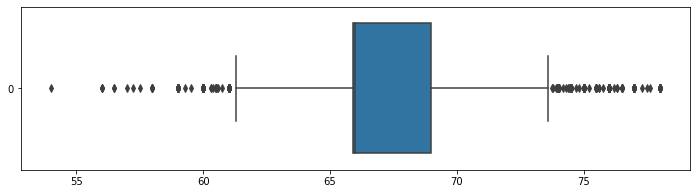


1 Weight_Max


PatientGuid  IQR Method
0   18BC11B4-EBF1-4BF1-B9E7-C11055BC6A14     449.743
1   1B0556CF-72DF-480E-8429-DF61C252F16F     425.000
2   1EA808B2-72A4-4C6E-A716-300B9C838915     423.000
3   25785CFF-F39F-4BA6-8DE3-A5530008DD5B     418.878
4   2A52F349-5132-42AC-ABF9-3D803261D580     451.000
5   2FB646C2-6591-4DEF-B48E-D011515C02F8     418.878
6   30A7AAC7-C241-48BE-8A69-58FC73BE481F     451.948
7   3883F426-565D-496E-BA34-13FBEF03EB7E     448.420
8   3FA7FB3D-1998-434B-876F-A68DB154BC8D     451.948
9   4AEE26AF-745F-4B74-8542-1B719B25B8B9     423.300
10  6719844D-4EF6-47C9-8C73-EF7BB61C2BA4     416.674
11  9C8A25F3-4F46-4350-976E-D30F0BE0E413     432.106
12  A6468F7F-417A-4261-AC6D-D64F8E2228A9     440.000
13  B16E2F06-7EB4-44BB-91B3-795D90BED43B     451.948
14  C85A8A29-9C32-4B1A-B97A-40DFA987EB09     445.000
15  CDDA9B54-D578-4A83-B777-9B6816C0EE91     423.288
16  CED5D2BF-3C3A-47B8-868D-AC27DD88CFCF     429.901
17  F65CCB07-8354-4B70-8C2A-E3A40F0CC496     449.743

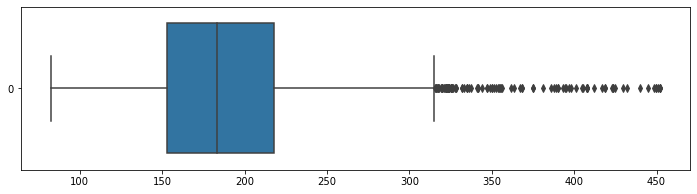


2 BMI_Max


PatientGuid  IQR Method
0   03C055C2-B11D-41AB-B9CD-FC73EA7CF85E      60.458
1   1A883AAC-0DBF-4981-B35D-3C34B96897A2      60.271
2   1EA808B2-72A4-4C6E-A716-300B9C838915      61.024
3   2A7D81AE-0089-4269-B7DA-70182F54D8E9      68.652
4   498421C5-3895-47FC-9312-0EF9B85ED820      67.503
5   530720D7-65C6-4E24-89A9-DAE0E5259154      69.207
6   5883AF5C-513F-4F2A-B204-762AAF6963E6      62.098
7   5BA1DD3D-3E94-46D6-AA6E-CA96FAD120A3      60.328
8   63D44CA0-2BE6-4736-B6EA-A539C26A9531      62.899
9   763112F7-6F43-43D7-B745-75C0506E4197      62.779
10  77D719CC-C139-411D-A575-2860A1C01BEF      65.806
11  A6468F7F-417A-4261-AC6D-D64F8E2228A9      63.127
12  E1D71461-4283-4B69-ADE6-71CB047AC17A      66.483
13  EB494A20-8414-47D3-BE0B-6F00FA0FCB9E      60.271

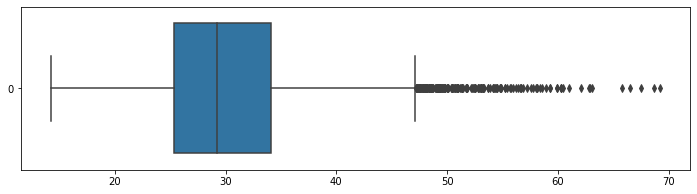


3 SystolicBP_Max


PatientGuid  IQR Method
0  3A822D7B-A7C2-4EC1-92B8-CD1A35C031BE       238.0
1  6F0E750E-5BCD-4ABE-B4F0-FBBA856565B4       230.0
2  760436A9-E94B-4FA0-803C-F360EAF82F47       270.0
3  8DB692FC-4383-41B1-A950-03E2E954CFD5       240.0
4  971ABA70-6F5F-422E-8382-5ABC62AA8F2F       230.0
5  A08C57E2-753C-4A06-8CB0-53FB309E656C       230.0
6  C56D0649-A5E6-4BB2-AFF6-E680F1ED6B2F       227.0
7  E1D71461-4283-4B69-ADE6-71CB047AC17A       240.0

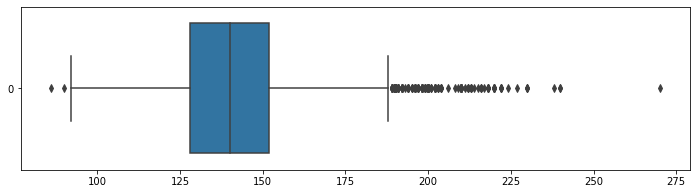


4 DiastolicBP_Max


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

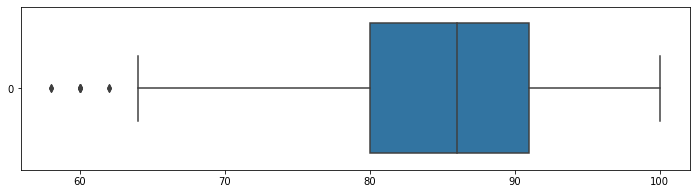


5 RespiratoryRate_Max


PatientGuid  IQR Method
0   02D318BB-B886-4D6F-BF98-8AF41F4023A8        36.0
1   03C5142D-319A-4D46-B726-81196F08927E        48.0
2   047FD84D-8B1C-4DD3-AEFE-CCAD275CCF91        44.0
3   096A281C-7C60-4F6D-B0E5-195192752C54        76.0
4   0CE143F6-78DE-4509-A101-6F774A4F5B6A        60.0
..                                   ...         ...
62  CD84E45F-F40A-4095-9439-395E0A5C0491        73.0
63  E109BFE0-E824-4E7A-A5C4-34EBF6F2D6E0        34.0
64  FA3C6FDE-35A0-46DC-B284-9EA293C20D3C        61.0
65  FBF3DE89-BC83-4407-9DBE-7B29C13A0ACB        36.0
66  FC928FD9-8124-4095-B2C6-ECB7A4CC4862        61.0

[67 rows x 2 columns]

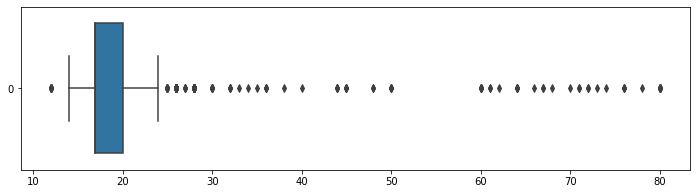


6 Temperature_Max


PatientGuid  IQR Method
0   006948F2-1118-4F56-A561-6A254EE357C6       102.6
1   00B7C61A-82E5-42E1-B9C0-6B39C5BC552F       103.0
2   083C6B1A-CFB1-4C4D-B97D-0548171A9FE2       103.0
3   0B83EC0A-F830-4955-9213-912816DB32FB       102.3
4   0CF2A715-8C77-4D0E-B775-808E4F3E0F07       102.1
5   124238D1-FCDB-4D48-A43C-4B38F8E2E61D       102.1
6   168E854D-3627-471E-A388-0E477C5B01B2       103.0
7   1B36BD01-707C-44F4-9070-F534A9DC5541       104.2
8   1B9B36F1-1A1A-4EFF-99B5-D0F31E6A291C       102.1
9   1BAD1433-9802-4ADB-A667-9B89FA381BC6       103.0
10  1CFE0F7B-95F5-4EFC-B814-6D2343681C38       103.6
11  1EA808B2-72A4-4C6E-A716-300B9C838915       105.0
12  2F83BEA5-AA67-42FA-95E0-ED594F0A96CC       103.8
13  34B284C1-8560-460C-BC70-1D66376A51A9       104.0
14  3817E750-E51E-4F8C-B012-D97E2C7AB82E       103.6
15  3BB3763A-838E-4ADA-B8C5-1981640C1EC3       102.3
16  3D14C099-BF03-44AB-A9FC-99A2BFEE134B       102.5
17  3D61E389-64CE-48DC-BEC0-5EE371006563       102.2
18  3EEB996D-3831-4EAD-95A1-EF7EC05FE5F9       102.8
19  42320C55-4C1A-42DF-A024-0ED1BA4ADADD       102.0
20  425C3D38-C43E-4E78-95C8-0D0C58266AA5       103.5
21  52C3AD27-FAAE-48DF-9803-4E307CA8B0EC       104.7
22  53BABCAD-A094-405B-BFC5-E0B07AF9653A       102.0
23  53EA7F3C-22F8-4247-BE0E-66DEA70B7728       103.0
24  59AA8FC7-F01D-4296-A20A-D65317C79187       102.5
25  5D438E9C-84D3-4CA7-91F7-E91D777D25AB       103.4
26  622B4B02-DAC4-4ADE-91F9-54C9D4B45D37        93.6
27  7656A579-3B4B-40CF-976C-752246147A4F       102.3
28  775BF643-5BB2-44C0-8C60-B8B9E7D63269       102.5
29  7EB4E97F-FA91-44E5-ADBF-61B10A8AB068       102.5
30  7FE5A367-AF3F-4F1D-9760-859525B75F1A       102.4
31  8E6998FA-E69E-4D7B-AC6C-5EEF2838516C       103.8
32  9308EB40-647E-4F5F-B1C6-3FC6BF82A7CE       102.4
33  9379E14D-8A3E-4982-95EB-73BBF2CE1D83       102.0
34  9C52601E-5670-41DD-BC96-6D652CD1792C       103.0
35  9DEB3C36-6C37-4339-AF65-642AD364395C       102.0
36  A6DED543-EA29-40E0-8935-D652A8E6038E       102.0
37  B401E703-EDA7-4046-A8A9-CC4B105866FC       102.0
38  B688190F-A837-4769-9059-F766E35FDD24       103.2
39  B8481F3D-3E6B-4099-A63B-10B4409FDF75       102.9
40  B94E6051-46E2-4A8D-BBDD-C67D4A8506A0       102.9
41  BB320ECA-E45B-4617-A63B-6E02246DB529       106.0
42  C065E34B-C0CC-4239-BC25-292F5E734805       102.6
43  D0A3E98E-12C2-48BE-A0DD-2440F888F3B9       103.0
44  D6BCF178-C8E7-4B89-BDE2-E4A9763CAE5E       107.5
45  DB5D808A-9638-40F9-9967-675DFE44B1C0       103.5
46  E112B9DB-175F-4F7C-86A0-9109ACA45ACC       105.0
47  E28B2C53-805D-464C-8BF7-5C841E8473B0       102.2
48  E8042E57-07D1-42F0-8380-9C6386313D7B       104.0
49  EC9C9906-C3C1-4A36-A818-1F4B903F1A68       106.0
50  F5236597-3773-4780-9717-607631A58AE6       181.0
51  FF618A7A-92FE-4651-8646-D43E81E7A949       104.3

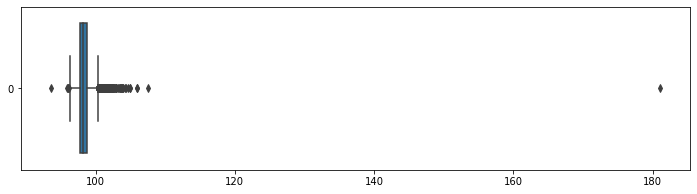


7 Height_Min


PatientGuid  IQR Method
0  8A1A1BFD-B70C-460F-ABE8-2A99FAF8F5DC        77.0
1  9B5B930B-ADDD-428E-8501-EA627CEF2097        77.0

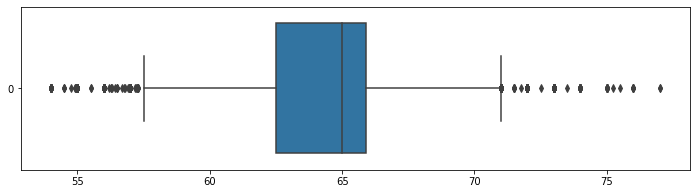


8 Weight_Min


PatientGuid  IQR Method
0     00023761-9D8D-445B-874C-2424CC7CF620       182.0
1     003CEE1F-5BF5-4171-9284-F5464EC12D41       105.0
2     004382BD-E31F-4091-8DE5-E86A59D70C2D       230.0
3     006948F2-1118-4F56-A561-6A254EE357C6       164.0
4     006E3A23-F786-4ED2-BE70-D91D23BA56EA       221.0
...                                    ...         ...
2339  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4       228.0
2340  FFB0830F-B789-4B37-A43C-6E2A02368F5E       155.0
2341  FFC8E19F-A199-46A3-895A-E3C07FBAC809       206.0
2342  FFEF293B-6147-47F0-8F0B-76180C124205       191.8
2343  FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6       212.0

[2344 rows x 2 columns]

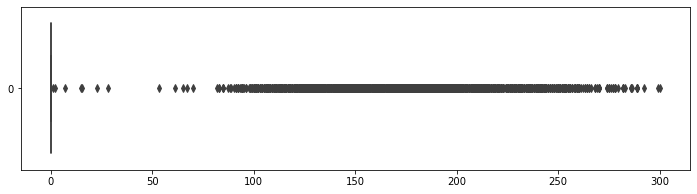


9 BMI_Min


PatientGuid  IQR Method
0     00023761-9D8D-445B-874C-2424CC7CF620      27.670
1     004382BD-E31F-4091-8DE5-E86A59D70C2D      40.738
2     006948F2-1118-4F56-A561-6A254EE357C6      26.230
3     007CB9B1-F4DE-44FA-9CEC-916C1235988C      25.766
4     0094395F-F853-4689-85D3-4AE5C2EA3EC0      18.654
...                                    ...         ...
1587  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2      36.154
1588  FF8011CC-ABB1-4E70-8F25-FEB75F33396F      23.203
1589  FF9BA1EB-03AB-47FE-B110-B559D8E0835B      20.551
1590  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4      34.663
1591  FFEF293B-6147-47F0-8F0B-76180C124205      37.454

[1592 rows x 2 columns]

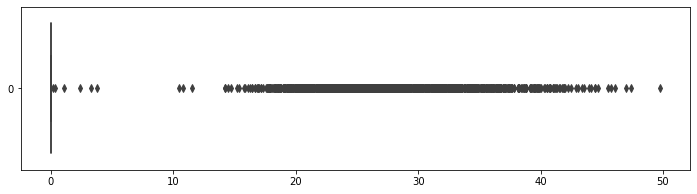


10 SystolicBP_Min


PatientGuid  IQR Method
0   00AB891C-67A0-4528-9EC2-50DD7AB368AB        10.0
1   03F6F07A-61EF-434C-9036-8338C6963735        11.0
2   047FD84D-8B1C-4DD3-AEFE-CCAD275CCF91        12.0
3   0592D97A-1B6D-429D-84FE-723B0527D4CE        11.0
4   20D51030-10EF-4DA0-B872-2125A9565EE6       192.0
5   3C322598-5E8F-4BF2-8EF1-8843FC9B1851        10.0
6   4449F75C-23CA-45C3-88D4-981E61883481        11.0
7   498421C5-3895-47FC-9312-0EF9B85ED820        30.0
8   9F138440-07E6-47C3-BCEA-D6DDC87C87D0        14.0
9   C277AE2F-7247-4C74-9B0E-3FE843097C87        17.0
10  C5D41CE5-13F8-4D9A-85EB-8D7381BE644B        10.0
11  E109BFE0-E824-4E7A-A5C4-34EBF6F2D6E0        34.0

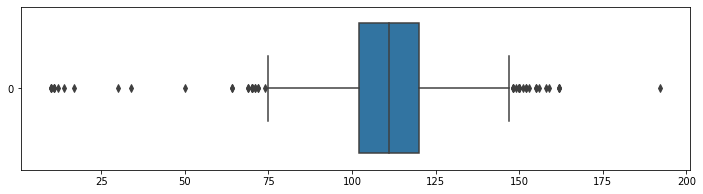


11 DiastolicBP_Min


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

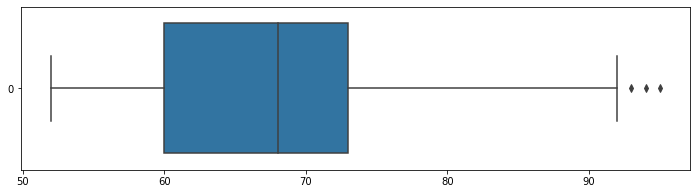


12 RespiratoryRate_Min


PatientGuid  IQR Method
0   15A8FF8C-B96A-4687-923C-6C9D87967CD3         1.0
1   1829802B-B60A-45CA-BAC6-AAF3CA751A78         1.0
2   1C029B51-D235-456A-B430-8B41743C4091         1.0
3   2AAC00B1-4A08-47D3-9876-12554055E77A         1.0
4   33D5D160-645F-4687-9EA5-1F3301451F66         1.0
5   3FA5D68A-405B-48D1-B0DA-9D8916C54F22         4.0
6   4643F5D1-78E9-4333-9B89-342A471F3C05         1.0
7   61F6FDD0-1FF1-4180-90C9-A989D756C40F         1.0
8   6C87A189-5CFC-4FDF-9EDC-66A5230EF5D5         1.0
9   8847847B-295F-4FE1-BCA6-D81D364148DA         1.0
10  9660534A-6D07-418B-873E-3D69C9A3D064         1.0
11  9BE6A90D-9CAA-423F-A487-670865375484         1.0
12  A3A69085-0689-4DB5-917A-52C6A838D349         1.0
13  B08D782F-B803-47FB-AA97-1BB5B04DF0DF         1.0
14  B3A2BB4D-1C32-4D01-8765-F3DD2098B008         1.0
15  B8866A2A-6C38-4957-97FB-F5612C76052D         1.0
16  D6DC685F-2CB1-4D7F-8781-76ED480D7EFC         2.0
17  DFD50F7E-2F89-4BDE-B567-CD3B306DE31F         5.0
18  ECB471F6-0282-48AA-B7A0-743177A88266         3.0
19  F7D81464-588E-4B12-9F54-90E6155C19D9         1.0

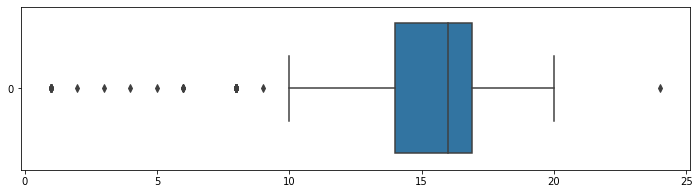


13 Temperature_Min


PatientGuid  IQR Method
0    0094395F-F853-4689-85D3-4AE5C2EA3EC0        93.9
1    02D318BB-B886-4D6F-BF98-8AF41F4023A8        93.1
2    035BB97A-58CF-43E9-BA0D-BD7CC4D47CBC        87.7
3    03C5142D-319A-4D46-B726-81196F08927E        93.7
4    04308486-471F-4A73-B8A4-0AC389844178        79.0
..                                    ...         ...
393  FEBFEB1E-EF34-47C8-9CAC-28A12DF5EE42        92.3
394  FED06E2E-7123-4030-BB61-8B2FBAF149CF        77.0
395  FEF753C0-9808-49F1-8E31-9FDA502B360A        93.2
396  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2        92.5
397  FF69D56A-B1C5-4F04-B458-5F58BB9E70E6        76.0

[398 rows x 2 columns]

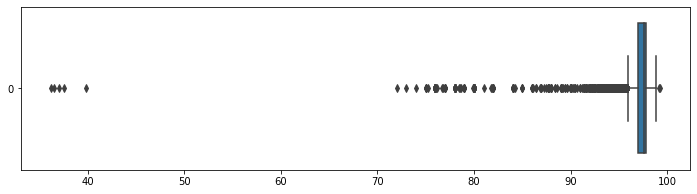


14 Height_Std


PatientGuid  IQR Method
0  2371B822-C007-4EC7-86F3-F03625034F3A    6.868578
1  563B4D81-611E-411B-9A6A-ECB5DC91F270    6.987828
2  A6082359-266E-45F3-BB81-F193D195FC73    6.987828
3  EB494A20-8414-47D3-BE0B-6F00FA0FCB9E    8.485438

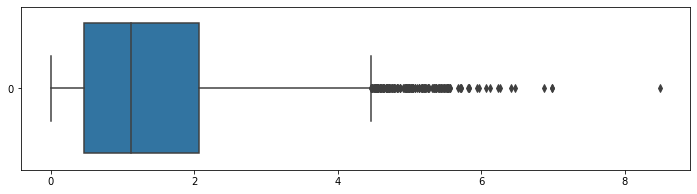


15 Weight_Std


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

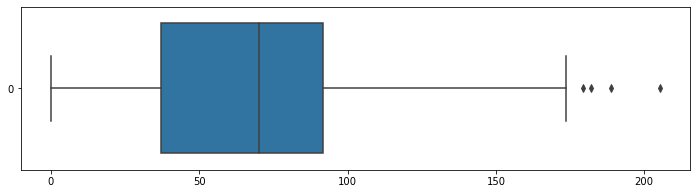


16 BMI_Std


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

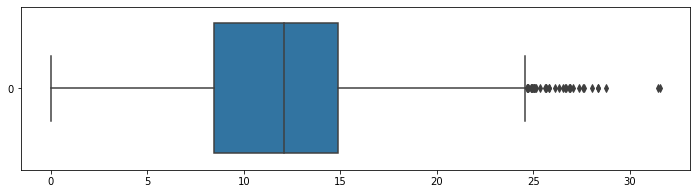


17 SystolicBP_Std


PatientGuid  IQR Method
0   007CB9B1-F4DE-44FA-9CEC-916C1235988C   36.460024
1   00AB891C-67A0-4528-9EC2-50DD7AB368AB   47.623524
2   0D098927-DB14-4D3E-9174-6961F9AEAB5A   43.003876
3   10D2EDD4-DFB2-44F6-B73F-0351739F4A03   37.873825
4   14F4B8EE-90A2-48E2-B201-45CA2A70E936   31.796226
5   15D170D8-C4AF-4273-B61A-D1997F22676E   32.405263
6   1D21222A-4A26-4614-BCD0-D32F3E7139CD   33.306766
7   29C81907-728D-4405-8A1F-C6D9871E27A6   34.792707
8   34A3E425-EE98-4E80-AF06-8BBDB1F1E6E3   32.557641
9   3A822D7B-A7C2-4EC1-92B8-CD1A35C031BE   37.427206
10  3C322598-5E8F-4BF2-8EF1-8843FC9B1851   44.384682
11  3EF56EE9-1DD6-4190-8C21-23E28E0F9596   60.961737
12  42EAB721-3B2E-4E91-97D7-537D1283D2F2   32.010415
13  46B8AB7D-052E-4C69-B950-3B74156878BF   40.311289
14  4B49EA55-531C-4E9C-9046-BBD19C7D42D6   31.753908
15  52B09A3F-6D25-4425-8271-2D083A074934   31.531495
16  54320C1C-89A0-46F5-91DA-3AC4C58F6331   42.407900
17  552DDF29-3251-43C7-BBF6-131365E96428   32.305367
18  5C50903B-2388-4152-96F5-92A9C2F74328   33.079450
19  71CA4B6F-BAAC-4264-9A45-423C5041866D   32.993990
20  74D63498-8697-48FB-A853-DEF38B1D736A   33.196385
21  760436A9-E94B-4FA0-803C-F360EAF82F47   41.902321
22  77AC7DB2-B798-488A-AE06-B2E3D8CA0A3D   53.678053
23  8DB692FC-4383-41B1-A950-03E2E954CFD5   33.058333
24  9716AECC-8887-4DE4-950D-983CA742460E   30.847425
25  9B688E9F-D6E6-40BD-A7B4-921825662912   31.088408
26  9DF22440-9F32-4EA1-8E58-2276FCF35916   36.529804
27  A08C57E2-753C-4A06-8CB0-53FB309E656C   31.637709
28  A4086AB7-8647-4ACF-8D31-CF5630DB6B5E   30.786713
29  A56FC239-676F-4AE1-BDE4-7DB4BD4D34A3   32.633355
30  ADE4C15D-FECA-475A-AF04-4B79EF40086F   36.518655
31  B94071BE-D223-467D-A35C-36B39D87867F   43.038742
32  BCE3BB64-D61B-4F98-9A53-40EA70983988   42.603132
33  C56D0649-A5E6-4BB2-AFF6-E680F1ED6B2F   55.428633
34  C6838560-5785-492A-9485-04D9ED62B421   30.498283
35  C8F6D28D-E49D-4DF5-A521-0FA818B284C3   41.617304
36  D1B7C483-5725-44A6-95A4-4DC290F1B53E   38.730215
37  D64A394B-23D3-49F8-BD39-9DD5F1720D85   37.463703
38  D6F55600-FD8A-4438-AC04-205D4CF0618A   30.565608
39  E03F262B-4CD2-43C2-B63A-370A127755A0   31.765810
40  E14F7E59-D508-47C7-9F25-A915690AF939   33.468254
41  E1D71461-4283-4B69-ADE6-71CB047AC17A   42.458027
42  E23776EC-27FF-4CBA-BB44-30E7ED7A822E   30.906310
43  E6D393FA-1041-4EA0-98E6-ACF29EFEB634   38.114497
44  E94B77A2-FF2A-47BC-ACA3-1B8DA930F6FE   39.283276
45  E9973CB7-8EDE-49B0-ABE5-25911EF5C619   32.883633
46  EC9C9906-C3C1-4A36-A818-1F4B903F1A68   31.891507
47  F19DE34B-1BEA-4B18-8E1C-180827E691EB   30.619341
48  F53B4C04-030D-4297-99F4-FC92F02919B1   30.730279
49  F676533A-B5A5-4B43-8EE6-3535F4F61C29   33.115705
50  FC7F181D-3B74-421E-9CD2-3AAD7E242B08   32.600579
51  FF618A7A-92FE-4651-8646-D43E81E7A949   33.735410

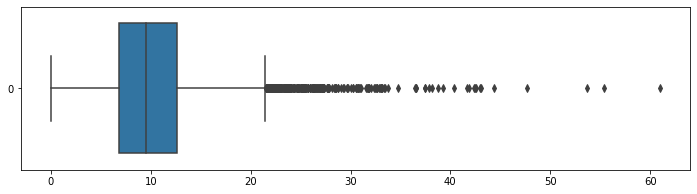


18 DiastolicBP_Std


PatientGuid  IQR Method
0  438AFC4F-4A96-4542-931C-E1F3EAD22C7F   20.297783
1  548A8409-202A-4C99-958D-BEBAEED316B1   18.583146
2  64067629-9644-4BEE-B42D-01E6B5DA6C36   18.903263
3  7A6371F2-807F-42D2-87DC-A9F04B7FD05D   18.645822
4  8725703B-F691-4A15-8F5A-2B7E584CE3B7   18.406521

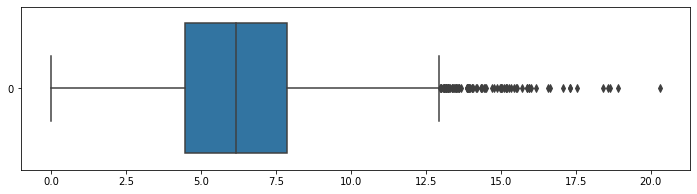


19 RespiratoryRate_Std


PatientGuid  IQR Method
0   02D318BB-B886-4D6F-BF98-8AF41F4023A8    7.791408
1   03C5142D-319A-4D46-B726-81196F08927E    8.815777
2   096A281C-7C60-4F6D-B0E5-195192752C54   13.326319
3   0CE143F6-78DE-4509-A101-6F774A4F5B6A   12.522404
4   0D8F4040-8FDD-48DB-A9AE-2D58ED649CFD    9.153303
5   1825C7BB-F958-4A35-B2B5-04300DC63C08    6.579855
6   1829802B-B60A-45CA-BAC6-AAF3CA751A78    7.500000
7   1B2F8598-B43E-4E05-9D7C-2283D06FB291   16.372719
8   1C029B51-D235-456A-B430-8B41743C4091   12.048007
9   1EA808B2-72A4-4C6E-A716-300B9C838915   10.024013
10  285C1EEA-A5F0-47EB-A9C4-5F04B5316A0C   10.557199
11  28728349-9F3A-4123-B46D-26B74B2C90F9    9.240741
12  2B56BD57-16E7-4338-8B46-DFE48D81A9FE    7.825081
13  2E1F9C9E-5B1B-4B84-9D9C-A0E17D067C8B    9.781424
14  2ECA343C-C7AC-4603-927A-6145C8029282    7.500131
15  2FEE2043-8E9F-400F-83A9-3D41785D6FA7    9.429487
16  33D5D160-645F-4687-9EA5-1F3301451F66    6.861051
17  4013D217-DFC8-490F-8057-3F0F72A6ED58   13.102897
18  47D9007D-2924-4A36-B8E0-F167B1EF9FE2   16.079349
19  4917B2B1-26BD-4380-A3AA-4EC3FE701C9E    6.637007
20  498421C5-3895-47FC-9312-0EF9B85ED820    7.425762
21  4FE539E7-B296-4A04-BB0B-CB7CDF33DA7A   10.334409
22  5178EB05-A86C-4D70-9057-91B005367722    7.924783
23  530720D7-65C6-4E24-89A9-DAE0E5259154    6.611400
24  55E40FED-B50C-4151-B0BC-EB4C0B074304    7.441699
25  56E010D8-519B-41D5-AC73-FEEA5638AECE   11.269648
26  59C20DDC-1020-4F4E-823D-997D3E4B46BD   10.007002
27  5BEA3241-A97D-4875-B105-8E5CBB2EDC2E    9.700420
28  666EE880-B534-4D30-8FDE-455A22B3EA88   14.320947
29  6A859054-D31A-42B4-8571-FD4EEBFC01A4   11.465643
30  796F8775-00C1-49E4-97C3-1CF192C822CB   13.880442
31  8209DAD2-7904-49F4-A36E-A707290428AA    7.947112
32  86ACBD72-1295-49B2-9A8B-5569D6BA53B9    7.196237
33  890C4C84-3D42-4F6F-BCE0-FBDCCD62A91A   15.542487
34  89206387-88F1-4FC9-9E7D-36BB69B033F8   13.164687
35  91E7555C-F7F6-49D7-AE12-54DA2243D196   17.192975
36  932AC943-6A4C-46FB-9453-2A3516252B03   25.742146
37  98CE4381-E463-4FE4-AFE8-3A0DB09D7F94    6.633250
38  9A5006E1-7CC6-42C0-9DB4-846402D76E3D    7.776377
39  9FAFAB5D-EF8D-4850-85D6-83E739EBACBA   29.444864
40  A31A150A-95E5-42BD-8153-757338C19225    7.611323
41  AD33A68A-41DC-4535-B42A-6666829E855B    9.531994
42  B45F41DB-E2A0-4167-8BDB-C5EF7509AB5D    7.554613
43  B80F8941-B6D2-49F8-9E94-1EE612EE2ED0   19.221572
44  C3C25819-BDFC-4B54-923C-3143A1A9AC27   11.594890
45  CD84E45F-F40A-4095-9439-395E0A5C0491   12.918399
46  FA3C6FDE-35A0-46DC-B284-9EA293C20D3C   19.715400
47  FC928FD9-8124-4095-B2C6-ECB7A4CC4862    8.065744

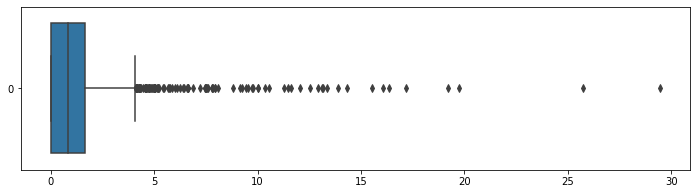


20 Temperature_Std


PatientGuid  IQR Method
0    006948F2-1118-4F56-A561-6A254EE357C6    2.308246
1    035BB97A-58CF-43E9-BA0D-BD7CC4D47CBC    3.098416
2    04308486-471F-4A73-B8A4-0AC389844178    4.989922
3    04621D5A-F0BC-49A3-83F1-9094EC0B0CB5    3.452566
4    05625020-4F92-49E3-8012-496E56CD03C5    2.605970
..                                    ...         ...
167  FB63CCCC-14C2-44A8-8B6E-DDA49E9C8376    2.819008
168  FDF79426-A2F5-43B0-81EF-0C7594DBEDEC    3.704830
169  FED06E2E-7123-4030-BB61-8B2FBAF149CF    8.475486
170  FEF753C0-9808-49F1-8E31-9FDA502B360A    2.202635
171  FF69D56A-B1C5-4F04-B458-5F58BB9E70E6    4.460967

[172 rows x 2 columns]

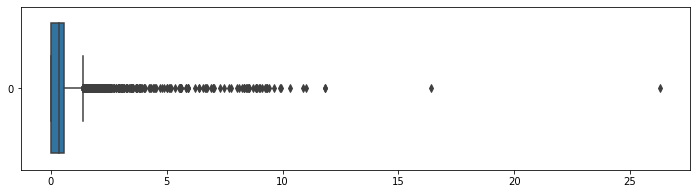


21 Height_Mean


PatientGuid  IQR Method
0   0149B9E1-5393-4CF3-94C7-E65D9976A713   75.000000
1   01CDC046-1F79-4667-B6FC-FDC4C928B709   76.000000
2   04387B84-9D12-4DFB-9050-8EC66F32E0CE   74.316121
3   0B9AA2E6-433B-4662-9A99-036B6D0E6411   76.000000
4   0E62C59D-CB51-4113-B40B-8499ECE0B74B   57.375000
5   131F5FFD-6E7D-47BD-A9E0-5E0D3062D4D6   56.222825
6   19500D12-8A8C-4547-8027-58AC391C9369   74.604205
7   2BB9CF9F-E682-454C-967D-0B3A7B037C56   74.865939
8   2BF9EAC9-89A0-4DE4-A0EF-8264A6F01048   74.464513
9   34BE1AB7-01D7-440D-81AB-8BE5EB2F48A4   54.000000
10  37A1469C-5A6B-4082-90B4-7184DAB311B4   56.750000
11  4F3E5352-7FC8-4B55-8BB2-282BDBCFD9BE   75.500000
12  60279539-9521-46B9-8DF4-81FBDA08ECF2   56.500000
13  66C54A31-03DF-4A88-8816-1DFD744144D1   75.000000
14  7C4A5E80-1A18-4AF6-B40C-903B18A439D2   75.000000
15  85B70A5B-D4FB-4E7A-BDA2-436B35D36B83   75.437500
16  86823458-241D-4C63-B540-E73A27CC56C2   75.000000
17  8A1A1BFD-B70C-460F-ABE8-2A99FAF8F5DC   77.062500
18  8B6688AB-E183-4C32-8FE6-29B9D8865687   57.179345
19  90BE2876-17D7-41A0-A407-19C954DA138F   75.500000
20  95A464CF-52E9-4212-84CF-356B6166F3A1   76.000000
21  96A6E3BA-BE7C-4A8F-8F29-CE77A6385FEA   75.935102
22  9851D320-CF9C-41B5-BB86-F1C05FD2F05D   57.053667
23  986C4DCC-8CDC-4109-A546-EB05B826AC4E   75.000000
24  98AACBC5-E5A3-4F4B-86E7-D651CDDF011B   75.000000
25  9B5B930B-ADDD-428E-8501-EA627CEF2097   77.000000
26  9C3CA08C-DADC-444E-87CD-555F3F1E1996   56.000000
27  9D31E8F1-A63D-42D5-8FD8-E5D5B5C4872D   76.000000
28  9F6E56A9-271B-4C62-A15C-D7F2A7B08D48   74.715523
29  A0A6BB1B-0C9B-404C-813C-2591603D2426   75.000000
30  A85B64C5-9454-4063-8403-C07C710D0A2D   56.000000
31  B3E488E0-DB0D-46B1-91B9-8AD12F235B81   75.149454
32  B615EC4F-FDAE-4268-9BCC-0FC43228F2DA   76.000000
33  C4F55D94-8A1C-4426-AF1E-712946149679   74.714286
34  C85A8A29-9C32-4B1A-B97A-40DFA987EB09   75.750000
35  CC2BB1D3-1532-4F7C-9DD1-85BB684E4572   75.416667
36  D010AB5E-FF65-4EC8-8349-6CF5E496513F   75.666667
37  D88797E7-3C6F-4C6F-BE17-2364F944DE1C   75.000000
38  E4B3193E-02BC-45A5-A1E3-353DD2AAA9AC   75.000000
39  E6B1BF77-AC51-4F08-883F-D6CF5359D43C   76.437500
40  E745EC2A-2F04-41F7-A446-287CFE2B92BE   74.583333
41  E843942B-5EED-44F8-8198-D5D3DA1EF8A3   55.264706
42  F6F90681-FDFA-47B5-BA46-189F1D29AD14   55.500000

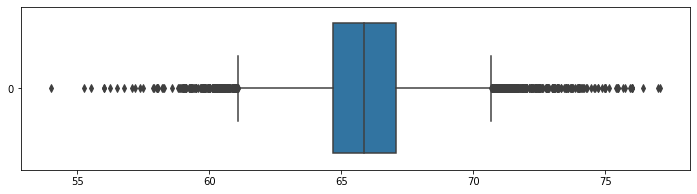


22 Weight_Mean


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

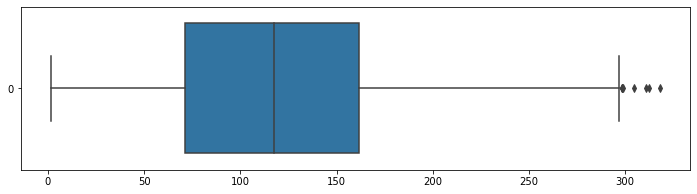


23 BMI_Mean


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

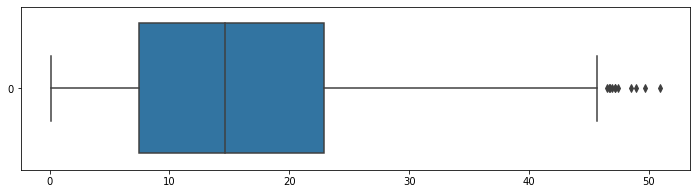


24 SystolicBP_Mean


PatientGuid  IQR Method
0   00AB891C-67A0-4528-9EC2-50DD7AB368AB   81.000000
1   00D69218-4084-47AB-A605-2CD75F5A89EE  175.500000
2   06AAB37C-22D5-4B35-B54C-1618C6E5AE24  167.636503
3   078EFB82-9958-4CEC-9E9D-216C742FF7BE  184.747614
4   09BAFC37-8001-401D-A6A1-455284A7BC02  166.182131
5   0D677D11-005B-4E39-BBA9-674371F32771  172.083333
6   10D2EDD4-DFB2-44F6-B73F-0351739F4A03  168.909508
7   20D51030-10EF-4DA0-B872-2125A9565EE6  198.000000
8   2A56A9DE-2AA9-44DC-B7DC-67950A03CE34   83.000000
9   3908BFDF-E1EC-4F2A-82EF-C5C262F39ADE  167.000000
10  3A556946-ABBA-4927-A834-7FEAFE69118B  176.187386
11  3A822D7B-A7C2-4EC1-92B8-CD1A35C031BE  177.195705
12  3D61E389-64CE-48DC-BEC0-5EE371006563  172.000000
13  46B8AB7D-052E-4C69-B950-3B74156878BF  177.500000
14  54320C1C-89A0-46F5-91DA-3AC4C58F6331  171.491409
15  552DDF29-3251-43C7-BBF6-131365E96428  166.859731
16  62D80C50-CAD3-4F68-AE18-71FFA8E0084C  172.389789
17  685FCC18-20D8-49BA-A63D-414574C7867E  168.857143
18  760436A9-E94B-4FA0-803C-F360EAF82F47  182.715235
19  7D8D67D6-59C8-446C-9A1E-50BCC5E53E2F  177.363733
20  7FA40718-DE15-4EAC-ABF0-3812D36DC418  180.500000
21  8BEB5D10-99A9-4FFF-B6EE-064C96EC2921  169.454754
22  94B82185-A299-4765-A3B2-962802624AC1  170.400000
23  9716AECC-8887-4DE4-950D-983CA742460E  169.181818
24  A08C57E2-753C-4A06-8CB0-53FB309E656C  183.429866
25  AD88069E-429A-4455-ABEC-AE967625F65C  166.857143
26  BCE3BB64-D61B-4F98-9A53-40EA70983988  173.576174
27  C13C7261-7096-48E4-B291-4460200A6375  172.500000
28  C71E74E6-9118-4463-9F8B-9952DDA6FE02  169.500000
29  D0084121-E4AA-4263-A652-87DAD85D4B1E  170.333333
30  D14D8109-F99D-4679-9193-F4A0CC6179D7  166.556297
31  D1B7C483-5725-44A6-95A4-4DC290F1B53E  177.182131
32  D6F55600-FD8A-4438-AC04-205D4CF0618A  187.384615
33  E03F262B-4CD2-43C2-B63A-370A127755A0  166.666667
34  E94B77A2-FF2A-47BC-ACA3-1B8DA930F6FE  166.675503
35  F2C07C49-7A9B-428C-BB1F-B41EC74C1A5A  185.285714

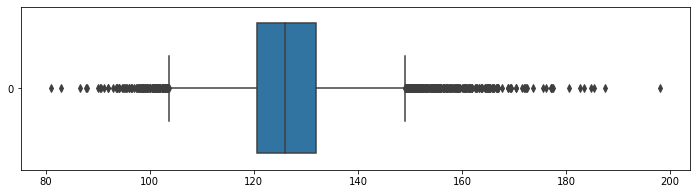


25 DiastolicBP_Mean


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

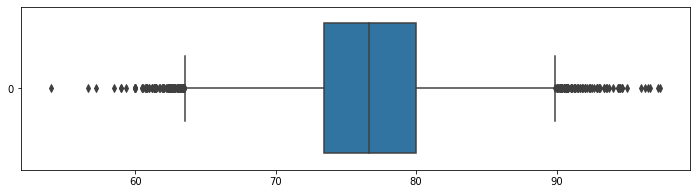


26 RespiratoryRate_Mean


PatientGuid  IQR Method
0    003CEE1F-5BF5-4171-9284-F5464EC12D41   11.500000
1    007CB9B1-F4DE-44FA-9CEC-916C1235988C   21.333333
2    0119DD3F-0AE4-468A-88FE-D381ABCE75B9   12.409585
3    01A85D79-561C-4EDB-81FF-DCDE0CB35AE9   19.409585
4    02B33243-B52E-4579-9338-D7795C9A8711   20.000000
..                                    ...         ...
384  FBF3DE89-BC83-4407-9DBE-7B29C13A0ACB   19.478756
385  FC664FB6-4D5D-45BC-B15F-F1552E6C1E15   19.820725
386  FC81666F-A9CD-4496-9090-DD4C72125673   20.000000
387  FD553669-5855-446B-98A4-F6AB9E8EF4B5   13.188165
388  FE77FBC0-65C0-433A-A21E-7E3101590651   20.000000

[389 rows x 2 columns]

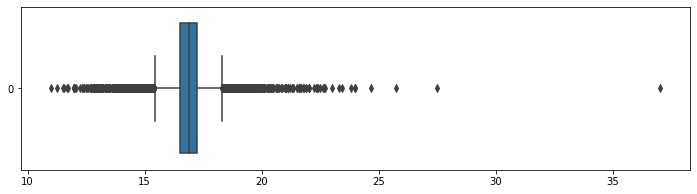


27 Temperature_Mean


PatientGuid  IQR Method
0    006948F2-1118-4F56-A561-6A254EE357C6   98.560000
1    0094395F-F853-4689-85D3-4AE5C2EA3EC0   96.620969
2    00B80F57-1B0B-4409-BF26-549A29A6B5C0   98.775000
3    0149B9E1-5393-4CF3-94C7-E65D9976A713   96.550000
4    01A85D79-561C-4EDB-81FF-DCDE0CB35AE9   98.700000
..                                    ...         ...
892  FF69D56A-B1C5-4F04-B458-5F58BB9E70E6   96.921109
893  FF8011CC-ABB1-4E70-8F25-FEB75F33396F   98.500000
894  FF9B4F39-5A81-4150-9E2C-550BDE418FFB   98.666333
895  FFB0830F-B789-4B37-A43C-6E2A02368F5E   98.782665
896  FFEF293B-6147-47F0-8F0B-76180C124205   96.750000

[897 rows x 2 columns]

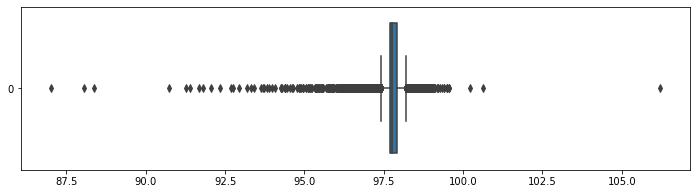


28 BMI_Change


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

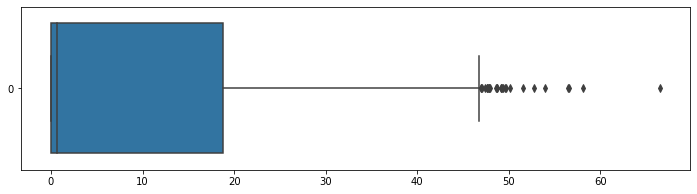


29 DiastolicBP_Change


PatientGuid  IQR Method
0  103E8040-4EC0-4E9B-BEFC-588C9C64AD8F        33.0
1  25253032-39C1-4EAC-BE54-A154A68F6766        33.0
2  6402E51B-FFB7-4377-B178-3AFB5B4CB356        38.0
3  64067629-9644-4BEE-B42D-01E6B5DA6C36        36.0
4  8725703B-F691-4A15-8F5A-2B7E584CE3B7        40.0
5  93D1E8C3-FA99-4717-ADAA-C1003BD24479        33.0
6  96E3A3BC-9378-4A58-A115-AD5246510232        40.0
7  CB14C861-40EF-4B10-99E1-F9AE4B874D94        36.0
8  F410AFCA-8E3C-4BB1-924C-F264C2469C43        38.0
9  F88A2D66-01C2-4D49-98AD-851B63DC385A        39.0

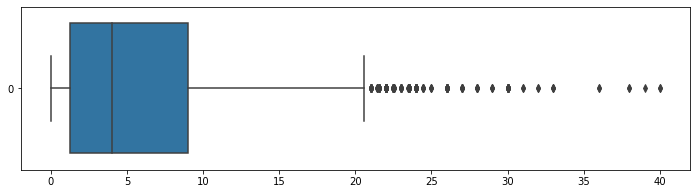


30 Height_Change


PatientGuid  IQR Method
0    01058702-90B3-4AEA-B2DB-80936FD66216    6.103274
1    0254DF22-EA5C-49CD-B425-A08514C75149    7.103274
2    02631AC9-6413-44F0-8393-53B2C4092103    6.103274
3    035B92F2-92DC-4F6E-90BF-80479138DB90    5.896726
4    03D3152A-9569-4547-B45F-9F5B7BC46E6A    5.896726
..                                    ...         ...
505  FDD1E15E-F500-4898-BAC5-7486F9FC9917    6.103274
506  FEFE858D-0204-4B1C-A862-9B3DA9063E22    6.103274
507  FFA25126-98E0-46E2-9B80-FBEEEA1C7D71    7.896726
508  FFB51256-FBE9-4825-9172-09789E757770    7.103274
509  FFC9E47E-6971-4210-8370-3FB01BB1B47F    5.896726

[510 rows x 2 columns]

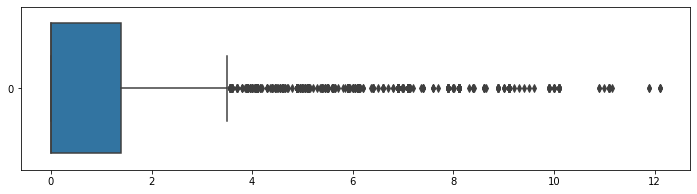


31 RespiratoryRate_Change


PatientGuid  IQR Method
0    0101A85A-9D25-48D7-A11C-498AC5E4CE03    4.915026
1    01269935-4EE6-4DB6-923B-4A086BD62833    5.084974
2    01B5181A-E12B-4960-8761-51D655B5D060    7.084974
3    02D318BB-B886-4D6F-BF98-8AF41F4023A8   19.084974
4    02DC281D-D37A-429C-A6BD-1D26348704DA    4.915026
..                                    ...         ...
361  FA3F4BFD-54C3-4305-B4AD-C3E6BD1F5FBC    4.915026
362  FB896760-A419-4298-A37D-5C6913672719    4.915026
363  FBEC9262-943F-45F8-B691-B0E904182723    4.915026
364  FBF3DE89-BC83-4407-9DBE-7B29C13A0ACB   16.000000
365  FF574B32-F375-411E-B7C4-99C6034A187A    4.915026

[366 rows x 2 columns]

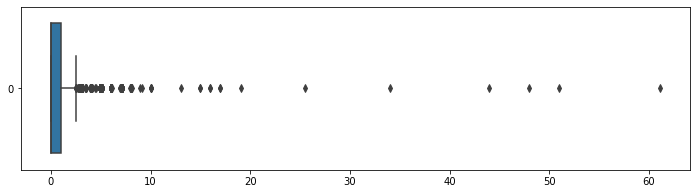


32 SystolicBP_Change


PatientGuid  IQR Method
0   031BF1C4-96FE-4775-8D36-717AB81CA3FC   56.000000
1   03F6F07A-61EF-434C-9036-8338C6963735   57.864262
2   047FD84D-8B1C-4DD3-AEFE-CCAD275CCF91   53.271477
3   078EFB82-9958-4CEC-9E9D-216C742FF7BE   81.271477
4   0D098927-DB14-4D3E-9174-6961F9AEAB5A   84.000000
..                                   ...         ...
58  E03F262B-4CD2-43C2-B63A-370A127755A0   56.000000
59  E2BC6FA8-461E-4BC5-8B2E-DEFA58C737E7   58.271477
60  EC9C9906-C3C1-4A36-A818-1F4B903F1A68   52.271477
61  F53B4C04-030D-4297-99F4-FC92F02919B1   64.000000
62  F86D1ED0-AE76-4486-BDF4-6A0A0E15A87D   54.000000

[63 rows x 2 columns]

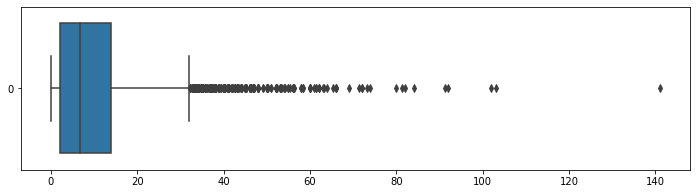


33 Temperature_Change


PatientGuid  IQR Method
0    006948F2-1118-4F56-A561-6A254EE357C6    5.600000
1    02D318BB-B886-4D6F-BF98-8AF41F4023A8    4.665331
2    07936C2D-4DB9-46D3-A928-0AB9D38FA0E6    2.700000
3    0885F47B-219A-4E00-9F46-9703F7BA9293    2.100000
4    0A169B9B-709A-4499-8310-5248CFE92475    2.765331
..                                    ...         ...
187  FB076249-7115-476B-8E69-8834C059DD51    5.300000
188  FDCF552C-D0A5-4EA9-9E2E-48D253C8D353    2.734669
189  FE18FB04-F8D3-4285-9A0F-F47554C6ADAF    3.734669
190  FEF753C0-9808-49F1-8E31-9FDA502B360A    3.400000
191  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2    4.400000

[192 rows x 2 columns]

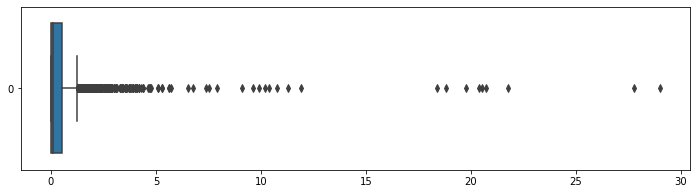


34 Weight_Change


PatientGuid  IQR Method
0  3FA7FB3D-1998-434B-876F-A68DB154BC8D     451.948
1  C85A8A29-9C32-4B1A-B97A-40DFA987EB09     445.000

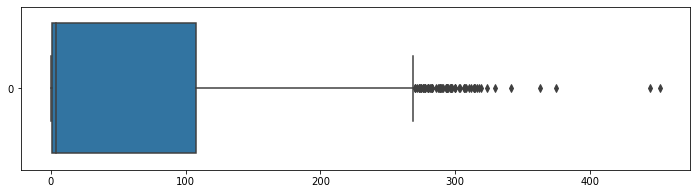


35 Age


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

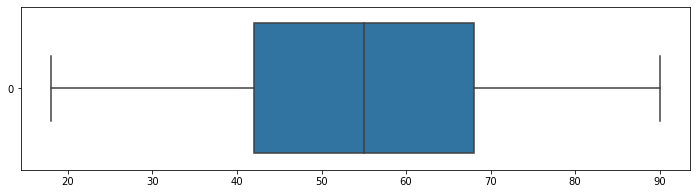


36 Icd9_001-139


PatientGuid  IQR Method
0     0029BBC8-7C22-4444-9F44-87BEF05FE033         2.0
1     00607D4B-5F8F-4026-AF20-85A961B4B904         1.0
2     006948F2-1118-4F56-A561-6A254EE357C6         2.0
3     006A9198-1BB4-42B9-A864-210BF14AD445         1.0
4     006E3A23-F786-4ED2-BE70-D91D23BA56EA         2.0
...                                    ...         ...
2049  FF64E901-267B-4095-B9D7-880BEA72B44B         1.0
2050  FF8011CC-ABB1-4E70-8F25-FEB75F33396F         1.0
2051  FFA25126-98E0-46E2-9B80-FBEEEA1C7D71         2.0
2052  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4         1.0
2053  FFEF293B-6147-47F0-8F0B-76180C124205         1.0

[2054 rows x 2 columns]

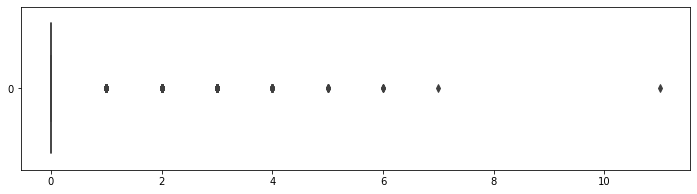


37 Icd9_140-239


PatientGuid  IQR Method
0    009FFF75-B641-4EFD-87EB-53BAC29906F5         1.0
1    00B7C61A-82E5-42E1-B9C0-6B39C5BC552F         1.0
2    00F6133C-EE95-4036-A960-E6AAE330624B         1.0
3    00FA044F-4B86-4966-8BB3-253BB60E6E58         1.0
4    0132BC96-2D06-4B01-ACAF-51027BDFCFC8         1.0
..                                    ...         ...
772  FE1F52BF-3E1E-4910-9848-A45DF554FDEB         1.0
773  FF0745C3-4271-4F69-9FD4-426FC8704368         2.0
774  FF467B55-9E50-4073-AB7F-B9919DAA3CB7         1.0
775  FF99C22E-E5B5-442A-B0B0-73747BD2F04E         1.0
776  FF9B4F39-5A81-4150-9E2C-550BDE418FFB         1.0

[777 rows x 2 columns]

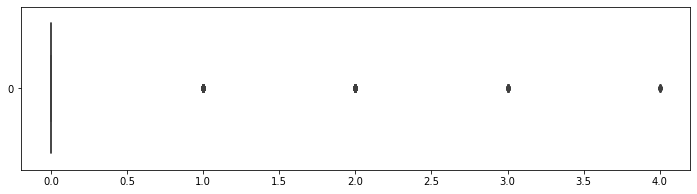


38 Icd9_240-279


PatientGuid  IQR Method
0  1FC93340-0770-4C5D-ABB0-71E52BB7F75B        10.0
1  2AD60EF1-2091-435D-926E-69DAA5C01030         9.0
2  2FAE265A-C425-41F0-96CE-3A0CCB26655F         9.0
3  52965E52-26E6-4F8C-913F-0D7382AF2581         9.0
4  7915771D-6FD5-4E58-9A66-C2B71488DFB9         9.0
5  D08E31D0-86AE-49C7-ABB4-62DDE83EFBFF        10.0
6  DD6160EB-75E7-4740-ADCE-B8BD187DDE22         9.0

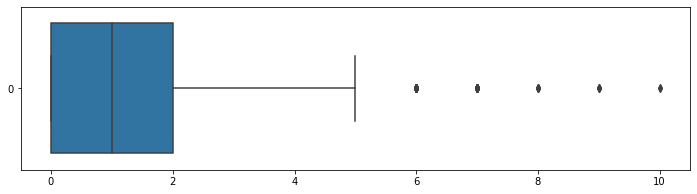


39 Icd9_280-289


PatientGuid  IQR Method
0    006E3A23-F786-4ED2-BE70-D91D23BA56EA         1.0
1    0094395F-F853-4689-85D3-4AE5C2EA3EC0         1.0
2    00B1FB6D-84EA-4ED9-A0CC-5A14FC2989D2         1.0
3    01058702-90B3-4AEA-B2DB-80936FD66216         1.0
4    0132BC96-2D06-4B01-ACAF-51027BDFCFC8         1.0
..                                    ...         ...
904  FE888BA9-3897-4E03-BF31-B9338AD8B605         1.0
905  FF391C47-2E9A-4F83-858D-A0EA50B19674         2.0
906  FF618A7A-92FE-4651-8646-D43E81E7A949         1.0
907  FF827F18-B26E-4B6A-B03D-1BE5F6768B88         1.0
908  FFAF77EC-1129-4CAB-B55F-6AC63E9227F4         1.0

[909 rows x 2 columns]

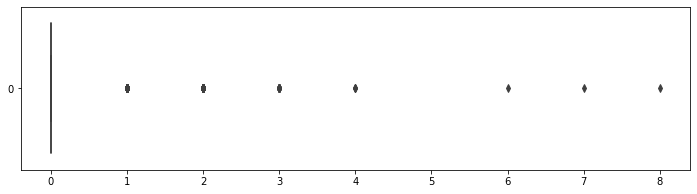


40 Icd9_290-319


PatientGuid  IQR Method
0    034555D8-4351-4675-BCB5-2B09748B9AC5        11.0
1    045CDC05-0036-4677-A979-CA6D18DEF60B         5.0
2    0589289A-6C1E-4F8B-A56E-A4B938580401         6.0
3    06E00F6F-FC5C-4AFC-B1F1-8F99A5CE82EC         8.0
4    086407C2-AB35-48E4-B16A-B3DF78AE5585         6.0
..                                    ...         ...
104  F86D1ED0-AE76-4486-BDF4-6A0A0E15A87D         5.0
105  F96F3DB5-EAC8-4238-85C6-01094598D1F5         6.0
106  FAC8D999-3F05-4A91-BD2D-019A3C3DA248         6.0
107  FD79D5D0-A09F-40B6-956A-528BA367866E         5.0
108  FF618A7A-92FE-4651-8646-D43E81E7A949         5.0

[109 rows x 2 columns]

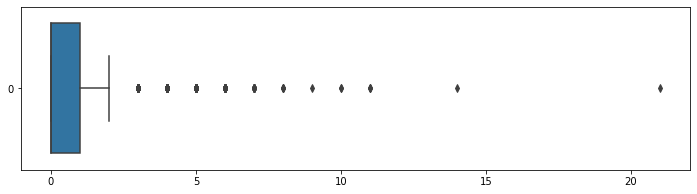


41 Icd9_320-359


PatientGuid  IQR Method
0     0029BBC8-7C22-4444-9F44-87BEF05FE033         2.0
1     004382BD-E31F-4091-8DE5-E86A59D70C2D         1.0
2     0066553F-732C-4654-99AA-68B26819DFD8         1.0
3     006F8D62-651E-4ADD-B630-8F7DB667C148         1.0
4     008A55FD-0735-47EC-A2FA-20043D1423C2         1.0
...                                    ...         ...
2038  FF99C22E-E5B5-442A-B0B0-73747BD2F04E         1.0
2039  FF9B4F39-5A81-4150-9E2C-550BDE418FFB         1.0
2040  FFB6EAD7-1BFB-4EDD-BC30-67CD1E214474         1.0
2041  FFEF293B-6147-47F0-8F0B-76180C124205         1.0
2042  FFF5C634-1CF7-40D5-BDF1-4FA2D62D9C63         1.0

[2043 rows x 2 columns]

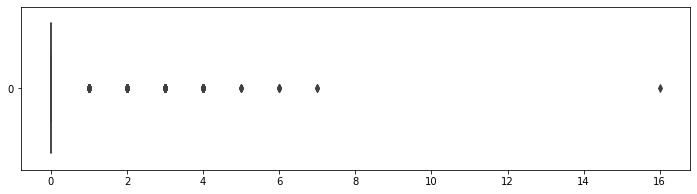


42 Icd9_360-389


PatientGuid  IQR Method
0     000B4862-7CE7-4EC5-8043-A97FCD74BD78         1.0
1     004EA6A7-6159-4D70-B06A-C0391D8623BD         1.0
2     005F61C9-E537-4AD2-B39C-37F25891F33A         1.0
3     0063B34F-C2C4-423A-A144-E51F7149253A         1.0
4     0094395F-F853-4689-85D3-4AE5C2EA3EC0         1.0
...                                    ...         ...
2022  FF574B32-F375-411E-B7C4-99C6034A187A         1.0
2023  FF64E901-267B-4095-B9D7-880BEA72B44B         1.0
2024  FF827F18-B26E-4B6A-B03D-1BE5F6768B88         1.0
2025  FF9BA1EB-03AB-47FE-B110-B559D8E0835B         1.0
2026  FFCCEB55-7FCA-4CCD-A035-9672674F2353         2.0

[2027 rows x 2 columns]

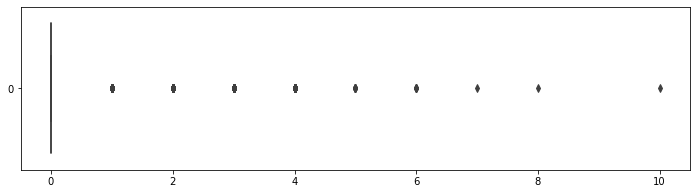


43 Icd9_390-459


PatientGuid  IQR Method
0    00DFEA15-6AE7-4FF3-A7D0-FEF911632377         7.0
1    055142E2-8249-48AF-B6B2-BF97980B9442         5.0
2    06FF3F02-0804-44C5-877D-5D3D9FACDD8C         5.0
3    07193BC3-F2F6-45F0-A26B-DE51C3F5D102         6.0
4    072267AD-EDF4-452E-9516-23A789744BA6         9.0
..                                    ...         ...
187  F5A3CCC6-EB10-45B0-B79C-EDC2E5A8DE53         6.0
188  F5E49D7A-FD35-4498-9A9C-B3771758E5A9         5.0
189  F93FBC08-847B-4C8E-BEA5-12AAA70D20F8         5.0
190  F99BAC85-04C9-4EFD-8394-12DBA8FF3322         5.0
191  FC106A57-FBEB-4913-9130-50E4375277A0         8.0

[192 rows x 2 columns]

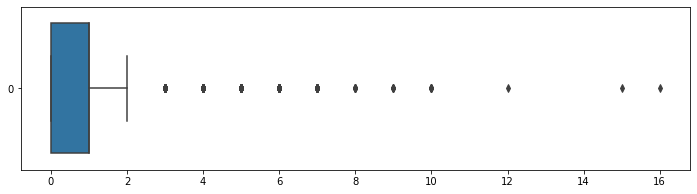


44 Icd9_460-519


PatientGuid  IQR Method
0   0C113990-AC0E-458C-9EDA-6247574AB49C         9.0
1   0D2F30BF-AB70-4EF5-95D8-14CC6EA92491        15.0
2   1C029B51-D235-456A-B430-8B41743C4091         9.0
3   4E69B386-48FC-4682-B021-ADA28DF1DDB5         9.0
4   6182D886-D7C3-436B-9B1E-39BD490D73F6        10.0
5   628B2FA5-2484-4CCC-8FBE-55E6551B1A4D         9.0
6   739BF737-F710-4817-BAA7-BB8B123907A2         9.0
7   8CFF18D7-6A06-4B7F-9127-59CB68FFC523         9.0
8   90074236-71F4-4194-8B5F-FC3EB1EECE11        10.0
9   95022F47-D410-4FF7-907B-757200936F57        12.0
10  9C52601E-5670-41DD-BC96-6D652CD1792C        12.0
11  B7E2E8E3-F32C-45BA-AE8E-979824063580         9.0
12  B88CF67F-5519-4CC2-94D0-58F50632C2D0        11.0
13  C000F888-2318-425D-A923-82FCB0BABBDD        15.0
14  C08FB926-833C-4FC3-8EBA-2439A9DB0C13        10.0
15  C8C2D94B-B73C-4EB3-930D-4867AD7F59E9         9.0
16  F3FFA232-1292-4200-99AB-33D1318ABF5D         9.0
17  F764BC86-0CFA-4661-8D84-FFFA8E2B6080        17.0
18  FE77FBC0-65C0-433A-A21E-7E3101590651        10.0

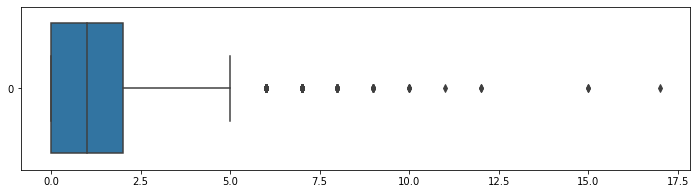


45 Icd9_520-579


PatientGuid  IQR Method
0   0094395F-F853-4689-85D3-4AE5C2EA3EC0         6.0
1   0814A591-0A14-49FD-A8E2-A5080CCC4585         6.0
2   186B7F0D-5FCC-437D-B8B5-B4B1871EA82E         5.0
3   2FAE265A-C425-41F0-96CE-3A0CCB26655F         6.0
4   2FB7F804-88D6-4B3B-BDEA-50E74EBEFAF5         6.0
5   30ED0935-3E4B-4401-9F9C-6EAE871D0625         5.0
6   4895D13C-50CD-4824-89B2-A3E7B0C3C1D2         5.0
7   52485ACC-93CE-4F87-BE50-67CF42AB6096         6.0
8   5EA18A14-293D-4455-AE36-DE315FC2B03E         6.0
9   614FDE5C-C98A-419E-A983-74A059619427         5.0
10  6AA24A92-2CAA-414C-B975-41EC65F86F20         6.0
11  6DFEA5EE-E7E1-4B7D-BC31-A0763EFDCAA7         5.0
12  6F0661DF-EE4C-45A5-9322-1E9C68552E5B         5.0
13  7B130739-C84E-472E-9662-4E4A3BF45EB9         5.0
14  7F92F1C2-0224-4E7A-9AFB-CF0C9C7E340A         6.0
15  83345D87-4A58-4296-A301-E39DCC4C4564         5.0
16  876A6456-74FE-4659-A440-390DD1D0A44F         6.0
17  89206387-88F1-4FC9-9E7D-36BB69B033F8         5.0
18  98156A05-9A0C-45F2-8D36-53664239F07E         5.0
19  993E5977-F712-46EF-A9D9-1157A0E401A7         5.0
20  9C112790-E60E-4DD4-80EE-A4007514913F         8.0
21  A5A76828-F61D-4F60-A327-D7DFEAE66B5B         7.0
22  ABC20007-4469-47BA-A8F4-3CCD5B8A0481         6.0
23  B612358D-F164-4CCF-BAA3-687CD19D3FA8         6.0
24  B9E6F517-65CA-41F3-A093-89C34DCAE0D0         5.0
25  C08FB926-833C-4FC3-8EBA-2439A9DB0C13         6.0
26  C58E5059-BF1E-4500-A32F-6B99A3F9530B         7.0
27  CA49C279-591F-4A13-86FE-FF9C16A4331C         7.0
28  DD15A857-7F7F-40A5-95C6-F9C415FE8EE7         7.0
29  E25647F9-E225-4040-BCF5-CE1303A7D1C1         7.0
30  F05F327D-4FD3-4960-B417-AFF74DA54C22         5.0
31  F127C5F8-7893-4B20-93B3-5184DD53FAAB         7.0
32  F1450EF6-9807-4507-A004-CDAE7D9DCB05         5.0
33  F764BC86-0CFA-4661-8D84-FFFA8E2B6080         9.0
34  FE68C32E-55AB-4C25-AAA9-CE62A3DC6975         6.0
35  FF618A7A-92FE-4651-8646-D43E81E7A949         8.0

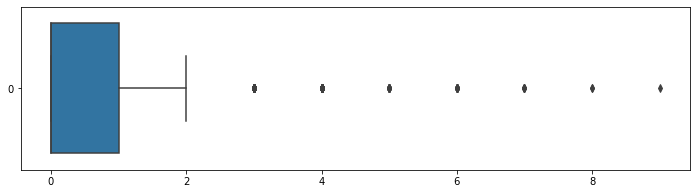


46 Icd9_580-629


PatientGuid  IQR Method
0   0DBFDED7-6A6E-43F8-AFEB-E25816B816C1         5.0
1   0E86556C-EA25-483A-9EAF-E86152FCF684         5.0
2   103384EE-2F6C-44D8-B7F2-B553A7B3C98A        17.0
3   1040DAEC-3ED4-4D36-BAD9-0A07C753F54D         5.0
4   1A6DDD7C-48D4-4A69-92FD-325FCDB21437         5.0
..                                   ...         ...
61  F90B4F51-7C77-4EAF-8A82-40B6A3619880         7.0
62  F92892FF-2CCB-4022-821C-7F6D7EBAA451         9.0
63  F93476FC-D6D3-4BE0-B396-D8994C4E1D84         5.0
64  F9DB519A-2929-4DE3-AFD2-98798CB19637         6.0
65  FB5F0578-B696-422F-98CA-750A301698AB         7.0

[66 rows x 2 columns]

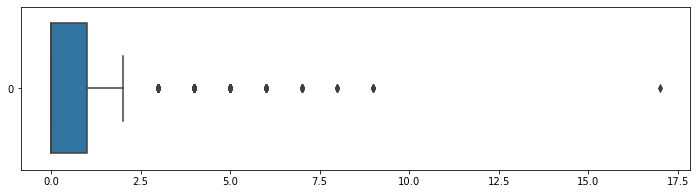


47 Icd9_630-679


PatientGuid  IQR Method
0    00607D4B-5F8F-4026-AF20-85A961B4B904         4.0
1    024BD07F-7629-4242-A531-D01EC7F76C53         1.0
2    0F95066E-DD9C-4355-91D1-C52C58F8BD14         2.0
3    10250D32-3A08-4065-995C-3FC649939086         1.0
4    10CC7823-E79C-4BE8-A444-7F4D5AB4568D         3.0
..                                    ...         ...
101  F5CAD516-1113-4277-B985-F212D1548A95         1.0
102  F92892FF-2CCB-4022-821C-7F6D7EBAA451         3.0
103  FB110E44-1A10-44C0-8D96-9C9E417CF2DE         1.0
104  FD72179C-5253-4B51-9338-0C82BA11CDA6         1.0
105  FE35D2CE-C7F7-4113-8D9A-449F22316FC6         2.0

[106 rows x 2 columns]

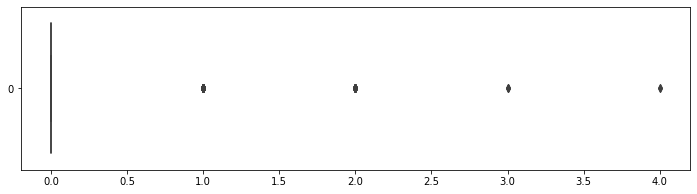


48 Icd9_680-709


PatientGuid  IQR Method
0     0005D9BD-0247-4F02-B7EE-7C1B44825FA1         2.0
1     00110ABC-DAB9-49E3-A1C8-88BBF8D58109         1.0
2     0029BBC8-7C22-4444-9F44-87BEF05FE033         1.0
3     003CEE1F-5BF5-4171-9284-F5464EC12D41         1.0
4     004AACFF-5D67-49B3-81F4-883A72A2AB97         3.0
...                                    ...         ...
2327  FF5DB6F4-3008-45DC-BA65-21675EE0DFB2         1.0
2328  FF8011CC-ABB1-4E70-8F25-FEB75F33396F         1.0
2329  FF827F18-B26E-4B6A-B03D-1BE5F6768B88         3.0
2330  FFB6EAD7-1BFB-4EDD-BC30-67CD1E214474         1.0
2331  FFCD70A8-72FC-4F06-AC19-D9962B2CA95E         1.0

[2332 rows x 2 columns]

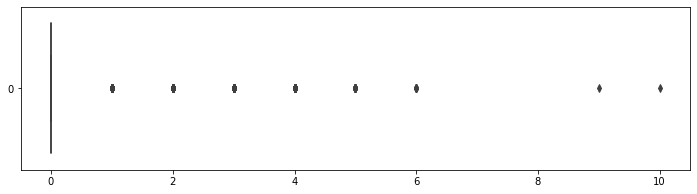


49 Icd9_710-739


PatientGuid  IQR Method
0   087E57D1-19C9-4484-94DC-FAF3D9535270        11.0
1   0D2F30BF-AB70-4EF5-95D8-14CC6EA92491        12.0
2   0DEE2EC2-410A-4C85-A9B9-E748618E9940         9.0
3   15005EAC-5B0D-42EF-A489-E497B3083933        10.0
4   1B2F8598-B43E-4E05-9D7C-2283D06FB291        33.0
5   1B77E7A1-2AB9-4C06-BC0E-EBAADB9729BA         9.0
6   23597C9E-C6A3-469D-BC9F-589F4B9E338C         9.0
7   25D3FD87-5835-45C7-9786-753609F9C9B3        15.0
8   2D939754-98D8-4A5D-98E7-7EDC765CE9ED        12.0
9   34E76C02-936A-4783-B997-EFB7EC80CA59        10.0
10  35A3A566-1928-4AC7-A3B9-3AACDE087EDA        15.0
11  36D7D2C3-D1B8-48C2-9791-707EA6E39549        11.0
12  39059E4A-778A-4685-8376-E426D7DEEC59        10.0
13  4917B3EE-FC57-4794-BCD0-2969D3E92EAA        14.0
14  493A0922-F726-4F71-9EE8-90E602F15D38        10.0
15  49CA3B01-095A-4822-8AEE-2A737D17675F         9.0
16  4F11DE19-5A62-46F2-9152-E8A8AC5359FC        13.0
17  4FA564B4-E9E9-4C8D-AC1B-A4CF32A73E48        10.0
18  614FDE5C-C98A-419E-A983-74A059619427        12.0
19  61F8DE80-0B5A-4999-871D-B462D2CF96A4        11.0
20  79DB16F0-7263-4E19-8933-48398190C3C0         9.0
21  86DF9B2E-1861-42E5-BE45-6E9EB15C6926        14.0
22  8B646975-9275-4ECE-9EEF-6E2D088A68FE        14.0
23  8FF5C02A-FC71-4530-A10D-2C0232E41376         9.0
24  91252511-0B5A-439A-B9C2-940D37DF48ED        10.0
25  92A29A83-1C34-4D7D-BD7F-54780EEE40BA         9.0
26  9597BBBB-D317-4A9A-A97F-10ECA7577491        10.0
27  963E58FB-EF50-4759-AD01-815FB708694B        11.0
28  A9E58C5A-0253-4C3F-A0C6-E4CE52738985         9.0
29  B27DD8F2-63BA-491D-A288-7F92E7B1348F        16.0
30  C45D6B6E-F47A-40B2-9A6B-B617153222B7        16.0
31  C8C2D94B-B73C-4EB3-930D-4867AD7F59E9         9.0
32  CA507F79-46F1-4BE5-B789-C19AACADB40D        13.0
33  D730B70A-7FAF-48FA-A923-7E9CC0ACA5C9         9.0
34  D7F13E0F-AD34-4B58-9500-0BB94433E043         9.0
35  D80EF4B2-A73F-4BBA-A2A5-3FD905D9215E        11.0
36  DF5CEAF4-188B-41B7-BDE1-E03E8AE670F0         9.0
37  E4C9B967-FB44-4D6A-B44C-0249EB90BD50         9.0
38  E66A4EE6-A006-4F8E-85E7-2A35F2AD7F62         9.0
39  EF5F93F8-8C36-406D-8AA8-5AD65A8D842D        17.0
40  F127C5F8-7893-4B20-93B3-5184DD53FAAB        14.0
41  F2C438DE-3D56-4B3C-B75F-7D51A5B33A3A         9.0
42  FE68C32E-55AB-4C25-AAA9-CE62A3DC6975         9.0

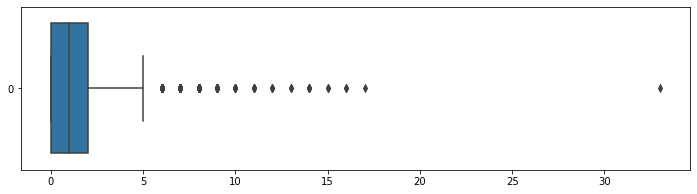


50 Icd9_740-759


PatientGuid  IQR Method
0    0119DD3F-0AE4-468A-88FE-D381ABCE75B9         1.0
1    019E6474-ADB6-49C9-BD29-716141A0B24C         1.0
2    02FF617A-8217-4DD0-93AB-DA317B235C27         1.0
3    055142E2-8249-48AF-B6B2-BF97980B9442         1.0
4    05589C4E-3D60-47E0-8928-00E3E081E1C8         1.0
..                                    ...         ...
172  F77CE7CC-7448-4F82-A1D5-51D2921B89A1         1.0
173  F94D8625-F307-43A6-8601-54030DD36130         1.0
174  FAC8D999-3F05-4A91-BD2D-019A3C3DA248         1.0
175  FAE325DA-EA04-4486-95E9-1B877BBF6C07         1.0
176  FB4AA8FD-8662-456D-B849-E5E9EA3AFD0A         1.0

[177 rows x 2 columns]

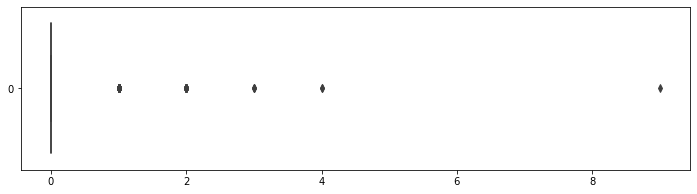


51 Icd9_760-779


PatientGuid  IQR Method
0  06BD76A2-370A-4D1D-83C6-C0AF43851D26         1.0
1  084FED70-312C-4EEC-8787-98BF93E06082         1.0
2  10A0E929-ACAF-41C6-8CEE-6964278C1E61         1.0
3  30B6531F-A780-4939-98C4-57507BD77D5D         1.0
4  5B3E5CD0-7ED4-40CD-A954-9E9672578E91         1.0
5  A6FFC0EE-63C2-4491-977E-BA2005B29FEF         1.0
6  B7BDBF13-9329-442E-8D5A-2AF4FB9361D9         2.0
7  BD90E724-ABCB-4E1B-993A-3617117711F6         2.0
8  DBEC07AF-2327-44C2-ABAA-FFBB3B28CFF9         1.0
9  FDDD271B-3EEB-42B8-B186-A2370493AB41         1.0

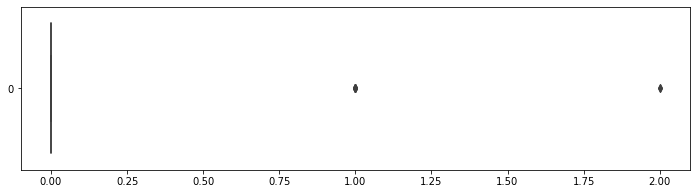


52 Icd9_780-799


PatientGuid  IQR Method
0   0844EA2D-08BD-4F7C-87CF-C4D594C8EF27         9.0
1   0B5BCD43-1065-4FEC-B2CC-C7A4225C2BF6        11.0
2   0C113990-AC0E-458C-9EDA-6247574AB49C         9.0
3   0CC39D02-9DD9-45B9-B492-93996EC07016        12.0
4   0D3013FF-5681-4827-972E-65011F8654AA        10.0
..                                   ...         ...
70  F764BC86-0CFA-4661-8D84-FFFA8E2B6080        15.0
71  F86D1ED0-AE76-4486-BDF4-6A0A0E15A87D        15.0
72  F90B4F51-7C77-4EAF-8A82-40B6A3619880        10.0
73  FB5F0578-B696-422F-98CA-750A301698AB         9.0
74  FF827F18-B26E-4B6A-B03D-1BE5F6768B88        12.0

[75 rows x 2 columns]

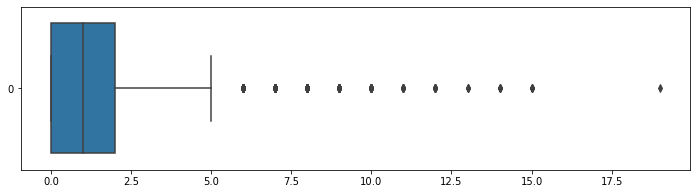


53 Icd9_800-899


PatientGuid  IQR Method
0     00110ABC-DAB9-49E3-A1C8-88BBF8D58109         2.0
1     005F61C9-E537-4AD2-B39C-37F25891F33A         2.0
2     008383B8-BF24-4DBB-A848-A377A4899599         1.0
3     0118F991-1988-4CDF-B2B7-94B66F74E694         1.0
4     0153C556-09DF-428C-BB87-279C07DBD9BF         1.0
...                                    ...         ...
1042  FEFBEB8A-083D-4133-A415-2801AB1190E5         1.0
1043  FF467B55-9E50-4073-AB7F-B9919DAA3CB7         1.0
1044  FF9B4F39-5A81-4150-9E2C-550BDE418FFB         1.0
1045  FFA25126-98E0-46E2-9B80-FBEEEA1C7D71         1.0
1046  FFCCEB55-7FCA-4CCD-A035-9672674F2353         4.0

[1047 rows x 2 columns]

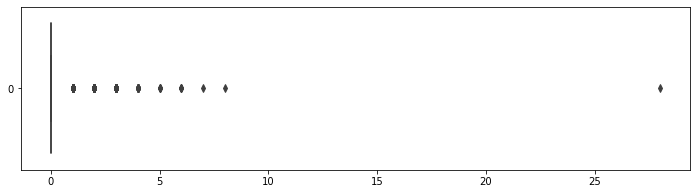


54 Icd9_E-V


PatientGuid  IQR Method
0    003CEE1F-5BF5-4171-9284-F5464EC12D41         7.0
1    00607D4B-5F8F-4026-AF20-85A961B4B904         5.0
2    038CA2A9-5B23-425E-A38A-00D3002E7500         9.0
3    03C055C2-B11D-41AB-B9CD-FC73EA7CF85E         6.0
4    03C952FD-0287-4EEE-AF9A-4A29FA562566         5.0
..                                    ...         ...
234  F9D29A1E-B462-46AE-88AC-188039B1D393         6.0
235  F9F7C1E9-0363-4565-BACE-071DB685F3C8         8.0
236  FACDA951-A203-4EBE-8BF7-247513E2682C         7.0
237  FAFBC212-1DCD-4DFB-91AF-57DE7E5877F7         9.0
238  FE1F52BF-3E1E-4910-9848-A45DF554FDEB         7.0

[239 rows x 2 columns]

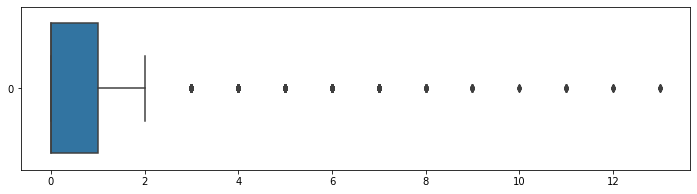


55 Icd9_Unknown


PatientGuid  IQR Method
0    00023761-9D8D-445B-874C-2424CC7CF620         1.0
1    006948F2-1118-4F56-A561-6A254EE357C6         1.0
2    008383B8-BF24-4DBB-A848-A377A4899599         1.0
3    00B7C61A-82E5-42E1-B9C0-6B39C5BC552F         1.0
4    0101AC44-80F4-4FF2-9600-322F1C07B38A         1.0
..                                    ...         ...
754  FE94F44C-D91A-4489-A822-B33FC8147754         1.0
755  FED06E2E-7123-4030-BB61-8B2FBAF149CF         1.0
756  FF618A7A-92FE-4651-8646-D43E81E7A949         1.0
757  FF9BA1EB-03AB-47FE-B110-B559D8E0835B         1.0
758  FFC8E19F-A199-46A3-895A-E3C07FBAC809         1.0

[759 rows x 2 columns]

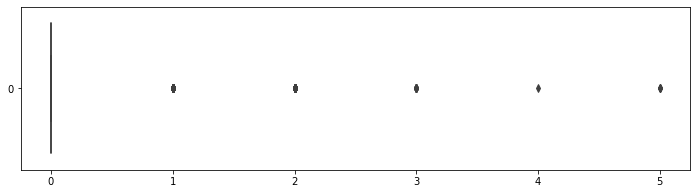


56 DiagnosisCount


PatientGuid  IQR Method
0    0589289A-6C1E-4F8B-A56E-A4B938580401        48.0
1    0B5BCD43-1065-4FEC-B2CC-C7A4225C2BF6        44.0
2    0CC39D02-9DD9-45B9-B492-93996EC07016        37.0
3    0D2F30BF-AB70-4EF5-95D8-14CC6EA92491        54.0
4    0DBFDED7-6A6E-43F8-AFEB-E25816B816C1        48.0
..                                    ...         ...
99   FAC8D999-3F05-4A91-BD2D-019A3C3DA248        40.0
100  FB5F0578-B696-422F-98CA-750A301698AB        35.0
101  FE18FB04-F8D3-4285-9A0F-F47554C6ADAF        36.0
102  FF391C47-2E9A-4F83-858D-A0EA50B19674        34.0
103  FF618A7A-92FE-4651-8646-D43E81E7A949        39.0

[104 rows x 2 columns]

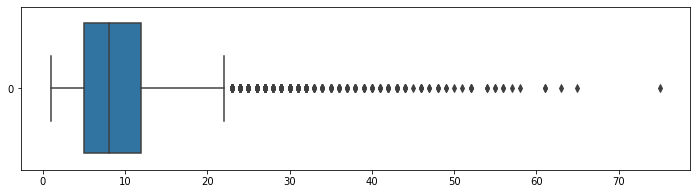


57 VisitCount


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

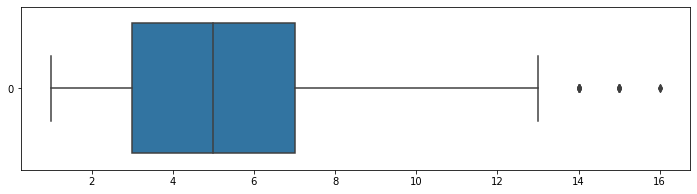


58 DiagnosisFreq


PatientGuid  IQR Method
0   034555D8-4351-4675-BCB5-2B09748B9AC5   11.000000
1   06E00F6F-FC5C-4AFC-B1F1-8F99A5CE82EC    4.333333
2   087E57D1-19C9-4484-94DC-FAF3D9535270    5.000000
3   0D2F30BF-AB70-4EF5-95D8-14CC6EA92491    5.400000
4   0D640735-3773-4ECE-B4D0-AA5159CDC42D    4.500000
..                                   ...         ...
63  F127C5F8-7893-4B20-93B3-5184DD53FAAB    4.666667
64  F1450EF6-9807-4507-A004-CDAE7D9DCB05    4.909091
65  F764BC86-0CFA-4661-8D84-FFFA8E2B6080    6.100000
66  F7A55C37-222E-40D6-883B-1F3943364BA8    8.000000
67  FAFBC212-1DCD-4DFB-91AF-57DE7E5877F7    6.000000

[68 rows x 2 columns]

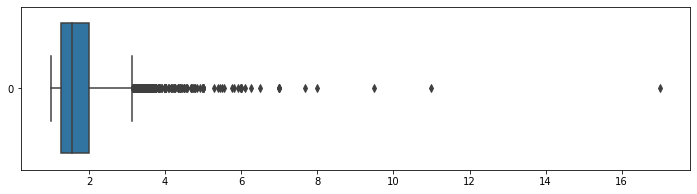


59 AcuteCount


PatientGuid  IQR Method
0    0254DF22-EA5C-49CD-B425-A08514C75149          11
1    038CA2A9-5B23-425E-A38A-00D3002E7500          24
2    04FC8B9B-D20C-47AE-814F-3003BDE59AA3          10
3    06A0A554-58F9-46DD-825E-A5CDAEAD409F          13
4    06BD76A2-370A-4D1D-83C6-C0AF43851D26          23
..                                    ...         ...
370  FD4ABAD5-3065-4C25-8C14-A8C976833A82          21
371  FD4F9D9C-3127-47B2-9676-778F68CFF245          11
372  FE1F52BF-3E1E-4910-9848-A45DF554FDEB          12
373  FE2E1DF7-1D56-430B-B8A0-7ED7F925A11C          10
374  FF827F18-B26E-4B6A-B03D-1BE5F6768B88          27

[375 rows x 2 columns]

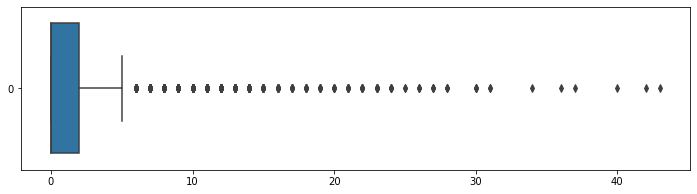


60 AcuteFreq


Empty DataFrame
Columns: [PatientGuid, IQR Method]
Index: []

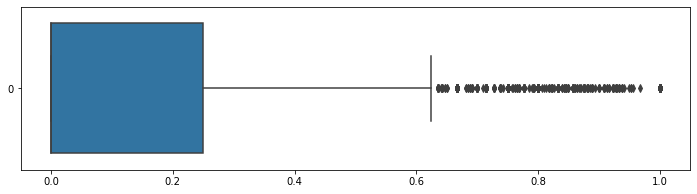

In [12]:
# using boxplots to understand the distribution for the featurers -- and its "outliers" -- after transformation

featuresL = list(dataset_tran.columns)

for i, attr in enumerate(featuresL):
    
    print(i, attr)
    trainX = dataset[attr]
    
#     for ind, obs in zip(trainX.index, trainX):
#         print(ind, obs)
#         break
    
    # detecting significant outliers using the IQR method; suggested to try by a TA
    # however, this method might be considered a little simplistic
    q1 = trainX.quantile(.25)
    q3 = trainX.quantile(.75)
    iqr = q3-q1
    
#     threshold_max = q3 + 1.5*iqr
#     threshold_min = q1 - 1.5*iqr
    threshold_max = q3 + 3*iqr
    threshold_min = q1 - 3*iqr
    
    sig_outliers = []
    for index, obs in zip(trainX.index, trainX):
        if (obs > threshold_max) or (obs < threshold_min):
            sig_outliers.append([index, obs])
#     sig_outliers = [index, obs for index, obs in zip(trainX.index, trainX) if (obs > threshold_max) or (obs < threshold_min)]
    sig_outliers_df = pd.DataFrame(sig_outliers, columns=["PatientGuid", "IQR Method"])
    
    display(sig_outliers_df)
    
    fig, ax = plt.subplots(figsize=(12, 3))
    # I visually understand horizontally orriented boxplots better
    boxplot = sns.boxplot(data=trainX, orient="h", ax=ax)
    plt.show()
    
    print()

In [13]:
dataset_norm = dataset_tran.copy()

# randomize
dataset_norm = dataset_norm.sample(frac=1, random_state=10)

# display(dataset_norm)

dataset_test = dataset_norm[:1990]
dataset_train = dataset_norm[1990:]
# dataset_train = dataset_norm[:6964]
# dataset_test = dataset_norm[6964:]

# display(dataset_train)
# display(dataset_test)

In [14]:
# from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
train_norm = pd.DataFrame(normalizer.fit_transform(dataset_train), columns=dataset.columns, index=dataset_train.index)

test_norm = pd.DataFrame(normalizer.transform(dataset_test), columns=dataset.columns, index=dataset_test.index)


In [15]:
# from sklearn.feature_selection import r_regression

for attr in dataset.columns:
    corL = list( r_regression(dataset, dataset[attr]) )
    
    for attr2, cor in zip(dataset.columns, corL):
        if cor > 0.7 and round(cor, 7) != 1:
            print(attr, ":", attr2, "=", cor)

#     print()

Height_Max : Height_Mean = 0.8220349360124117
Weight_Max : BMI_Max = 0.782050900249287
BMI_Max : Weight_Max = 0.7820509002492971
SystolicBP_Max : SystolicBP_Mean = 0.808524984733536
DiastolicBP_Max : DiastolicBP_Mean = 0.7624629041980517
RespiratoryRate_Max : RespiratoryRate_Std = 0.7290372883844264
Height_Min : Height_Mean = 0.77942277639093
Weight_Min : BMI_Min = 0.7860536037278584
BMI_Min : Weight_Min = 0.7860536037278526
SystolicBP_Min : SystolicBP_Mean = 0.7105218026428161
DiastolicBP_Min : DiastolicBP_Mean = 0.7358731478190211
Weight_Std : BMI_Std = 0.7499308382176413
BMI_Std : Weight_Std = 0.7499308382176517
RespiratoryRate_Std : RespiratoryRate_Max = 0.7290372883841122
Height_Mean : Height_Max = 0.8220349360156656
Height_Mean : Height_Min = 0.7794227763916082
Weight_Mean : BMI_Mean = 0.791467734292264
BMI_Mean : Weight_Mean = 0.7914677342922641
SystolicBP_Mean : SystolicBP_Max = 0.8085249847337463
SystolicBP_Mean : SystolicBP_Min = 0.7105218026428805
DiastolicBP_Mean : Diastoli

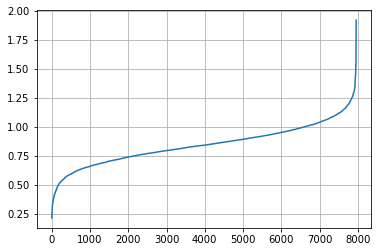

In [16]:
# visually identifying the range for optimal eps  

# from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train_norm)
distances, indices = nbrs.kneighbors(train_norm)


distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.grid(True)
plt.plot(distances)



In [17]:
# https://stackoverflow.com/questions/27822752/scikit-learn-predicting-new-points-with-dbscan
# This block (i.e. implementation of test set prediction with DBSCAn) is roughly from the top poster above


def dbscan_predict(dbscan_model, testX, metric=sp.spatial.distance.euclidean):
    # Result is noise by default
    testY = np.ones(shape=len(testX), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(testX):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                testY[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return testY


In [18]:
def Cluster(columnsL):
    
    rowL = []
    
    for i in range(6):
        if i <= (len(columnsL)-1):
            rowL.append(columnsL[i])
        else:
            rowL.append("N/A")
    
    
    # eps hyperparameter tuning within the range we found from the diagram
    eps_set = [i/1000 for i in range(240, 300, 2)] 

    epsL = []
    for eps in eps_set:
        clustering = DBSCAN(eps=eps, min_samples=len(columnsL)*2, metric="euclidean").fit(train_norm[ columnsL ])

        lbls = list(set(clustering.labels_))
        # distribution of instances among the the clusters
        dist = list(pd.Series(clustering.labels_).value_counts())

        if ( (len(lbls) == 4) and (-1 not in lbls) ) or ( (len(lbls) == 5) and (-1 in lbls) ):
            epsL.append((eps, lbls, dist))

    epsL.sort(reverse=True, key=lambda x:x[0])
    epsL.sort(key=lambda x:x[-1][-1])
    # epsL.reverse()
#     print(epsL) ***
    
    # skip if its empty
    if not epsL:
        return "skip", "skip", "skip", "skip", "skip"
        
    best_eps = epsL[0][0]
    print("Best Epsilon:", best_eps)
    print()
    # print(best_eps)
    rowL.append(best_eps)
    rowL.append(len(columnsL)*2)

#     columnsL = ['SystolicBP_Max', 'Age', 'Icd9_390-459', 'Icd9_460-519', 'VisitCount'] 
    
    # do gridsearch parameter tuning for eps??? Or just write about it
#     clustering = DBSCAN(eps=0.258, min_samples=10, metric="euclidean").fit(train_norm[ columnsL ])
#     clustering = DBSCAN(eps=0.249, min_samples=len(columnsL)*2, metric="euclidean").fit(train_norm[ columnsL ])
    clustering = DBSCAN(eps=best_eps, min_samples=len(columnsL)*2, metric="euclidean").fit(train_norm[ columnsL ])
    # print(clustering.labels_)
    
    # Does the same thing as Counter essentially
#     print(pd.Series(clustering.labels_).value_counts())

    # print()
    # for patient, label in zip(train_norm.index, clustering.labels_):
    #     print(patient, label)

    
    cluster0_df = train_norm.copy()[ columnsL ]

    cluster0_df["class"] = clustering.labels_
#     train_df = cluster0_df.copy()
    
    for i, attr in enumerate(cluster0_df.iloc[:, :-1].columns):
        print("X%d" %(int(i)), attr)
    print()
    
    trainY = cluster0_df["class"]
    print("Train Set Labels")
    print(Counter(trainY))
#     rowL.append(Counter(trainY))
#     rowL.append(Counter(trainY)[-1])
    
    # decision tree
    classifier = DecisionTreeClassifier(criterion="entropy")    
    classifier.fit(cluster0_df.iloc[:, :-1], cluster0_df.iloc[:, -1])
    prediction = classifier.predict(cluster0_df.iloc[:, :-1])
    
    
    # getting the cluster labels/classes in order of acuity (low to high)
    # feature_importances gives the Gini importance of each
#     print()
#     print(classifier.feature_importances_)
    imp_features = []
    for i, importance in enumerate(classifier.feature_importances_):
        imp_features.append((importance, columnsL[i]))
    imp_features.sort(reverse=True, key=lambda x:x[0])
    imp_features = [feature for imp, feature in imp_features[:2]]
#     print(imp_features)
#     print() 
    
    
    leavesL = []
    for arr in classifier.tree_.value:
        lst = list(arr[0])[1:]
        if (len(set(lst)) != 2) or (0 not in lst):
            continue
        else:
            if lst not in leavesL:
                leavesL.append(lst)
    
    # list of the 4 acuity labels (minimum to intensive)
    acuityL_raw = []
    for leaf in (leavesL):
        for i in range(len(leaf)):
            lbl = leaf[i]
            if lbl:
                acuityL_raw.append(i)
                break
    acuityL = []
    for i in acuityL_raw:
        if i not in acuityL:
            acuityL.append(i)

    
    for lbl in acuityL:
        cell = "Label (" + str(lbl) + "): " + str(Counter(trainY)[lbl])
        rowL.append(cell)
    cell = "Label (-1): " + str(Counter(trainY)[-1])
    rowL.append(cell)
    
    
    # clustering internal evaluation score: using silhouette score
    X = train_norm[columnsL].copy()
    Y = trainY.copy()

    XY_df = X.copy()
    XY_df = XY_df[imp_features]

    XY_df["cluster"] = Y
    # display(XY_df)
    XY_df = XY_df.rename(columns={imp_features[0]: "x1", imp_features[1]: "x2"})
    # removing outlier instances
    XY_df = XY_df.loc[XY_df['cluster']!=-1]
    # display(XY_df)

    sil_score = silhouette_score(XY_df.iloc[:, :-1], XY_df["cluster"])
    print("Silhouette Score:", sil_score)
    rowL.append(sil_score)
    
    
    # prediction = ols_model.predict(testX)
    accuracy = accuracy_score(cluster0_df.iloc[:, -1], prediction)
    # could use score method; score(X, y, sample_weight=None)
    print("\nDecision Tree Accuracy:", accuracy)
    print("2 Most Important Features:", imp_features)
    print()
    fig, ax = plt.subplots(figsize=(100, 60))
    tree.plot_tree(classifier, ax=ax)

    plt.show()
    
    minimum = acuityL[0]
    intermediate = acuityL[1]
    semi_intensive = acuityL[2]
    intensive = acuityL[3]
    print("Minimum Acuity: Cluster", minimum)
    print("Intermediate Acuity: Cluster", intermediate)
    print("Semi-Intensive Acuity: Cluster", semi_intensive)
    print("Intensive Acuity: Cluster", intensive)
    print()
    
    
    # assigning to test set
    testX = test_norm[columnsL]
    testY = dbscan_predict(clustering, np.array(test_norm[columnsL]))
    
    print("Test Set Labels")
    print(Counter(testY))

    for lbl in acuityL:
        cell = "Label (" + str(lbl) + "): " + str(Counter(testY)[lbl])
        rowL.append(cell)
    cell = "Label (-1): " + str(Counter(testY)[-1])
    rowL.append(cell)
    
    rowL.append("|")
    
    return trainY, testY, acuityL, imp_features, rowL



In [19]:
# from sklearn.metrics import accuracy_score    
    

def Classify(col_names, trainY, testY, acuityL):
    
    rowL = []
    
    # creating acuity variables (for custom misclassification score later)
    minimum = acuityL[0]
    intermediate = acuityL[1]
    semi_intensive = acuityL[2]
    intensive = acuityL[3]
    
    # removing outliers
    
    trainX = train_norm[col_names]
    testX = test_norm[col_names]
    
    # These give the indices of where "class" doesn't equal to -1
    train_indices = np.where(trainY != -1)[0]
    test_indices = np.where(testY != -1)[0]

    trainX = pd.DataFrame(trainX.iloc[train_indices], columns=trainX.columns)
    testX = pd.DataFrame(testX.iloc[test_indices], columns=testX.columns)
    trainY = np.ravel(np.array(pd.DataFrame(trainY).iloc[train_indices]))    
    testY = np.ravel(np.array(pd.DataFrame(testY).iloc[test_indices]))

    # k parameter tuning
    
    k_vals = list(range(1, 51, 1))


    # Initializing empty lists to gather the error rates associated with each k we test 
    training_error_ratesL = []
    testing_error_ratesL = []

    sets = [(trainX, trainY, training_error_ratesL), (testX, testY, testing_error_ratesL)]

    for attrs, labels, error_ratesL in sets[1:]:

        for k in k_vals:

            # specify the paramters of our model
            model = knn(n_neighbors=k, metric = "euclidean")

            # We train/fit our model with the training set data
            model.fit(trainX, trainY)
            
#             errors = 0
#             # using count to track the indices during the loop and compare the predicted class with the true ones
#             count = 0
#             # the predict() method classifies the unlabeled data based on the previous training of the model
#             for label in model.predict(attrs):
#                 if label != labels[count]:
#                     errors += 1
#                 count += 1
                
#             # error rate is the number of misclassified points divided by number of all test data
#             error_rate = errors/len(model.predict(attrs))
            
            # The block of uncommented code above does the same thing as 1-accuracy_score
            error_rate = 1 - accuracy_score(labels, model.predict(attrs))
            error_ratesL.append(error_rate)
            

    # classifier accuracy on training set

    # initializing best_k such that the while loop starts
    best_k = 1
    # Was told that 1 cannot be a valid k* since its using itself as a neighbor; need to exclude the possibility k* = 1
    while best_k == 1:
        # Even if there are multiple testing error rates of the same best size, since k_vals is sorted least to greatest we still get the optimal k by selecting the first applicable k
        best_testing_error_rate = min(testing_error_ratesL)
        best_k = k_vals[testing_error_ratesL.index(best_testing_error_rate)]
        if 1 in k_vals: k_vals.remove(1)
    # need to return the 1, since k_vals is often reused without being redefined
    k_vals.insert(0, 1)

    print("For KNN Classification with Euclidean metric:")
    print("k* =", best_k)
    rowL.append(best_k)
    print("Resulting in best testing error rate of", best_testing_error_rate)
    print()
    # classmate got 5; check with others

    # Getting the best classifier and its results (at k*) -- to calculate measures accuracy
    # Could use the loop above to get the perforamnce values, and not redo this fitting
    # Since I don't need to visualize the confusion matrix, this step is redundant; doesn't make much of a difference at this scale though
    best_model = knn(n_neighbors=best_k, metric = "euclidean")
    best_model.fit(trainX, trainY)
    best_pred = best_model.predict(trainX)

    print("Classification on training set")
#     matrix = confusion_matrix(trainY, best_pred)
#     print(matrix)

#     sns.heatmap(matrix, annot=True)
#     plt.title("Confusion Matrix")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()

#     matrix_flat = matrix.flatten()
#     t1 = matrix_flat[0]
#     t2 = matrix_flat[5]
#     t3 = matrix_flat[10]
#     t4 = matrix_flat[15]
#     accuracy = (t1+t2+t3+t4)/trainY.shape[0]
    
    accuracy = accuracy_score(trainY, best_pred)
    print("Train Accuracy:", accuracy)
    rowL.append(accuracy)
    print()


    # classifier accuracy on test set           
    best_pred = best_model.predict(testX)

    print("Classification on testing set")
#     matrix = confusion_matrix(testY, best_pred)
#     print(matrix)

#     sns.heatmap(matrix, annot=True)
#     plt.title("Confusion Matrix")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()

#     matrix_flat = matrix.flatten()
#     t1 = matrix_flat[0]
#     t2 = matrix_flat[5]
#     t3 = matrix_flat[10]
#     t4 = matrix_flat[15]
#     accuracy = (t1+t2+t3+t4)/testY.shape[0]

    accuracy = accuracy_score(testY, best_pred)
    print("Test Accuracy:", accuracy)
    rowL.append(accuracy)
    
    
    # custom misclassification metric
    sets = [(best_pred, testY)]

    for prediction, labels in sets:
        cust_error_score = 0
        # using count to track the indices during the loop and compare the predicted class with the true ones
        count = 0
        
        inten_semi = 0
        semi_inter = 0
        inter_min = 0
        inten_inter = 0
        semi_min = 0
        semi_inten = 0
        inter_semi = 0
        min_inter = 0
        inten_min = 0
        inter_inten = 0
        min_semi = 0
        min_inten = 0
        
        # the predict() method classifies the unlabeled data based on the previous training of the model
        for label in prediction:
            if (label == intensive) and (labels[count] == semi_intensive):
                cust_error_score += 1.25
                inten_semi += 1
            elif (label == semi_intensive) and (labels[count] == intermediate):
                cust_error_score += 1.5
                semi_inter += 1
            elif (label == intermediate) and (labels[count] == minimum):
                cust_error_score += 1.75
                inter_min += 1
            elif (label == intensive) and (labels[count] == intermediate):
                cust_error_score += 2
                inten_inter += 1
            elif (label == semi_intensive) and (labels[count] == minimum):
                cust_error_score += 2.25
                semi_min += 1
            elif (label == semi_intensive) and (labels[count] == intensive):
                cust_error_score += 2.5
                semi_inten += 1
            elif (label == intermediate) and (labels[count] == semi_intensive):
                cust_error_score += 2.75
                inter_semi += 1
            elif (label == minimum) and (labels[count] == intermediate):
                cust_error_score += 3
                min_inter += 1
            elif (label == intensive) and (labels[count] == minimum):
                cust_error_score += 3.25
                inten_min += 1
            elif (label == intermediate) and (labels[count] == intensive):
                cust_error_score += 3.5
                inter_inten += 1
            elif (label == minimum) and (labels[count] == semi_intensive):
                cust_error_score += 3.75
                min_semi += 1
            elif (label == minimum) and (labels[count] == intensive):
                cust_error_score += 4
                min_inten += 1

            count += 1
    print("Custom Misclassification Score:", cust_error_score)
    rowL.append(cust_error_score)
    
#     print()
#     print("inten_semi", inten_semi)
#     print("semi_inter", semi_inter)
#     print("inter_min", inter_min)
#     print("inten_inter", inten_inter)
#     print("semi_min", semi_min)
#     print("semi_inten", semi_inten)
#     print("inter_semi", inter_semi)
#     print("min_inter", min_inter)
#     print("inten_min", inten_min)
#     print("inter_inten", inter_inten)
#     print("min_semi", min_semi)
#     print("min_inten", min_inten)
    
#     print(minimum)
#     print(intermediate)
#     print(semi_intensive)
#     print(intensive)

    return rowL
    


In [20]:
# function to see model accuracy when splitting test set BEFORE clustering vs AFTER
# Could probably make the code more efficient, by integrating this into the Classify() function somehow
# But the implementation and results are the same, so it doesn't matter at the moment
    
def Classify2(col_names, trainY, testY1, acuityL):
    
    # creating acuity variables (for custom misclassification score later)
    minimum = acuityL[0]
    intermediate = acuityL[1]
    semi_intensive = acuityL[2]
    intensive = acuityL[3]
    
    # removing outliers
    
    trainX = train_norm[col_names]
    testX1 = test_norm[col_names]
    
    # These give the indices of where "class" doesn't equal to -1
    train_indices = np.where(trainY != -1)[0]
    test_indices = np.where(testY1 != -1)[0]

    testX1 = pd.DataFrame(testX1.iloc[test_indices], columns=testX1.columns)
    testY1 = np.ravel(np.array(pd.DataFrame(testY1).iloc[test_indices]))
    
    trainX_all = pd.DataFrame(trainX.iloc[train_indices], columns=trainX.columns)
    trainY_all = np.ravel(np.array(pd.DataFrame(trainY).iloc[train_indices])) 
    
    testX0 = trainX_all.iloc[:testX1.shape[0]]
    testY0 = trainY_all[:testY1.shape[0]]
    
    trainX = trainX_all.iloc[testX1.shape[0]:]
    trainY = trainY_all[testY1.shape[0]:]
    
    
    # k parameter tuning
    
    k_vals = list(range(1, 51, 1))

    # Initializing empty lists to gather the error rates associated with each k we test 
    training_error_ratesL = []
    testing_error_ratesL = []

    sets = [(trainX, trainY, training_error_ratesL), (testX1, testY1, testing_error_ratesL)]

    for attrs, labels, error_ratesL in sets[1:]:

        for k in k_vals:

            # specify the paramters of our model
            model = knn(n_neighbors=k, metric = "euclidean")

            # We train/fit our model with the training set data
            model.fit(trainX, trainY)
                
            error_rate = 1 - accuracy_score(labels, model.predict(attrs))
            error_ratesL.append(error_rate)
            

    # classifier accuracy on training set

    # initializing best_k such that the while loop starts
    best_k = 1
    # Was told that 1 cannot be a valid k* since its using itself as a neighbor; need to exclude the possibility k* = 1
    while best_k == 1:
        # Even if there are multiple testing error rates of the same best size, since k_vals is sorted least to greatest we still get the optimal k by selecting the first applicable k
        best_testing_error_rate = min(testing_error_ratesL)
        best_k = k_vals[testing_error_ratesL.index(best_testing_error_rate)]
        if 1 in k_vals: k_vals.remove(1)
    # need to return the 1, since k_vals is often reused without being redefined
    k_vals.insert(0, 1)

    print("For KNN Classification with Euclidean metric:")
    print("k* =", best_k)
    print("Resulting in best testing error rate of", best_testing_error_rate)
    print()
    # classmate got 5; check with others

    # Getting the best classifier and its results (at k*) -- to calculate measures accuracy
    best_model = knn(n_neighbors=best_k, metric = "euclidean")
    best_model.fit(trainX, trainY)
    best_pred = best_model.predict(trainX)
    
    print("Classification on training set")
    accuracy = accuracy_score(trainY, best_pred)
    print("Train Accuracy:", accuracy)
    print()


    test_setsL = [(testX0, testY0, "after"), (testX1, testY1, "before")]
    for testX, testY, time in test_setsL:
    
        # classifier accuracy on test set           
        best_pred = best_model.predict(testX)

        print("Classification on testing set")        
        accuracy = accuracy_score(testY, best_pred)
        print("Test Accuracy (splitting", time ,"clustering):", accuracy)


        # custom misclassification metric
        sets = [(best_pred, testY)]

        for prediction, labels in sets:
            cust_error_score = 0
            # using count to track the indices during the loop and compare the predicted class with the true ones
            count = 0

            inten_semi = 0
            semi_inter = 0
            inter_min = 0
            inten_inter = 0
            semi_min = 0
            semi_inten = 0
            inter_semi = 0
            min_inter = 0
            inten_min = 0
            inter_inten = 0
            min_semi = 0
            min_inten = 0

            # the predict() method classifies the unlabeled data based on the previous training of the model
            for label in prediction:
                if (label == intensive) and (labels[count] == semi_intensive):
                    cust_error_score += 1.25
                    inten_semi += 1
                elif (label == semi_intensive) and (labels[count] == intermediate):
                    cust_error_score += 1.5
                    semi_inter += 1
                elif (label == intermediate) and (labels[count] == minimum):
                    cust_error_score += 1.75
                    inter_min += 1
                elif (label == intensive) and (labels[count] == intermediate):
                    cust_error_score += 2
                    inten_inter += 1
                elif (label == semi_intensive) and (labels[count] == minimum):
                    cust_error_score += 2.25
                    semi_min += 1
                elif (label == semi_intensive) and (labels[count] == intensive):
                    cust_error_score += 2.5
                    semi_inten += 1
                elif (label == intermediate) and (labels[count] == semi_intensive):
                    cust_error_score += 2.75
                    inter_semi += 1
                elif (label == minimum) and (labels[count] == intermediate):
                    cust_error_score += 3
                    min_inter += 1
                elif (label == intensive) and (labels[count] == minimum):
                    cust_error_score += 3.25
                    inten_min += 1
                elif (label == intermediate) and (labels[count] == intensive):
                    cust_error_score += 3.5
                    inter_inten += 1
                elif (label == minimum) and (labels[count] == semi_intensive):
                    cust_error_score += 3.75
                    min_semi += 1
                elif (label == minimum) and (labels[count] == intensive):
                    cust_error_score += 4
                    min_inten += 1

                count += 1
        print("Custom Misclassification Score:", cust_error_score)
        print()

    #     print()
    #     print("inten_semi", inten_semi)
    #     print("semi_inter", semi_inter)
    #     print("inter_min", inter_min)
    #     print("inten_inter", inten_inter)
    #     print("semi_min", semi_min)
    #     print("semi_inten", semi_inten)
    #     print("inter_semi", inter_semi)
    #     print("min_inter", min_inter)
    #     print("inten_min", inten_min)
    #     print("inter_inten", inter_inten)
    #     print("min_semi", min_semi)
    #     print("min_inten", min_inten)

    #     print(minimum)
    #     print(intermediate)
    #     print(semi_intensive)
    #     print(intensive)
    


In [21]:
# col_names = ['SystolicBP_Max','DiastolicBP_Max', 'RespiratoryRate_Min', 'SystolicBP_Std',
#             'Temperature_Std', 'Age', 'Icd9_240-279',
#             'Icd9_290-319','Icd9_390-459', 'Icd9_460-519', 'Icd9_580-629',
#             'DiagnosisCount', 'AcuteFreq', 'Icd9_140-239', 'Icd9_280-289'] 

# model_optionsL = [ ['SystolicBP_Max', 'Age', 'Icd9_390-459', 'Icd9_460-519'], 
#                   ['Temperature_Std', 'AcuteFreq', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_390-459'],
#                   ['SystolicBP_Max', 'Age', 'DiagnosisCount', 'Icd9_140-239', 'Icd9_280-289'],
#                   ['BMI_Max', 'SystolicBP_Std', 'Icd9_140-239', 'Icd9_580-629', 'Icd9_240-279'],
#                   ['SystolicBP_Max','DiastolicBP_Max', 'BMI_Max', 'Temperature_Std', 'Age', 'Icd9_460-519'],
#                   ['Icd9_240-279', 'Icd9_290-319', 'Icd9_390-459', 'Icd9_460-519', 'SystolicBP_Std', 'Age'],
#                   ['DiastolicBP_Max', 'RespiratoryRate_Min', 'Icd9_580-629', 'Icd9_290-319', 'AcuteFreq'],
#                   ['DiagnosisCount', 'RespiratoryRate_Min', 'Icd9_290-319', 'Icd9_140-239'], 
#                   ['AcuteFreq', 'Temperature_Std', 'Icd9_280-289', 'Icd9_240-279'] ]


model_optionsL = [ ['SystolicBP_Max', 'Age', 'Icd9_390-459', 'Icd9_460-519'],

['Temperature_Std', 'AcuteFreq', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_390-459'],

['SystolicBP_Max', 'Age', 'DiagnosisCount', 'Icd9_140-239', 'Icd9_280-289'],

['BMI_Max', 'SystolicBP_Std', 'Icd9_140-239', 'Icd9_580-629', 'Icd9_240-279'],

['SystolicBP_Max','DiastolicBP_Max', 'BMI_Max', 'Temperature_Std', 'Age', 'Icd9_460-519'],

['Icd9_240-279', 'Icd9_290-319', 'Icd9_390-459', 'Icd9_460-519', 'SystolicBP_Std', 'Age'],

['DiastolicBP_Max', 'RespiratoryRate_Min', 'Icd9_580-629', 'Icd9_290-319', 'AcuteFreq'],

['DiagnosisCount', 'RespiratoryRate_Min', 'Icd9_290-319', 'Icd9_140-239', 'Icd9_390-459'],

['AcuteFreq', 'Temperature_Std', 'Icd9_280-289', 'Icd9_240-279'],

['AcuteFreq', 'SystolicBP_Max', 'BMI_Max', 'SystolicBP_Std', 'Icd9_580-629', 'Icd9_460-519'] ]


In [22]:

# # flatten a list of lists
# flat = [item for sublist in model_optionsL for item in sublist]

# print(len(set(flat)))
# print(set(flat))
# print()
# print(Counter(flat))


Model Option 1
DBSCAN Clustering with features: ['Temperature_Std', 'AcuteFreq', 'Icd9_140-239', 'Icd9_580-629', 'Icd9_390-459']

Clustering Results
Best Epsilon: 0.248

X0 Temperature_Std
X1 AcuteFreq
X2 Icd9_140-239
X3 Icd9_580-629
X4 Icd9_390-459

Train Set Labels
Counter({0: 3807, 1: 3512, 3: 408, 2: 195, -1: 36})
Silhouette Score: 0.849093582188085

Decision Tree Accuracy: 1.0
2 Most Important Features: ['Icd9_390-459', 'Icd9_140-239']



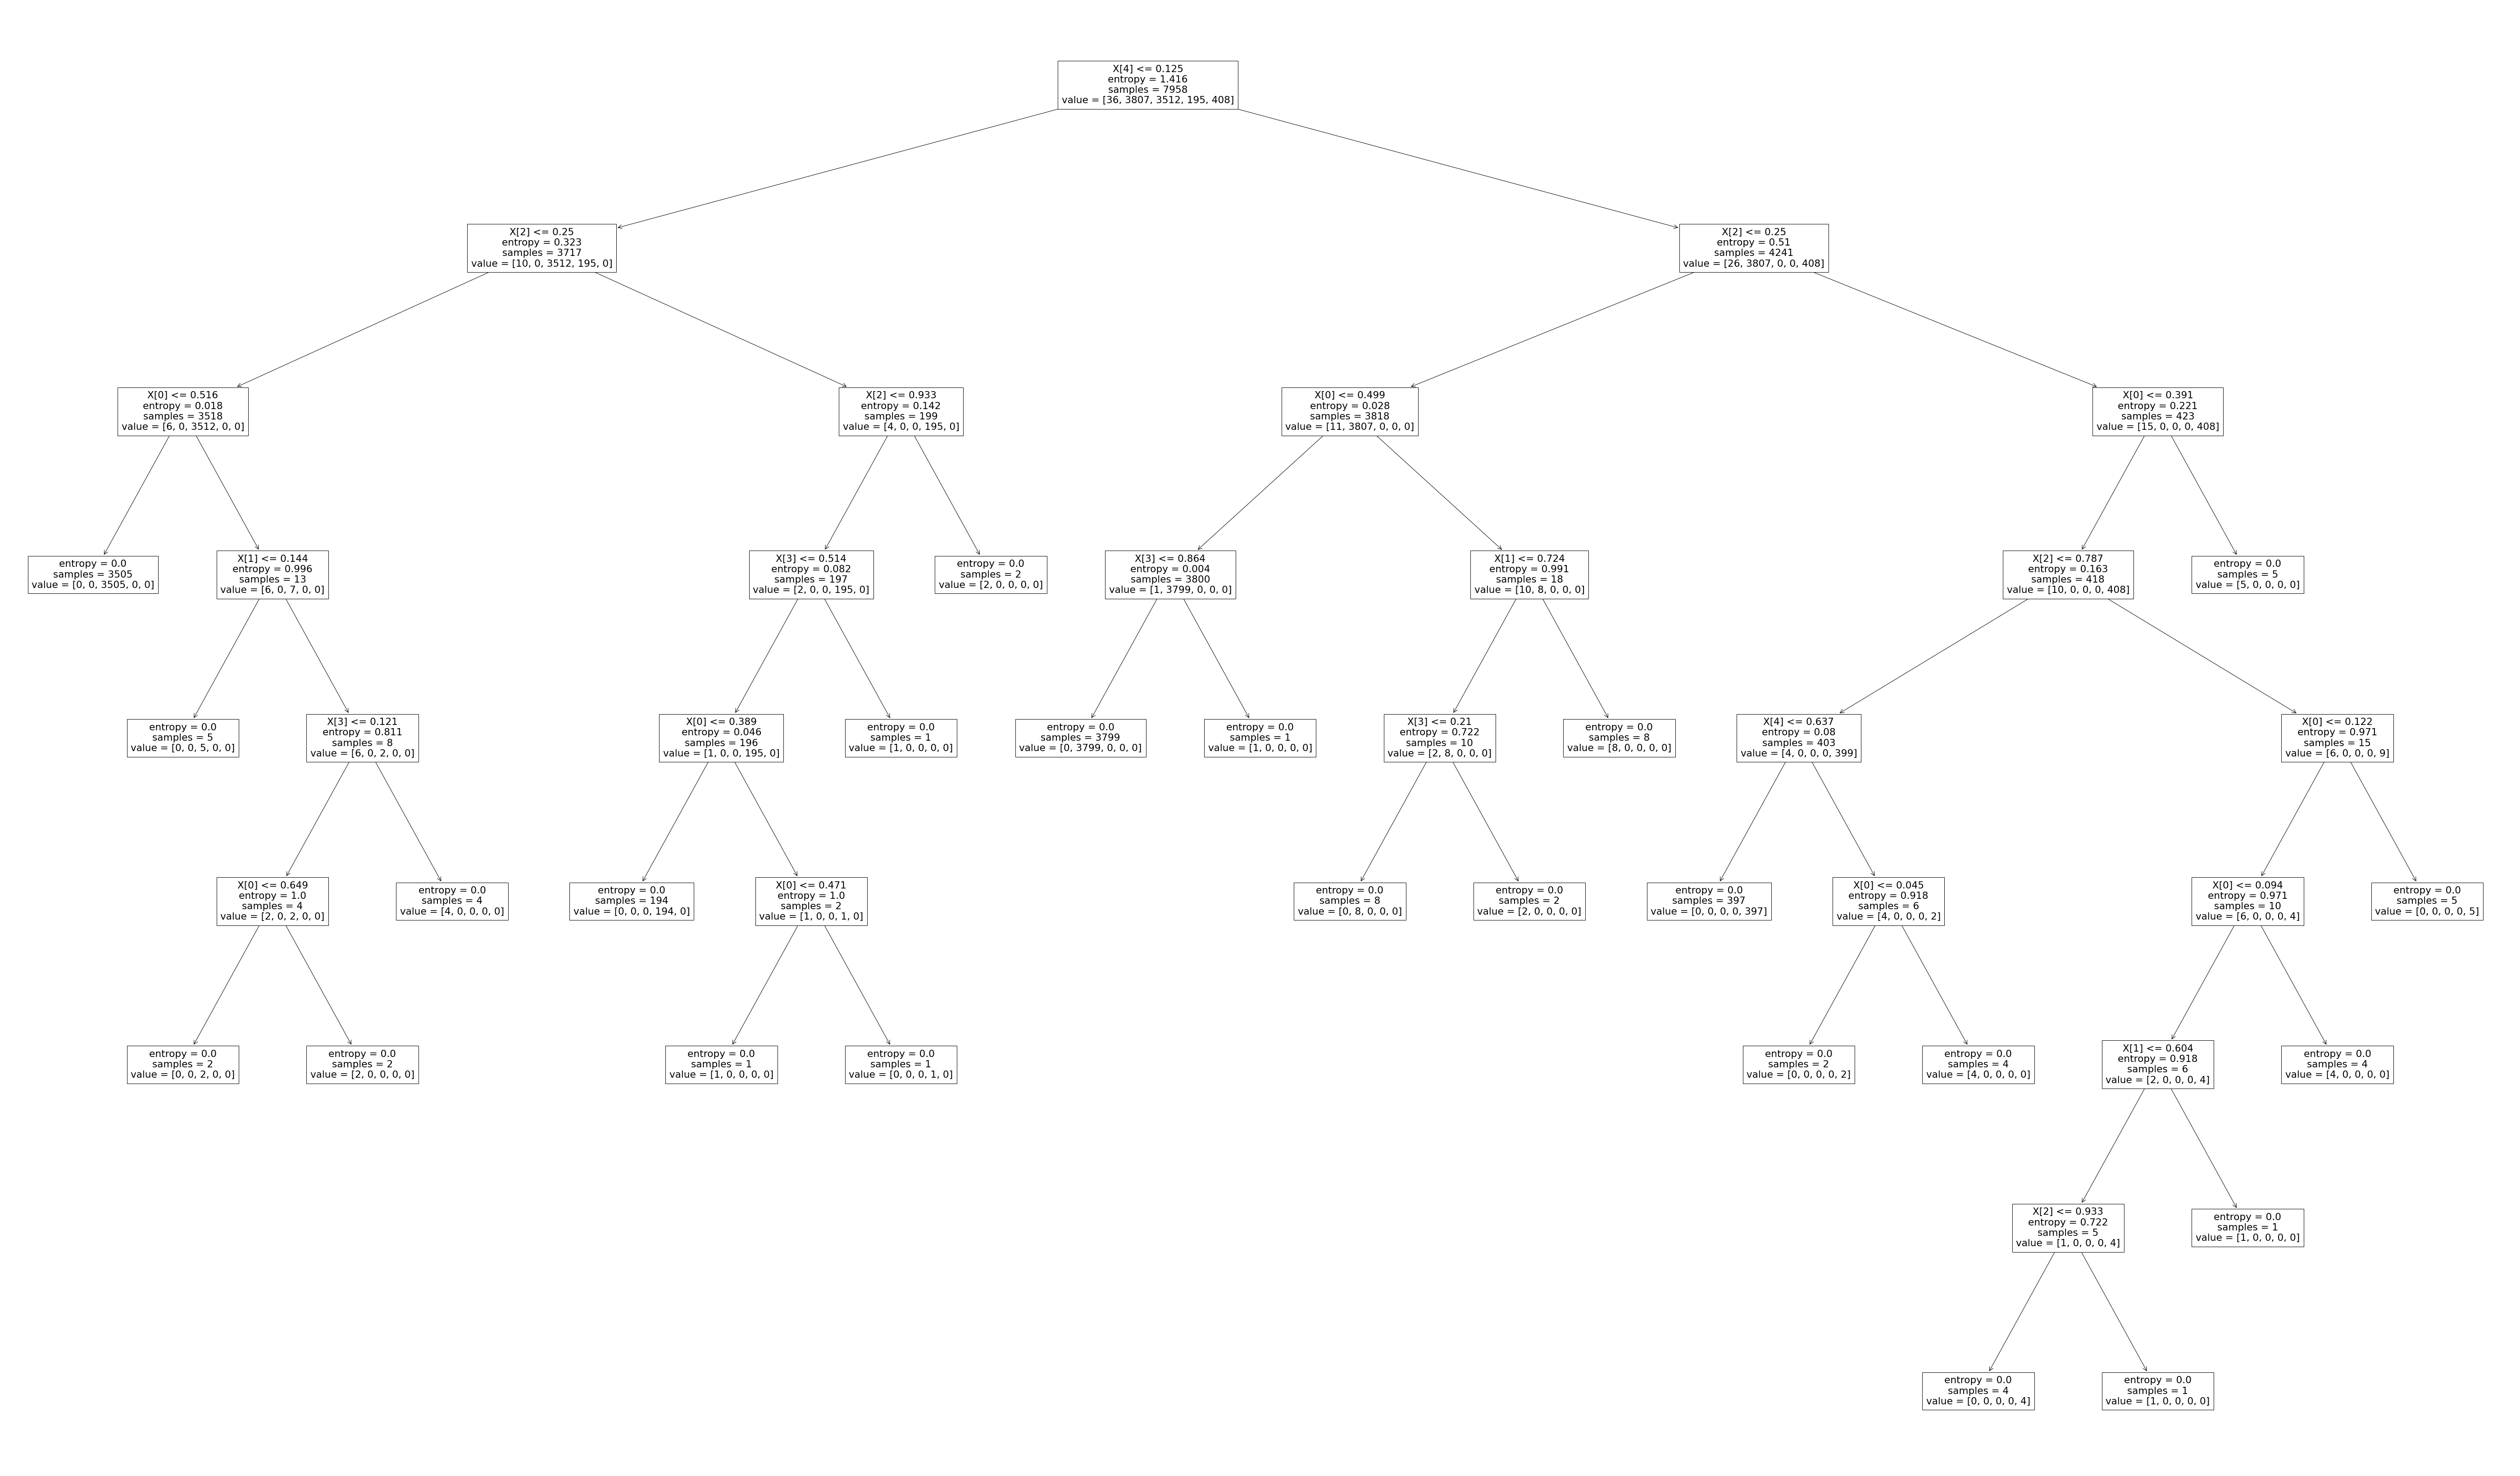

Minimum Acuity: Cluster 1
Intermediate Acuity: Cluster 2
Semi-Intensive Acuity: Cluster 0
Intensive Acuity: Cluster 3

Test Set Labels
Counter({0: 954, 1: 880, 3: 101, 2: 54, -1: 1})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 8
Resulting in best testing error rate of 0.002513826043237799

Classification on training set
Train Accuracy: 0.9983145120512388

Classification on testing set
Test Accuracy (splitting after clustering): 0.9964806435394671
Custom Misclassification Score: 17.75

Classification on testing set
Test Accuracy (splitting before clustering): 0.9974861739567622
Custom Misclassification Score: 14.75



Classification Results
For KNN Classification with Euclidean metr

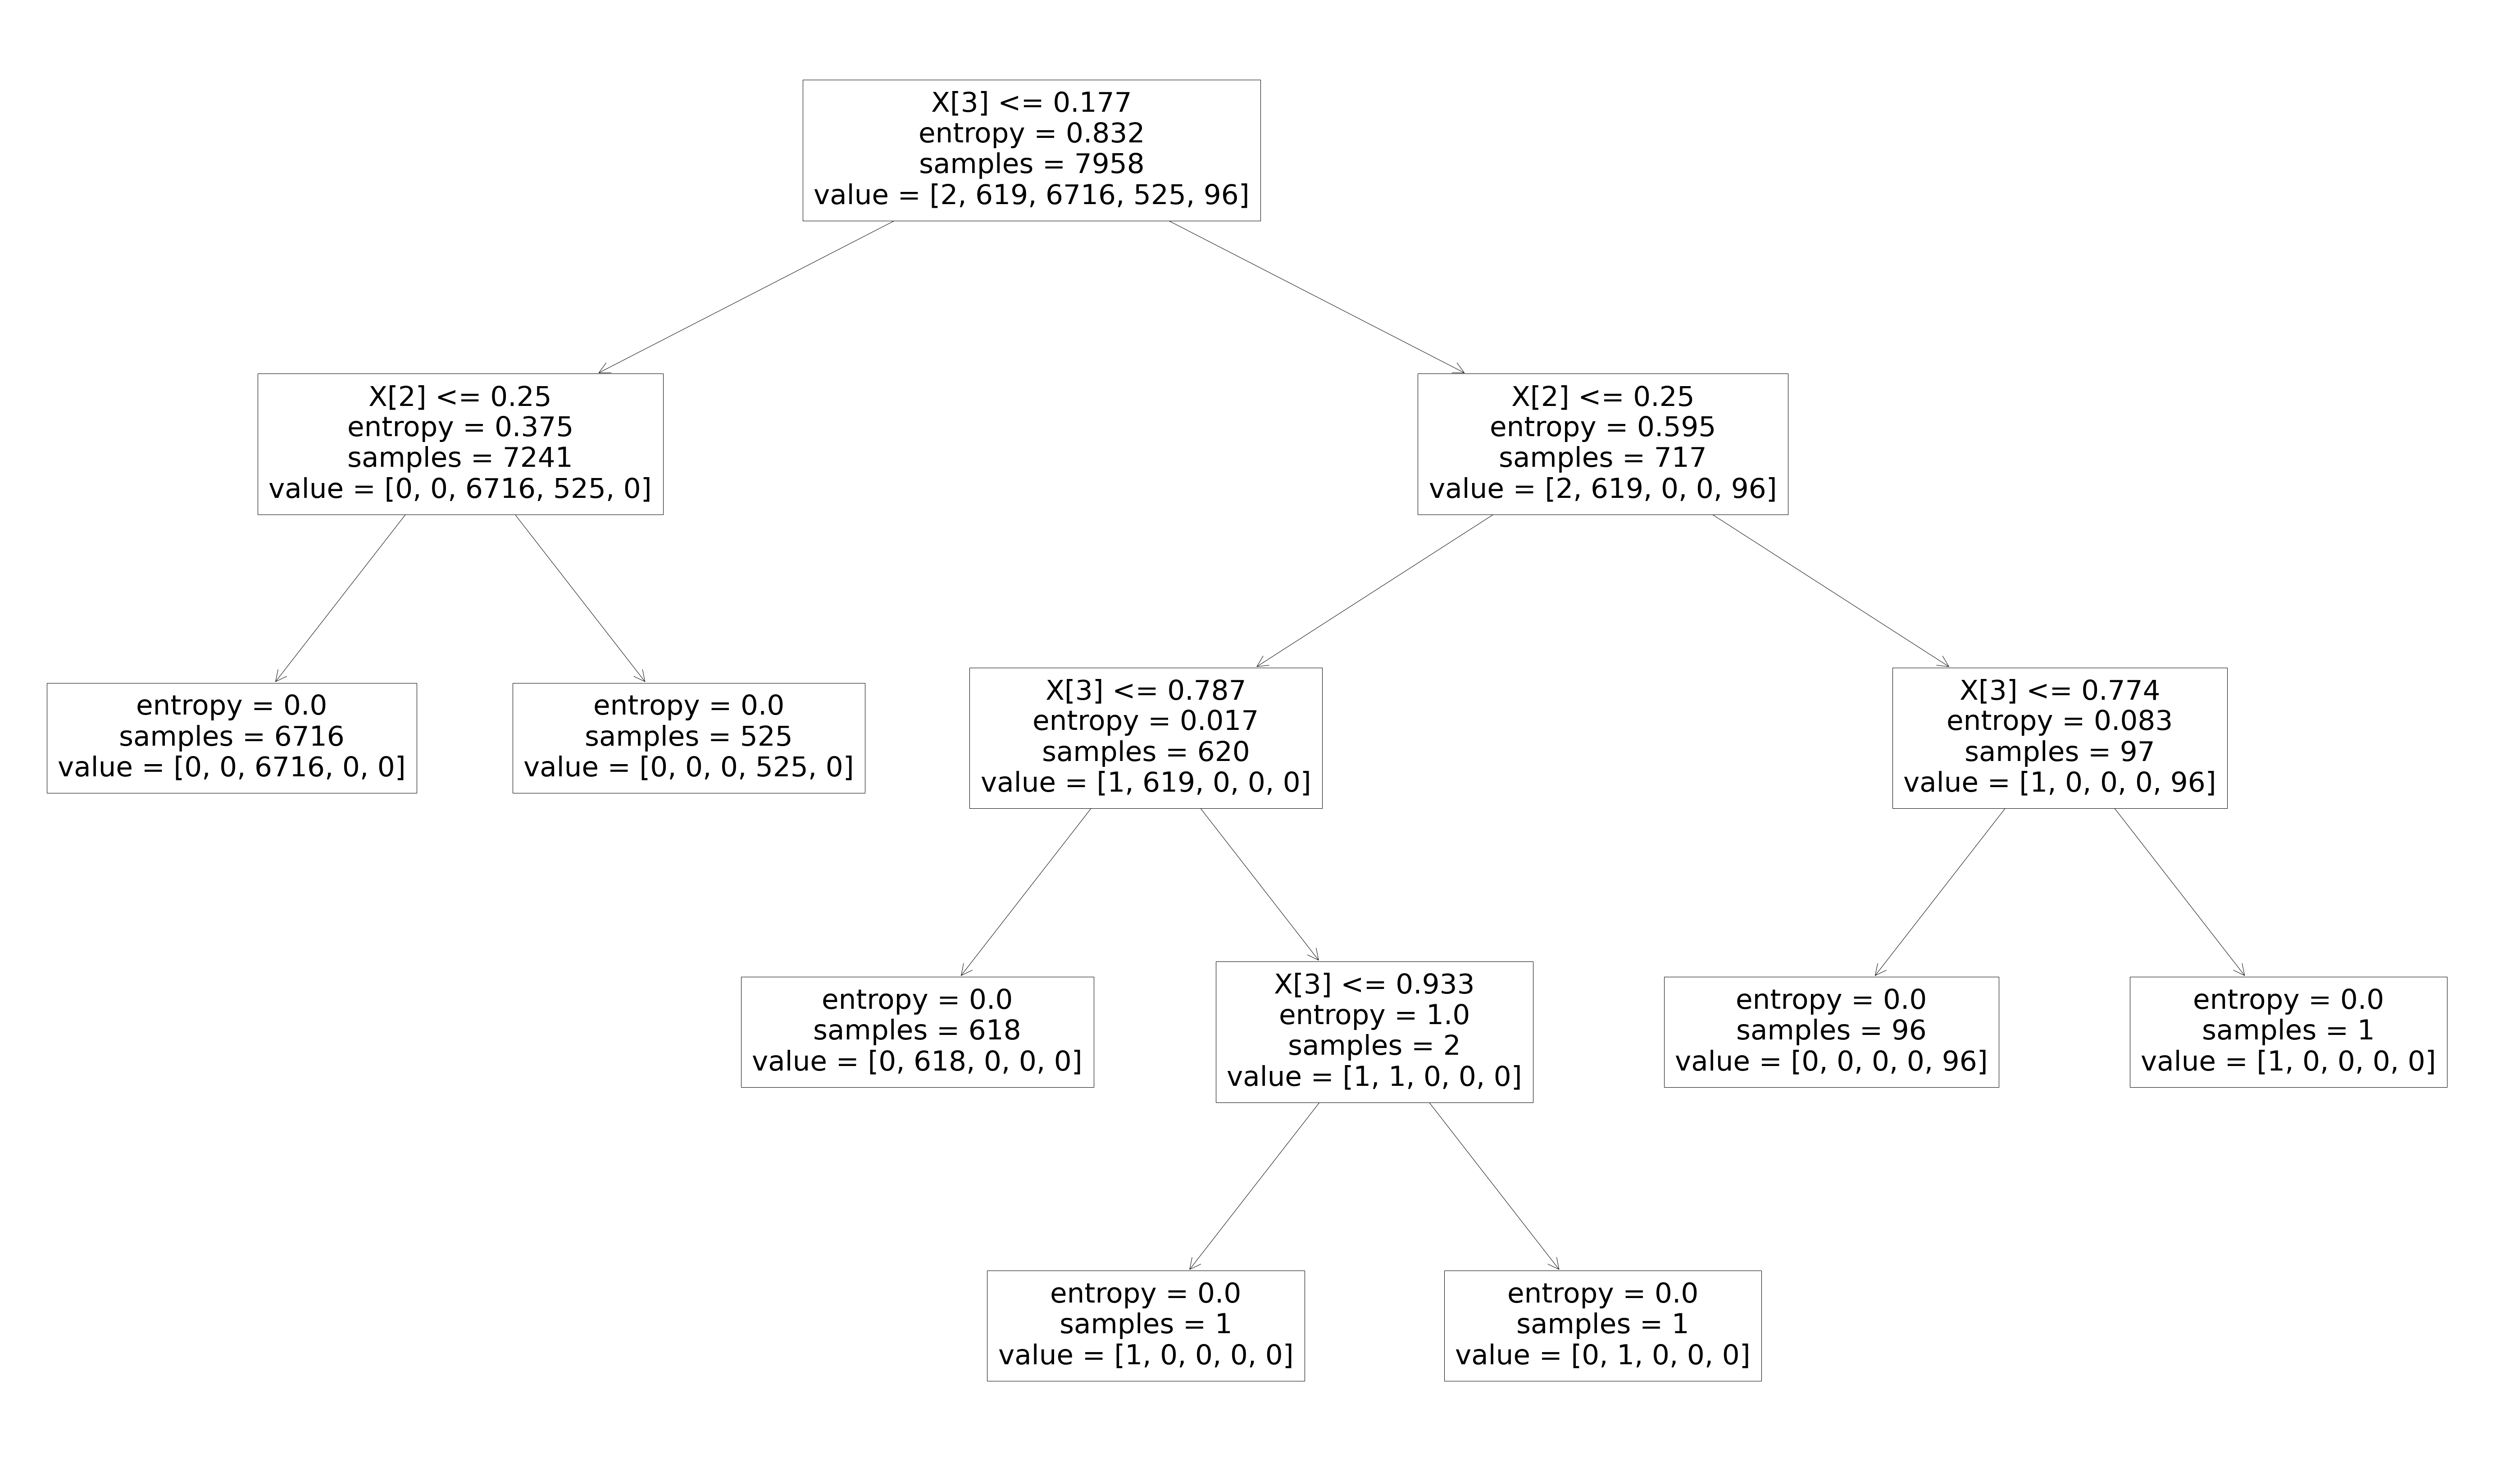

Minimum Acuity: Cluster 1
Intermediate Acuity: Cluster 2
Semi-Intensive Acuity: Cluster 0
Intensive Acuity: Cluster 3

Test Set Labels
Counter({1: 1667, 0: 168, 2: 131, 3: 24})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 2
Resulting in best testing error rate of 0.0015075376884422509

Classification on training set
Train Accuracy: 0.9989943010392223

Classification on testing set
Test Accuracy (splitting after clustering): 0.9984924623115577
Custom Misclassification Score: 9.25

Classification on testing set
Test Accuracy (splitting before clustering): 0.9969849246231156
Custom Misclassification Score: 21.25



Classification Results
For KNN Classification with Euclidean metric:
k*

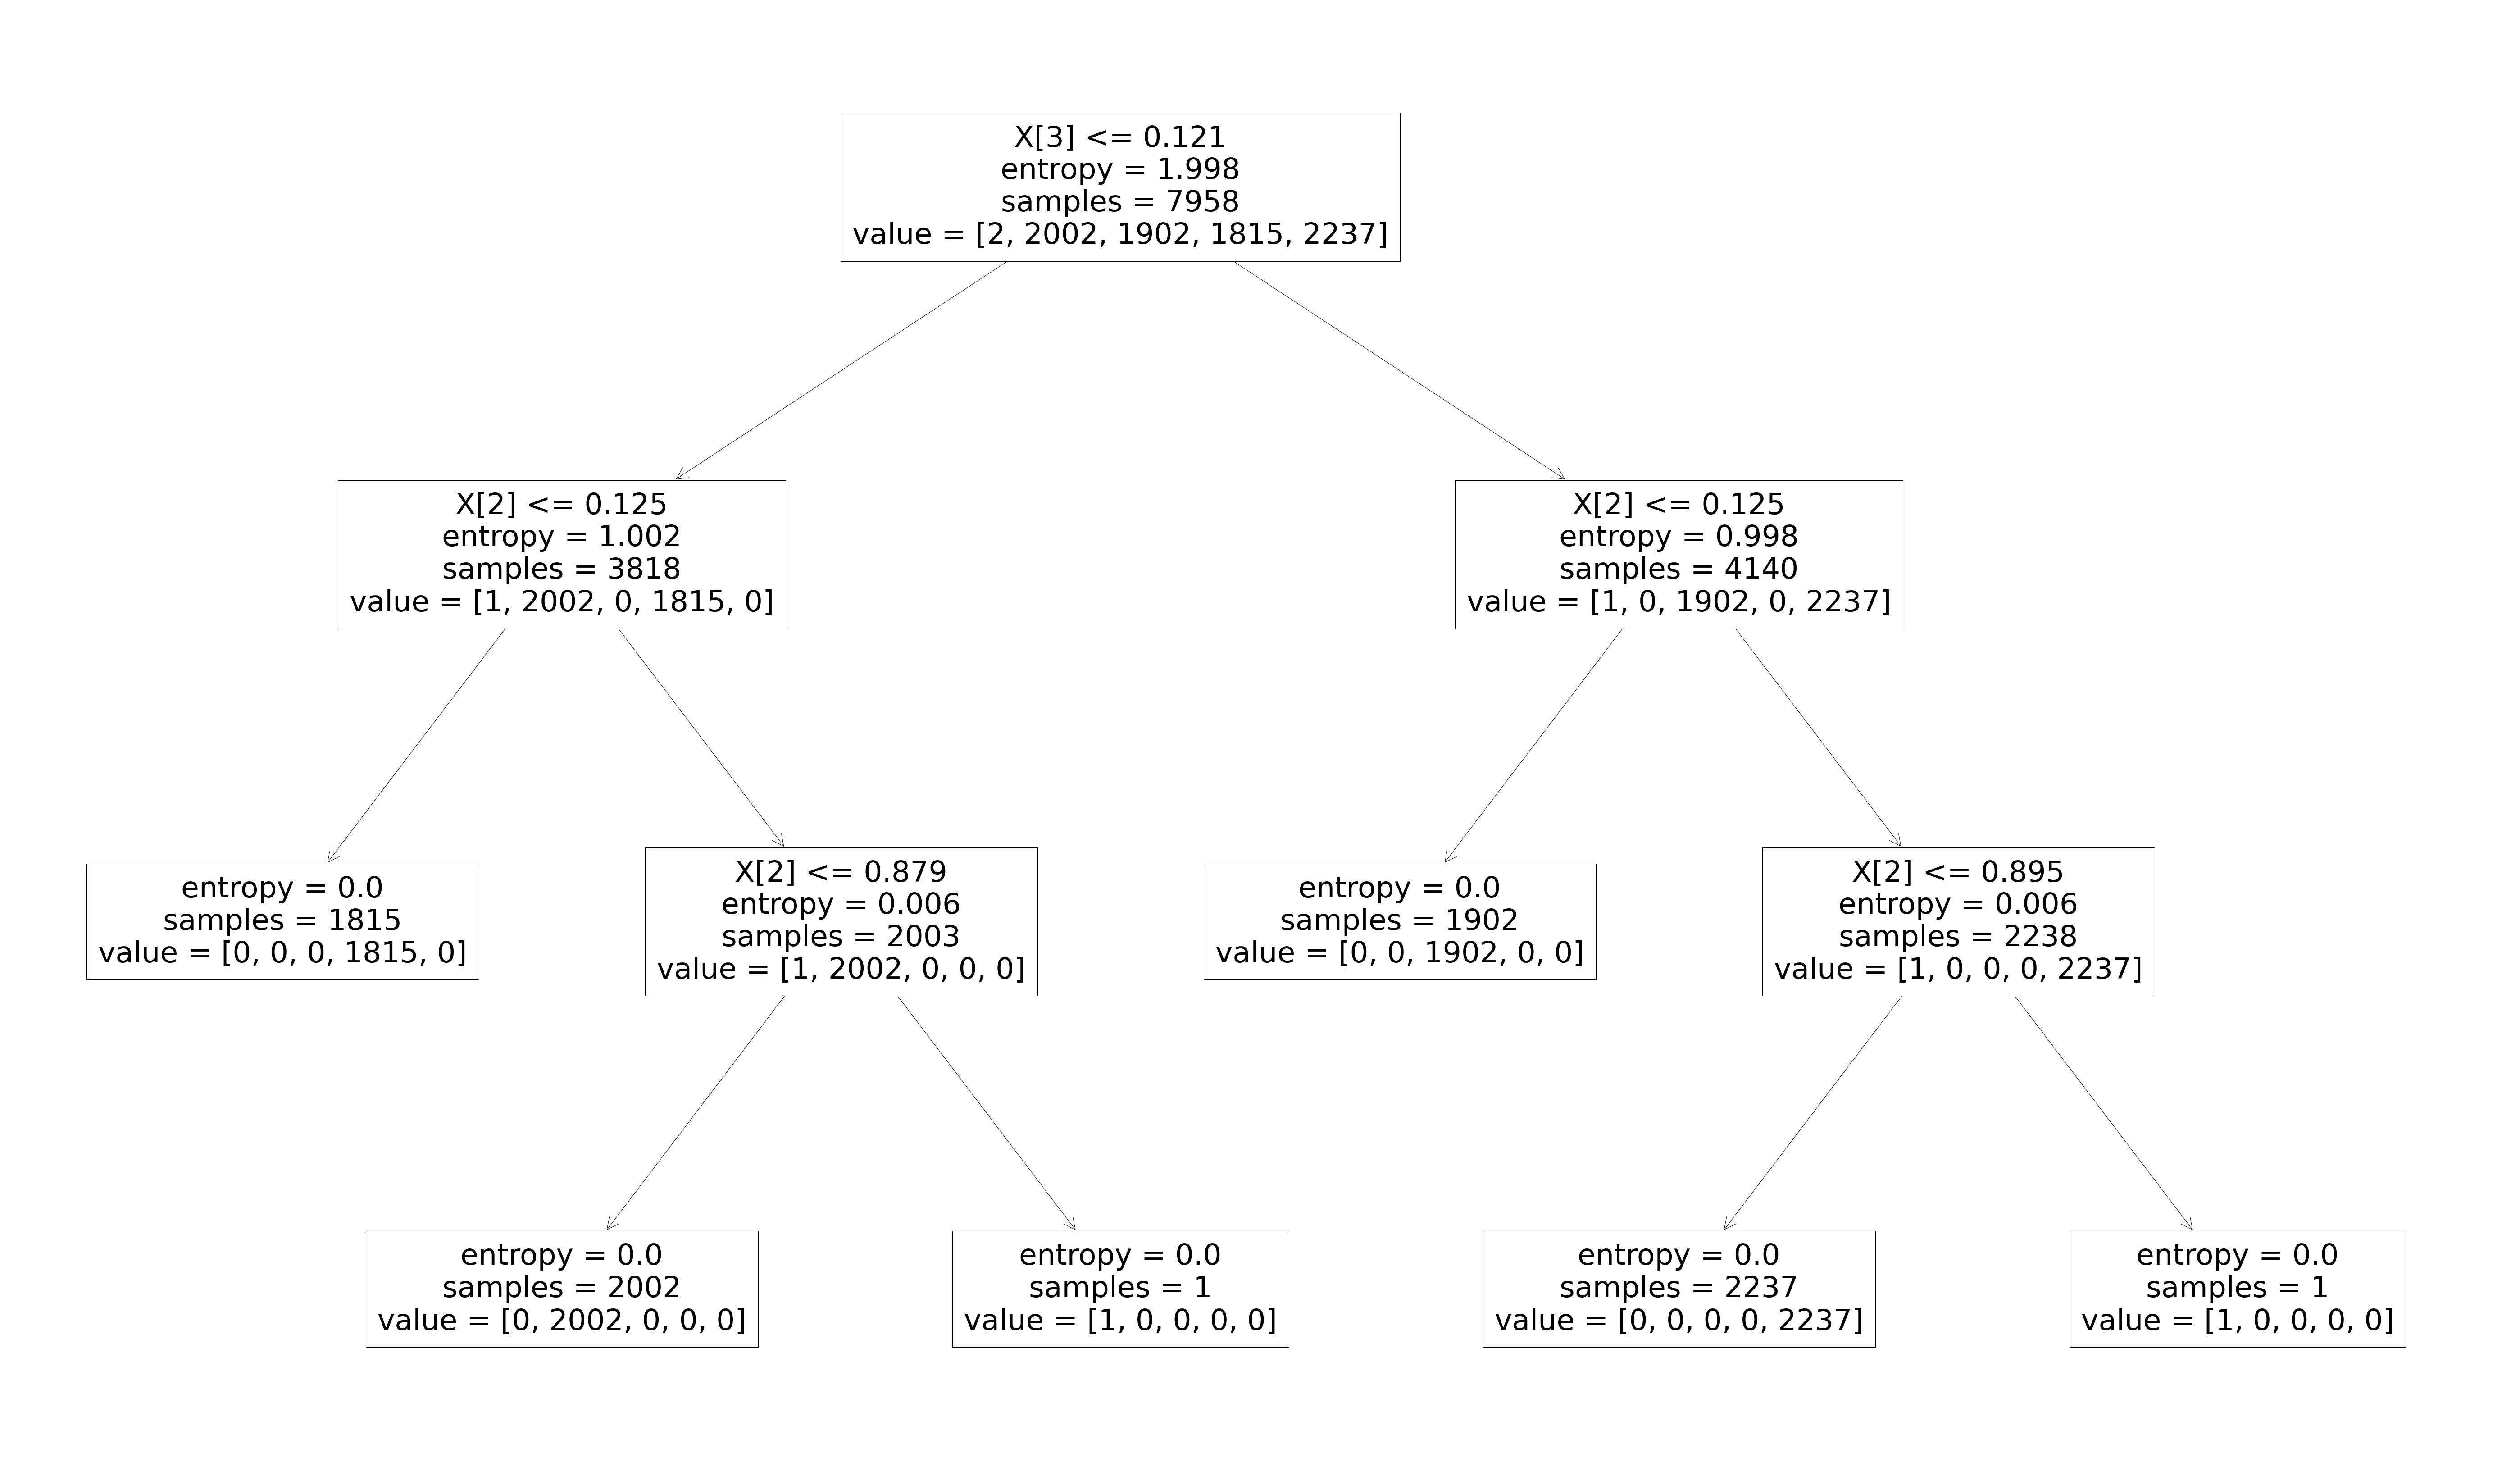

Minimum Acuity: Cluster 2
Intermediate Acuity: Cluster 0
Semi-Intensive Acuity: Cluster 1
Intensive Acuity: Cluster 3

Test Set Labels
Counter({3: 568, 0: 487, 1: 485, 2: 449, -1: 1})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 5
Resulting in best testing error rate of 0.006033182503770718

Classification on training set
Train Accuracy: 0.9978213507625272

Classification on testing set
Test Accuracy (splitting after clustering): 0.9914529914529915
Custom Misclassification Score: 38.5

Classification on testing set
Test Accuracy (splitting before clustering): 0.9939668174962293
Custom Misclassification Score: 29.25



Classification Results
For KNN Classification with Euclidean metr

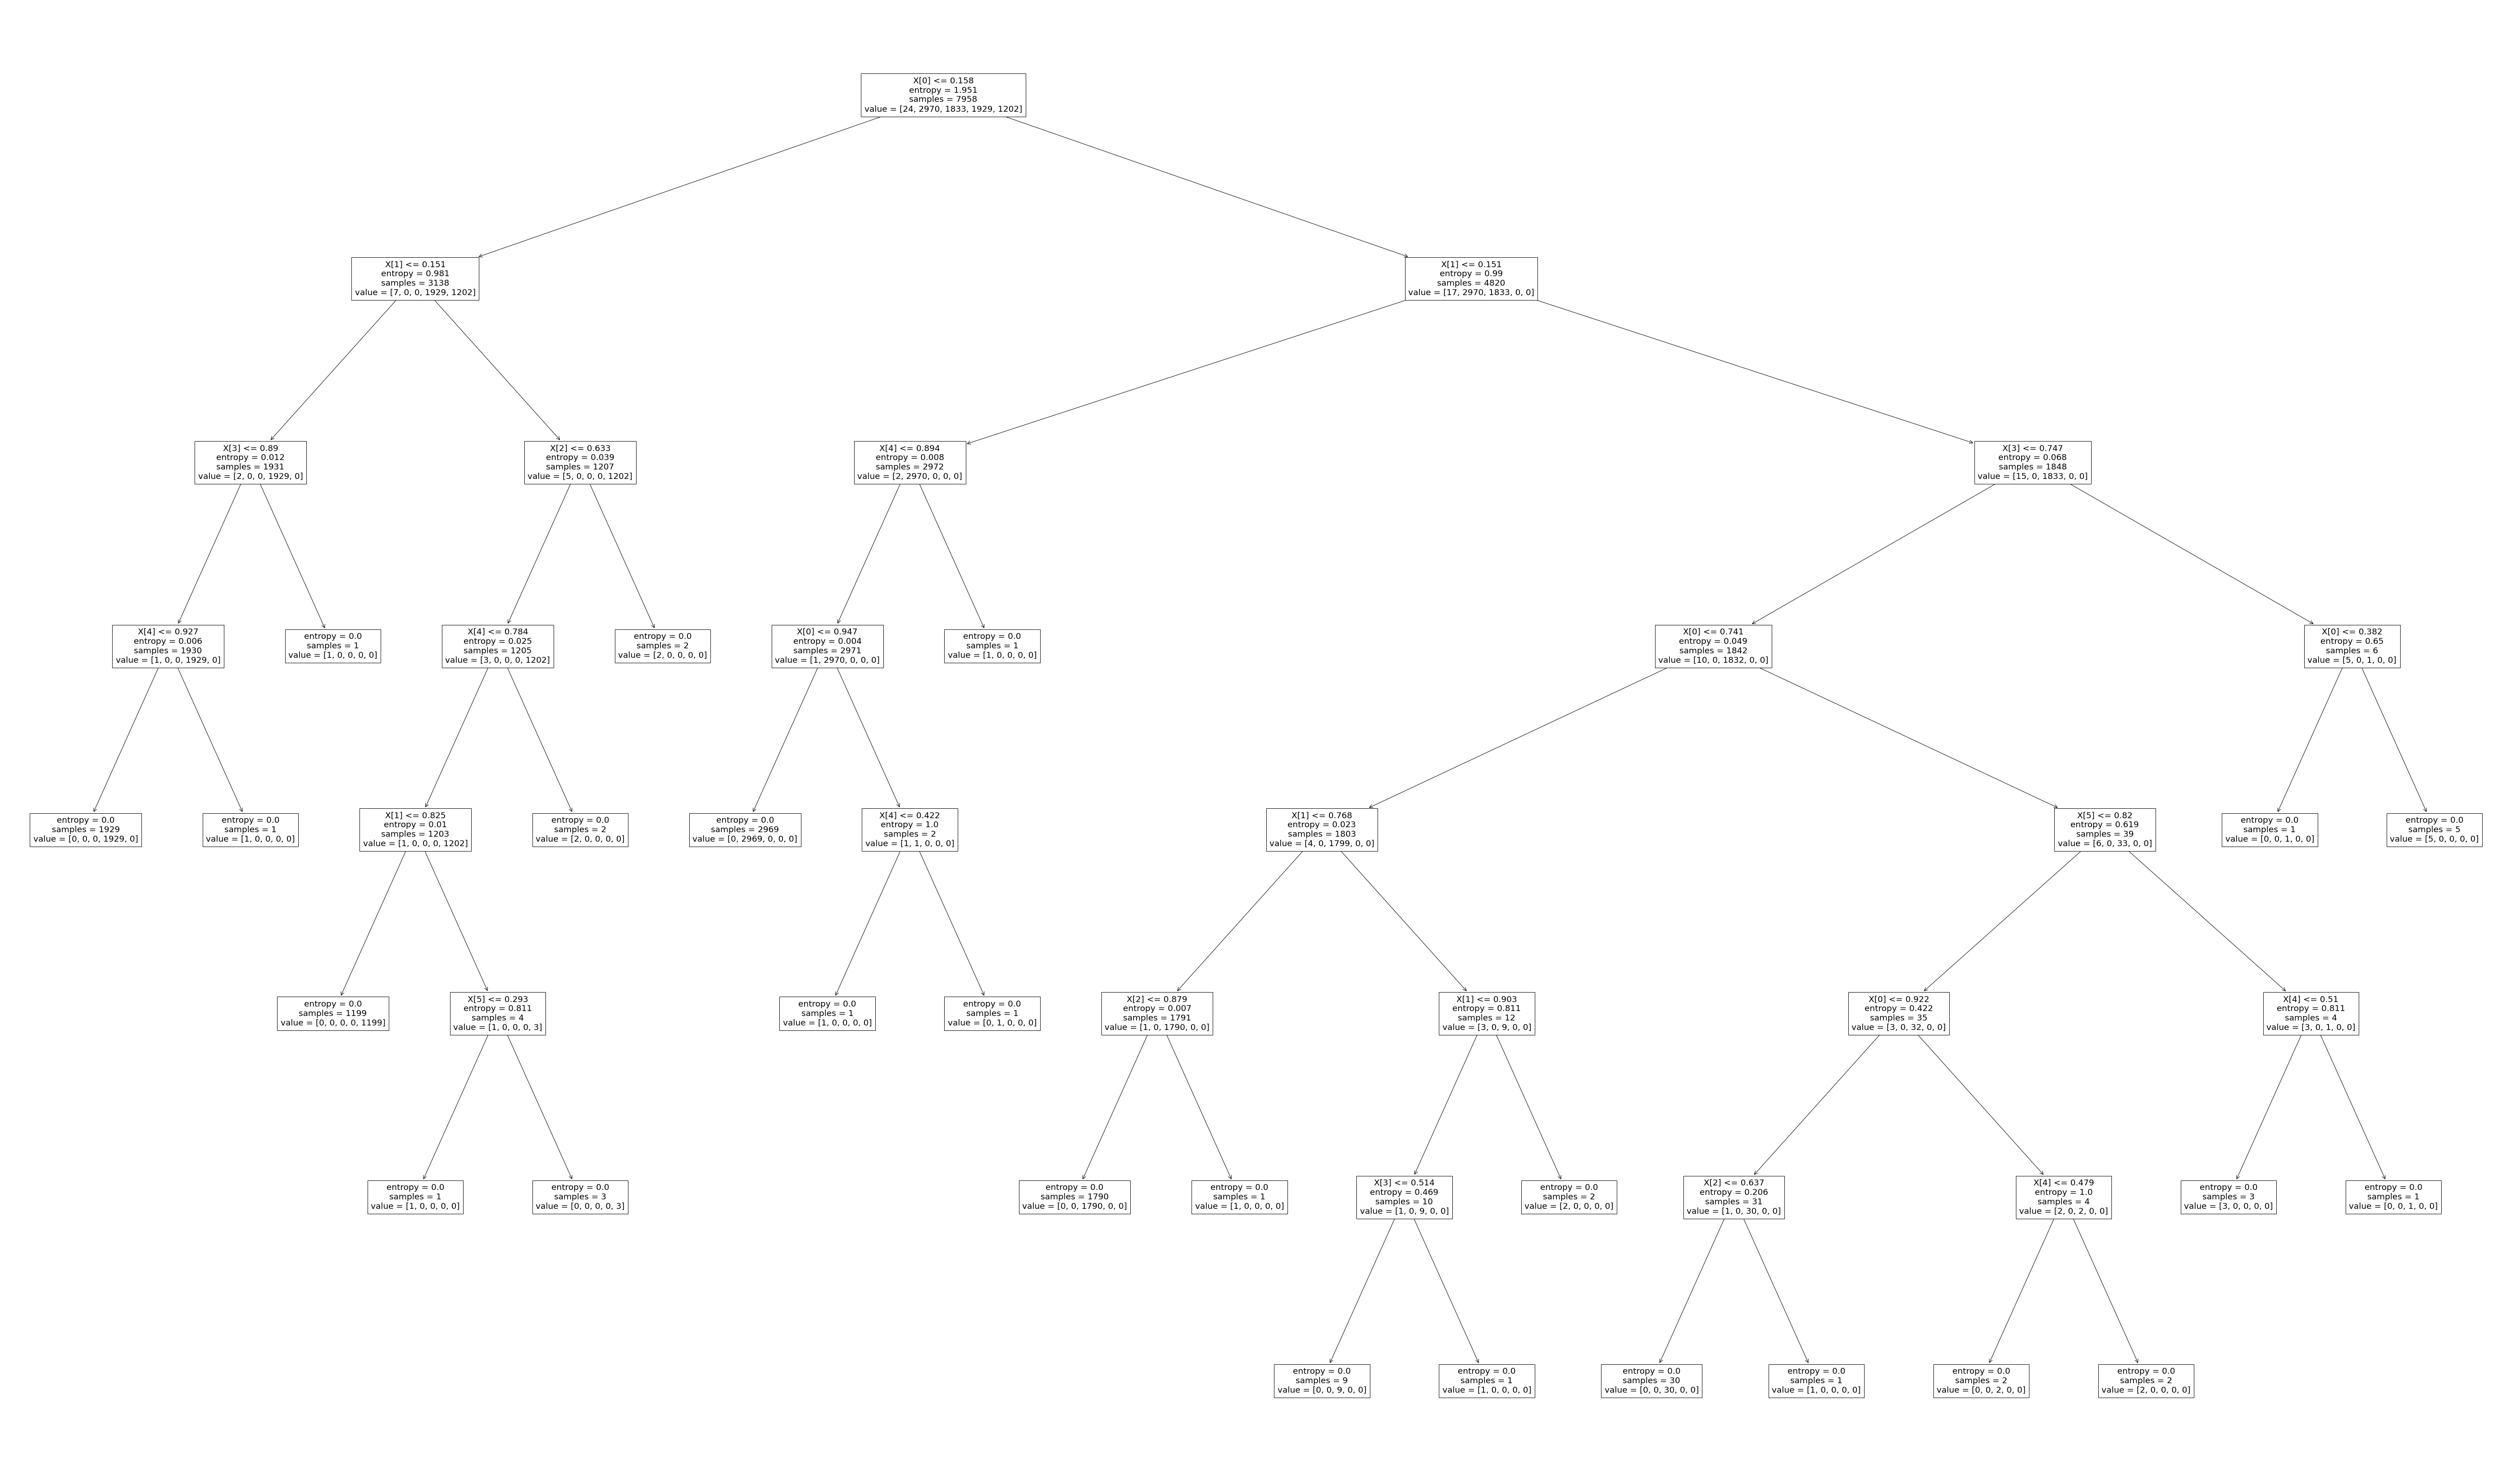

Minimum Acuity: Cluster 2
Intermediate Acuity: Cluster 3
Semi-Intensive Acuity: Cluster 0
Intensive Acuity: Cluster 1

Test Set Labels
Counter({0: 738, 2: 498, 1: 465, 3: 283, -1: 6})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 24
Resulting in best testing error rate of 0.3392137096774194

Classification on training set
Train Accuracy: 0.6862184873949579

Classification on testing set
Test Accuracy (splitting after clustering): 0.6209677419354839
Custom Misclassification Score: 1831.5

Classification on testing set
Test Accuracy (splitting before clustering): 0.6607862903225806
Custom Misclassification Score: 1613.25



Classification Results
For KNN Classification with Euclidean m

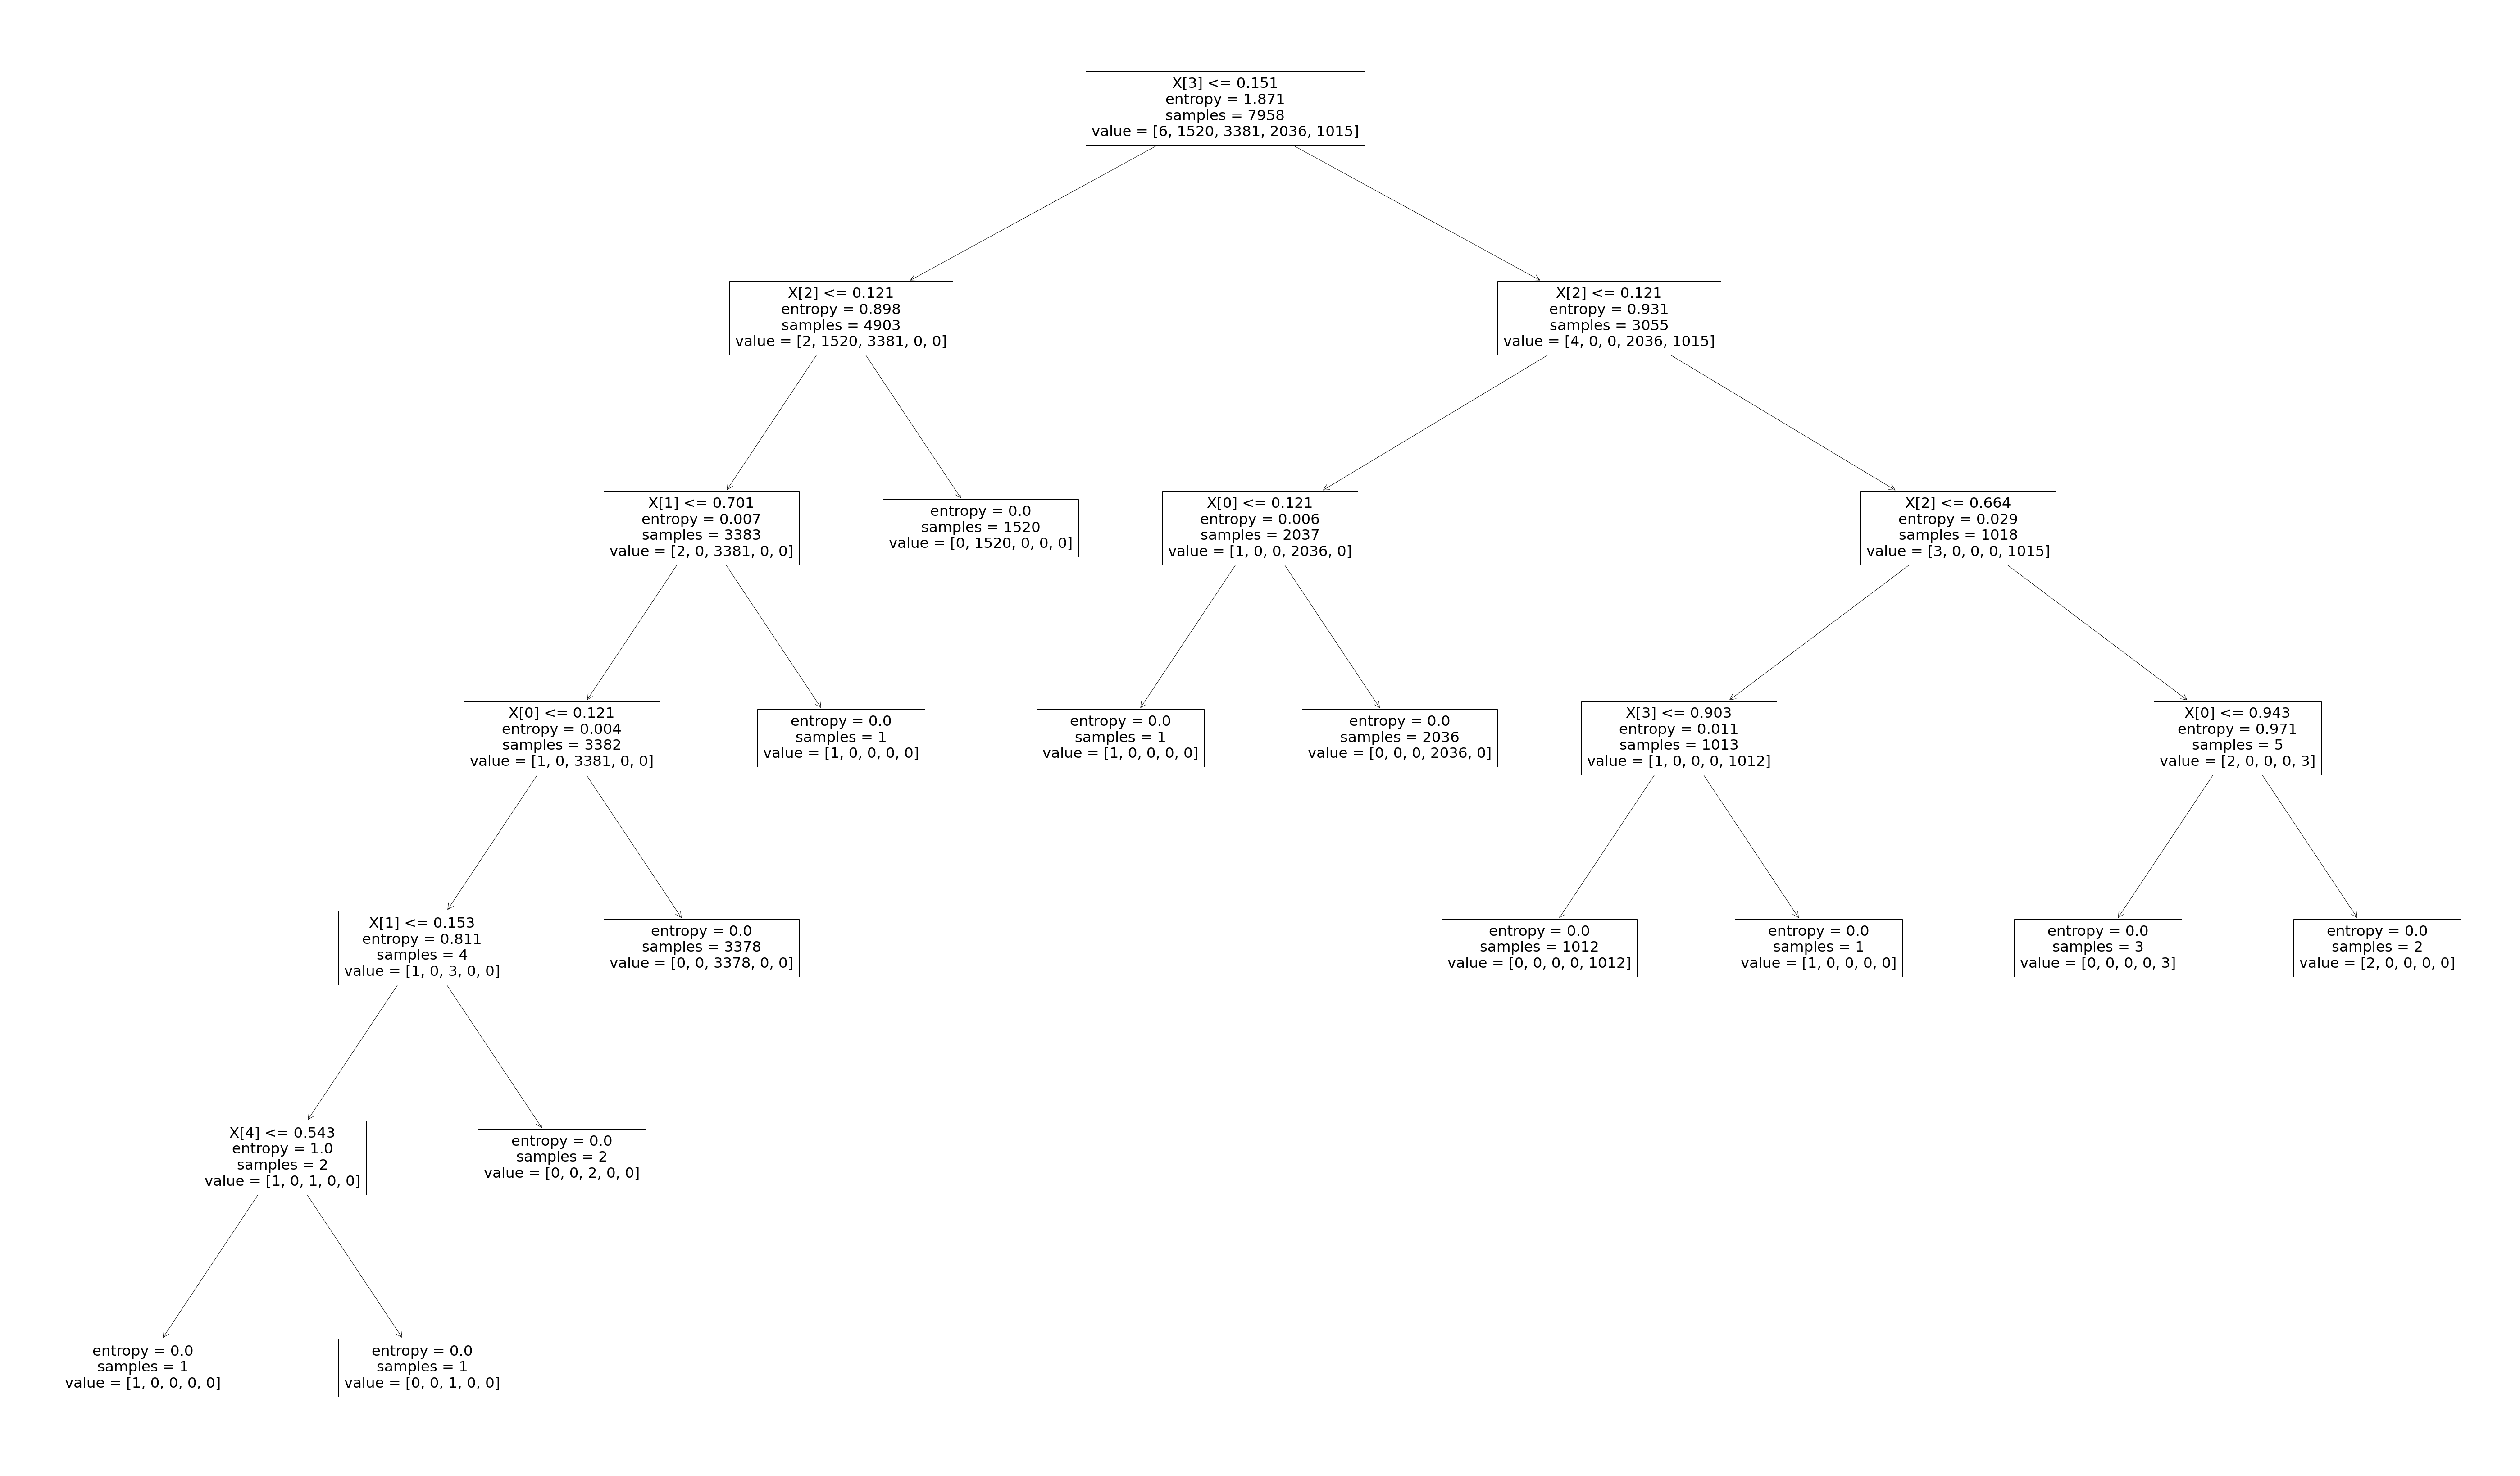

Minimum Acuity: Cluster 1
Intermediate Acuity: Cluster 0
Semi-Intensive Acuity: Cluster 2
Intensive Acuity: Cluster 3

Test Set Labels
Counter({1: 829, 2: 509, 0: 407, 3: 237, -1: 8})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 24
Resulting in best testing error rate of 0.33753784056508573

Classification on training set
Train Accuracy: 0.6867671691792295

Classification on testing set
Test Accuracy (splitting after clustering): 0.6251261352169526
Custom Misclassification Score: 2482.0

Classification on testing set
Test Accuracy (splitting before clustering): 0.6624621594349143
Custom Misclassification Score: 2217.25



Classification Results
For KNN Classification with Euclidean 

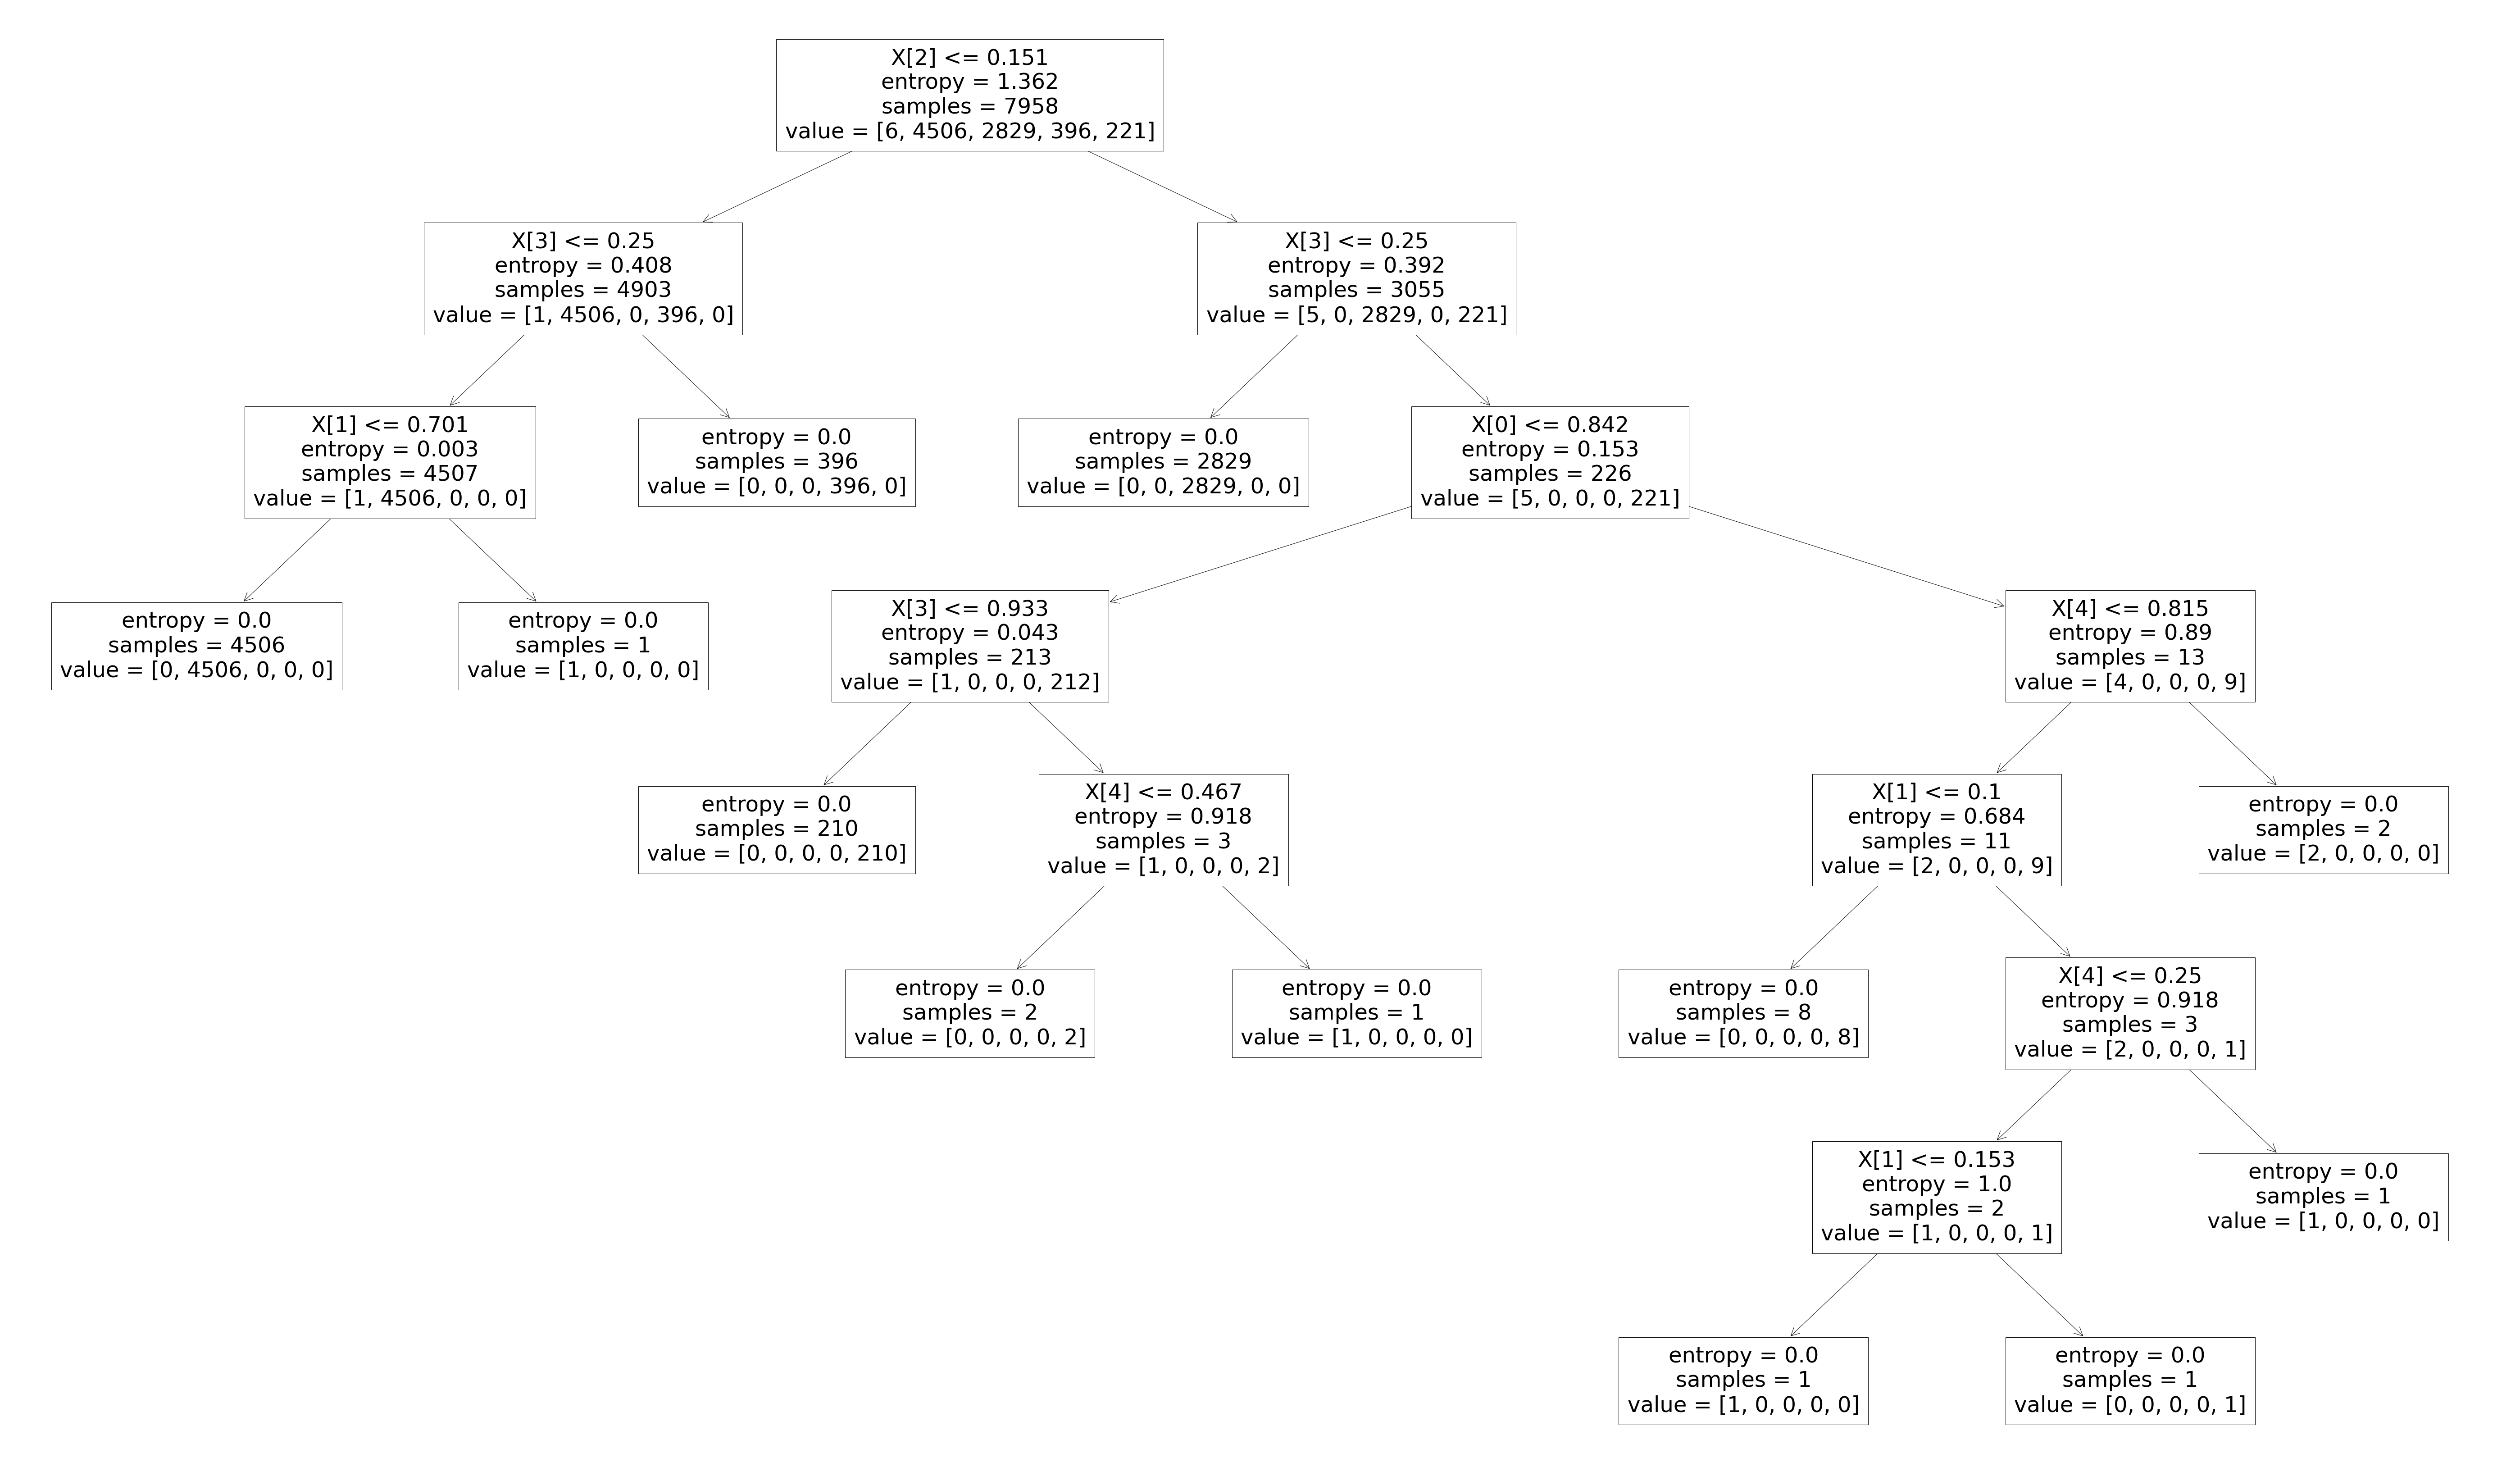

Minimum Acuity: Cluster 0
Intermediate Acuity: Cluster 2
Semi-Intensive Acuity: Cluster 1
Intensive Acuity: Cluster 3

Test Set Labels
Counter({0: 1132, 1: 702, 2: 104, 3: 51, -1: 1})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 24
Resulting in best testing error rate of 0.3403720462543992

Classification on training set
Train Accuracy: 0.6857286600704343

Classification on testing set
Test Accuracy (splitting after clustering): 0.6239316239316239
Custom Misclassification Score: 2544.0

Classification on testing set
Test Accuracy (splitting before clustering): 0.6596279537456008
Custom Misclassification Score: 2297.0



Classification Results
For KNN Classification with Euclidean me

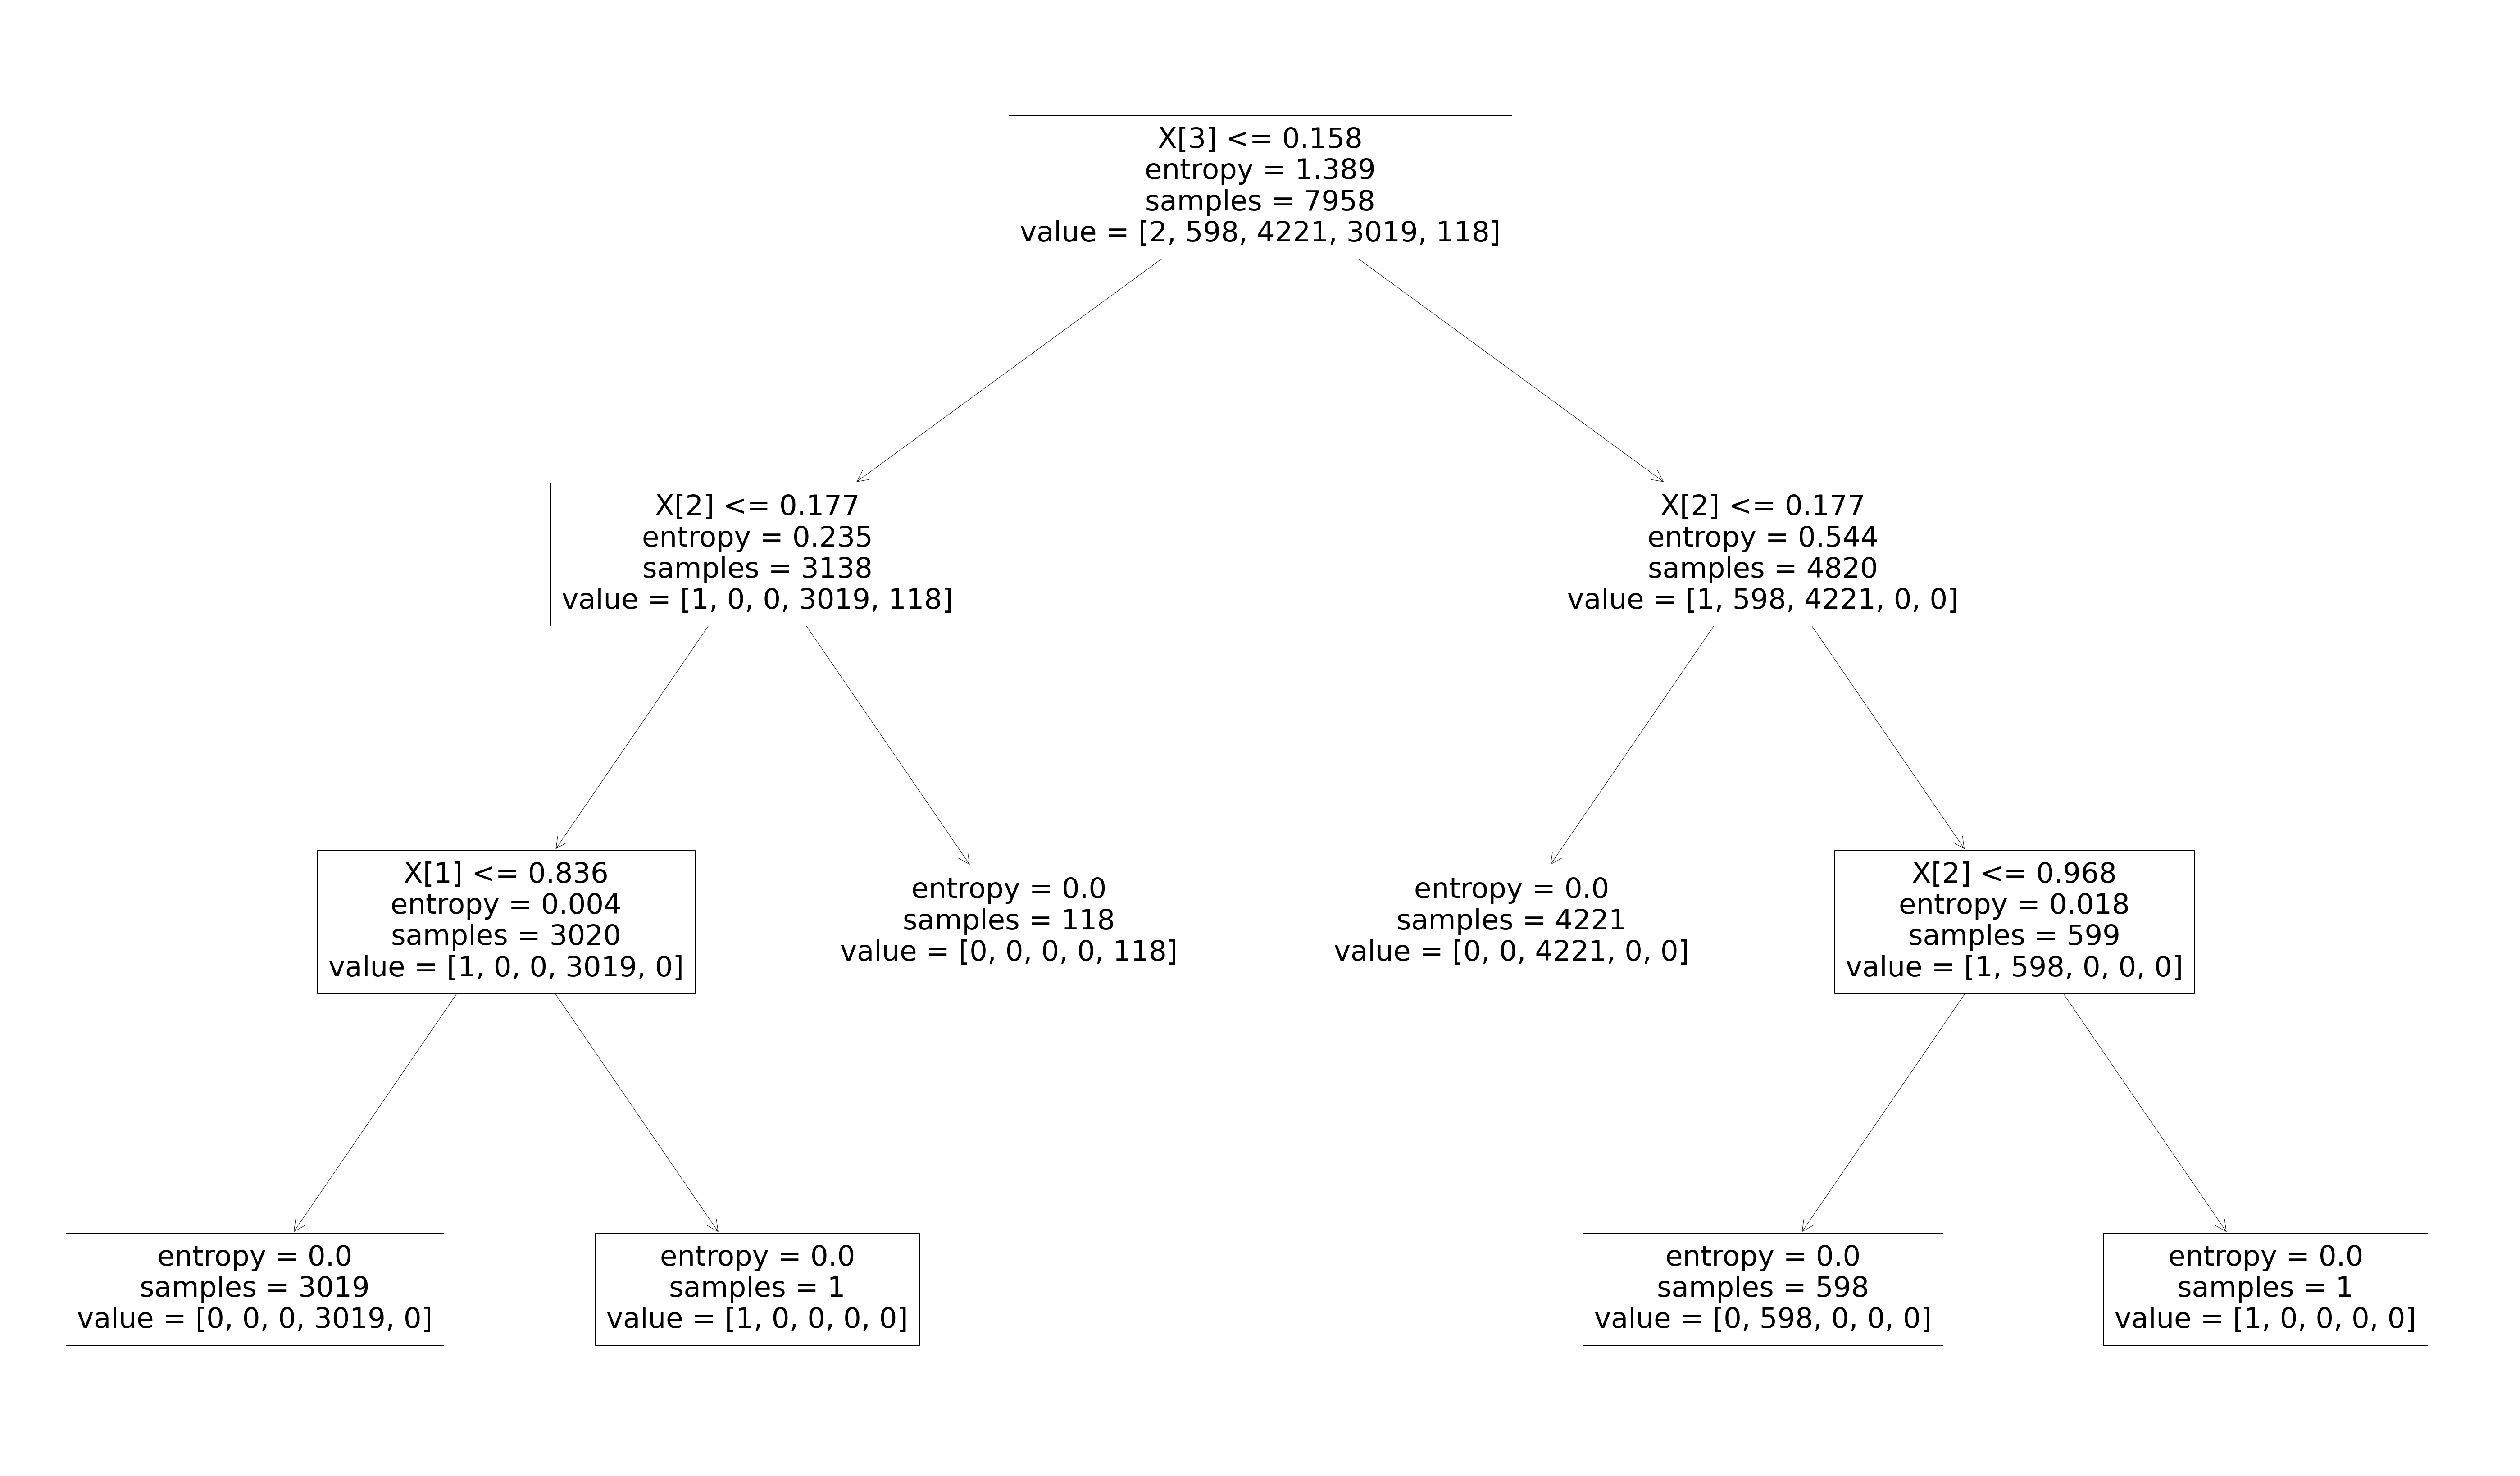

Minimum Acuity: Cluster 2
Intermediate Acuity: Cluster 3
Semi-Intensive Acuity: Cluster 1
Intensive Acuity: Cluster 0

Test Set Labels
Counter({1: 1053, 2: 745, 0: 155, 3: 37})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 2
Resulting in best testing error rate of 0.0030150753768843908

Classification on training set
Train Accuracy: 0.9981562185719075

Classification on testing set
Test Accuracy (splitting after clustering): 0.9949748743718593
Custom Misclassification Score: 22.0

Classification on testing set
Test Accuracy (splitting before clustering): 0.9944723618090452
Custom Misclassification Score: 29



Classification Results
For KNN Classification with Euclidean metric:
k* = 

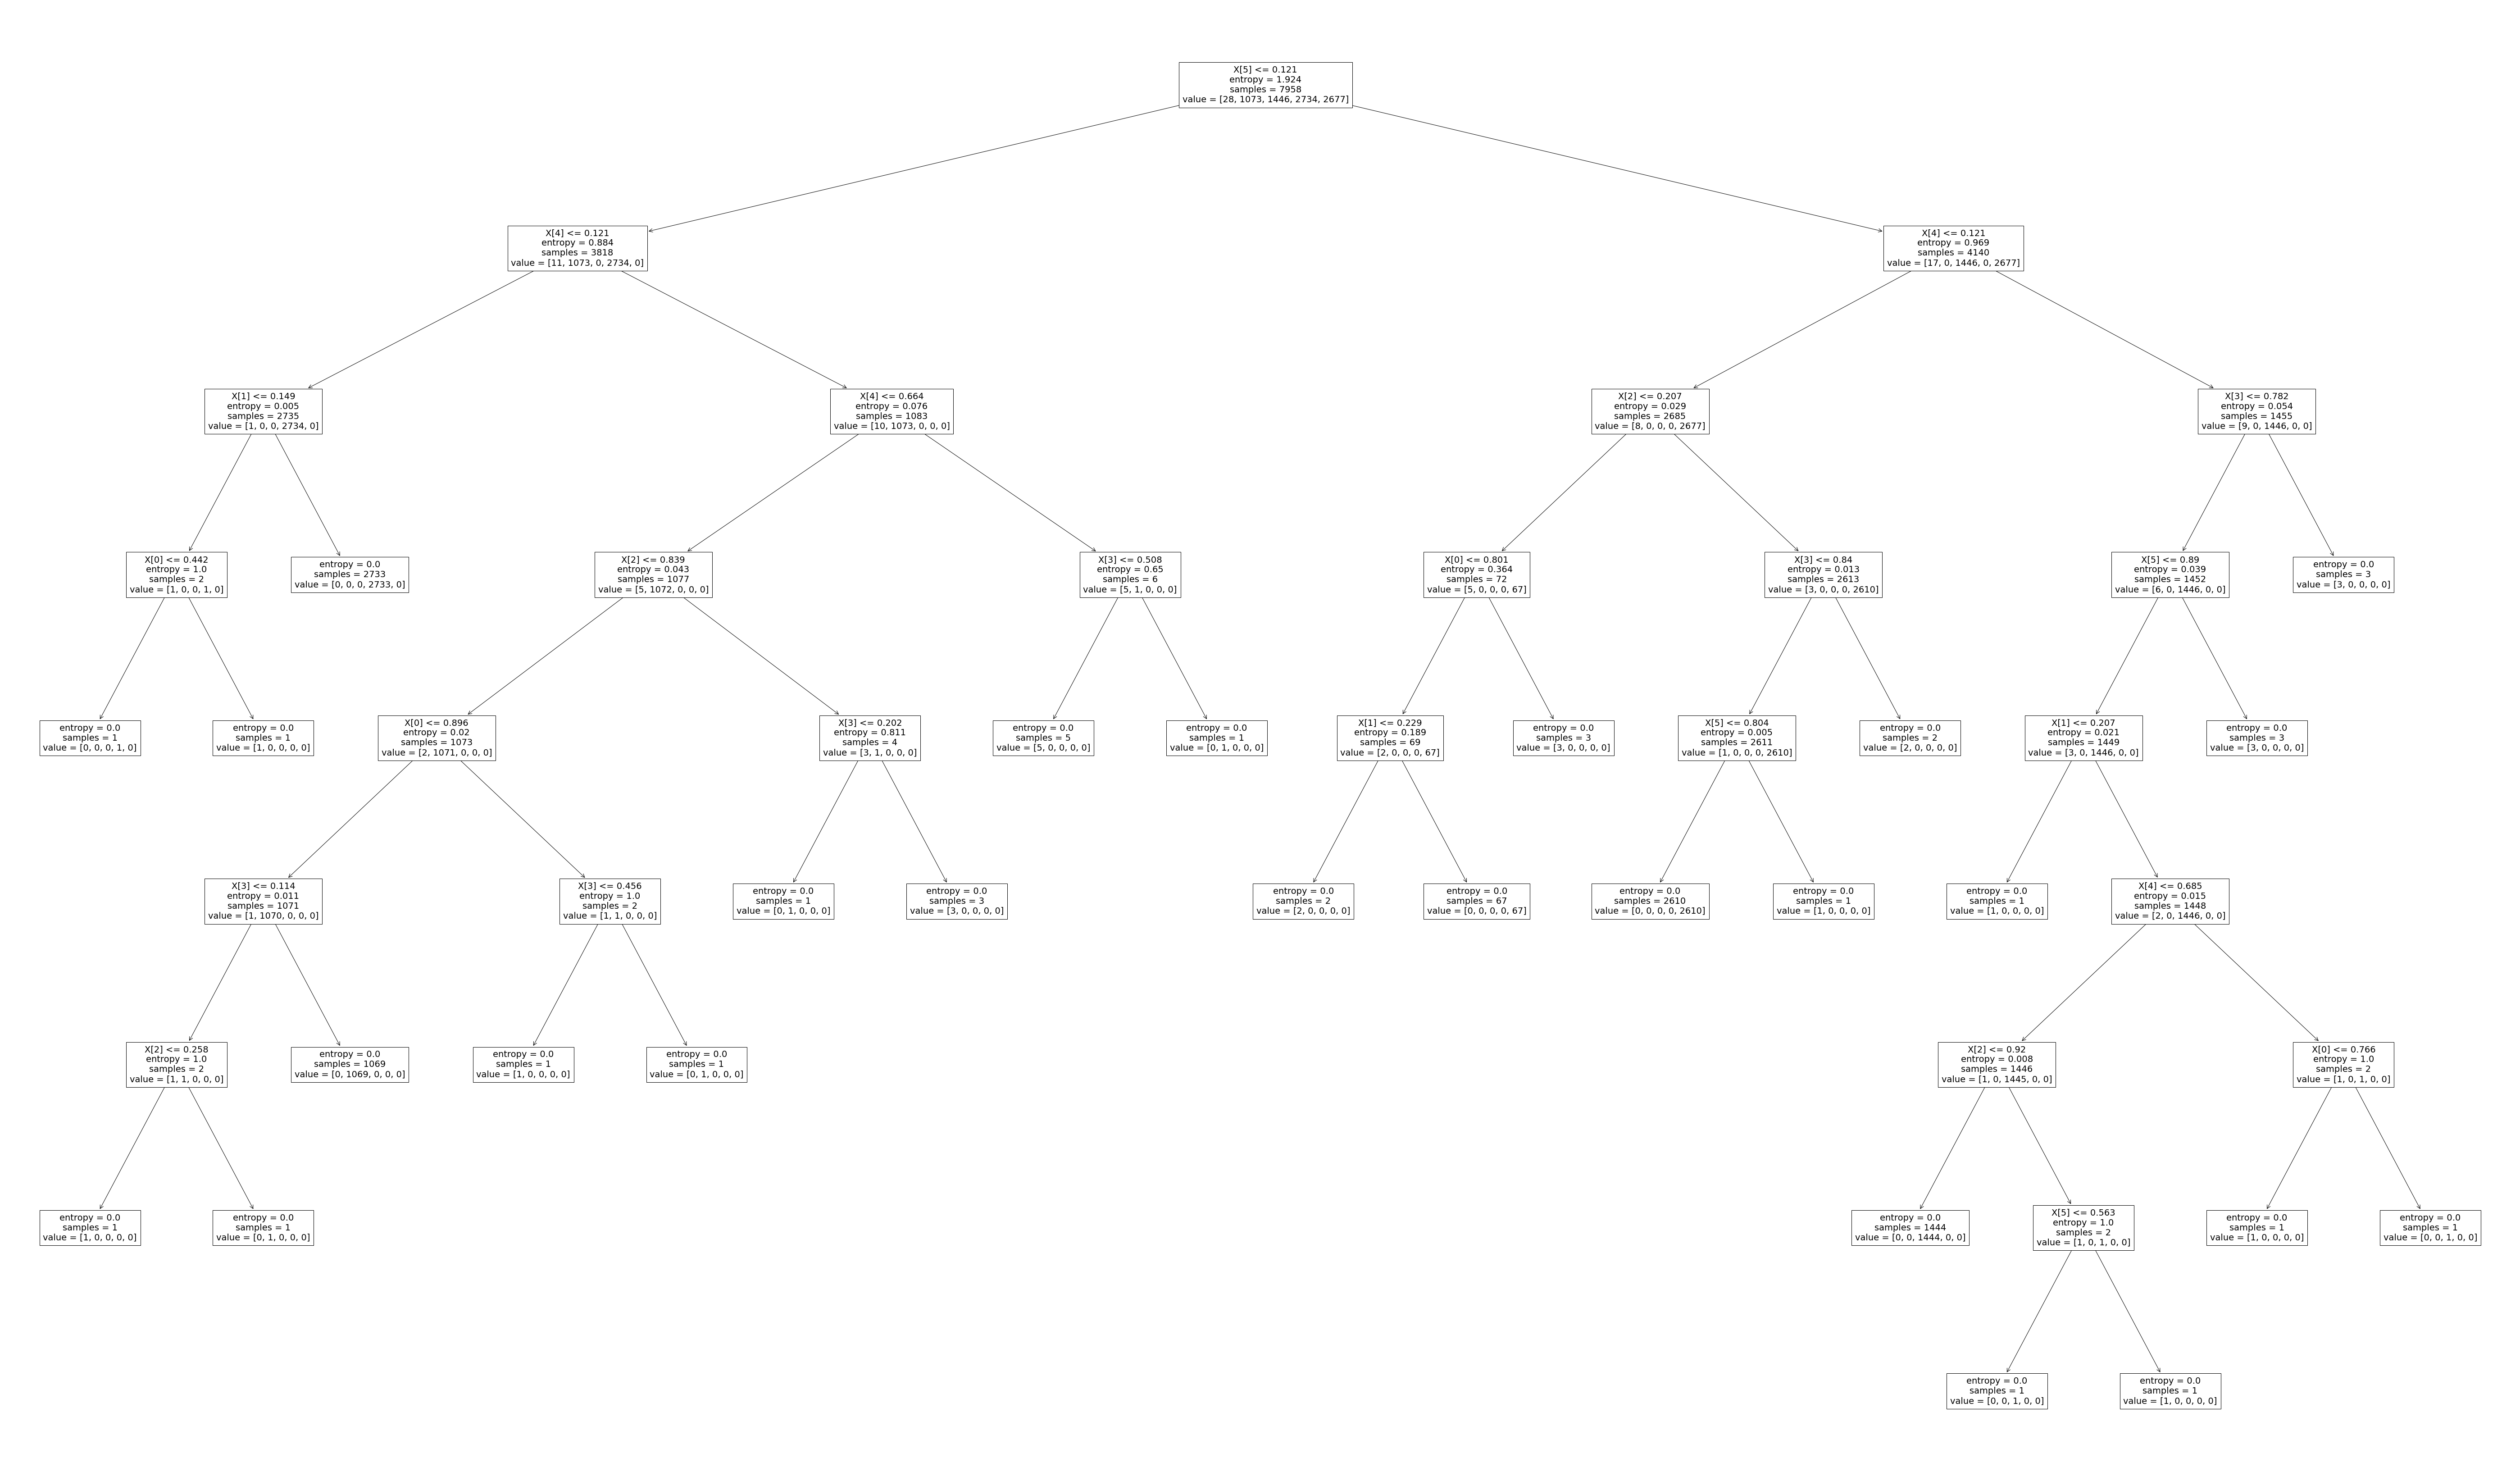

Minimum Acuity: Cluster 2
Intermediate Acuity: Cluster 0
Semi-Intensive Acuity: Cluster 3
Intensive Acuity: Cluster 1

Test Set Labels
Counter({3: 679, 2: 658, 1: 370, 0: 272, -1: 11})

----------------

KNN Classification with features: ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


Checking if it's better to split the dataset AFTER or BEFORE clustering

For KNN Classification with Euclidean metric:
k* = 17
Resulting in best testing error rate of 0.001010611419908991

Classification on training set
Train Accuracy: 0.9991598050747773

Classification on testing set
Test Accuracy (splitting after clustering): 0.9974734714502274
Custom Misclassification Score: 13.25

Classification on testing set
Test Accuracy (splitting before clustering): 0.998989388580091
Custom Misclassification Score: 5.5



Classification Results
For KNN Classification with Euclidean metr

In [23]:
# Conclusion 

summary = pd.DataFrame(columns = ["DBSCAN: Feature 1", "DBSCAN: Feature 2", "DBSCAN: Feature 3", "DBSCAN: Feature 4", "DBSCAN: Feature 5", "DBSCAN: Feature 6", "DBSCAN: Eps", "DBSCAN: MinPts", 
                                  "DBSCAN Minimum Care Count: Train Set", "DBSCAN Intermediate Care Count: Train Set", "DBSCAN Semi-Intensive Care Count: Train Set", "DBSCAN Intensive Care Count: Train Set", 
                                  "DBSCAN Outliers Count: Train Set", "DBSCAN: Silhouette Score", "DBSCAN Minimum Care Count: Test Set", "DBSCAN Intermediate Care Count: Test Set", "DBSCAN Semi-Intensive Care Count: Test Set", 
                                  "DBSCAN Intensive Care Count: Test Set", "DBSCAN Outliers Count: Test Set", "|", "KNN: K*", "KNN: Train Accuracy", "KNN: Test Accuracy", "KNN: Custom Error Score"]) 


# for clustering

model_optionsL = [ ['Temperature_Std', 'AcuteFreq', 'Icd9_140-239', 'Icd9_580-629', 'Icd9_390-459'],

['SystolicBP_Max', 'DiagnosisCount', 'Icd9_140-239', 'Icd9_280-289'],

['BMI_Max', 'SystolicBP_Std', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279'],

['SystolicBP_Max','DiastolicBP_Max', 'BMI_Max', 'Temperature_Std', 'Age', 'Icd9_460-519'],
                  
['SystolicBP_Max', 'Age', 'Icd9_390-459', 'Icd9_460-519'],

['Icd9_240-279', 'Icd9_290-319', 'Icd9_390-459', 'Icd9_460-519', 'SystolicBP_Std', 'Age'],

['DiastolicBP_Max', 'RespiratoryRate_Min', 'Icd9_580-629', 'Icd9_290-319', 'AcuteFreq'],

['DiagnosisCount', 'RespiratoryRate_Min', 'Icd9_290-319', 'Icd9_140-239', 'Icd9_390-459'],

['AcuteFreq', 'Temperature_Std', 'Icd9_280-289', 'Icd9_240-279'],

['DiagnosisCount', 'DiastolicBP_Max', 'BMI_Max', 'SystolicBP_Std', 'Icd9_580-629', 'Icd9_460-519'] ]


# For classification
col_names = ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629',
            'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459'] 

for i, columnsL in enumerate(model_optionsL):
    row = []
    
    print("Model Option", i+1)
    print("DBSCAN Clustering with features:", columnsL)
    
    print("\nClustering Results")
    trainY, testY, acuityL, imp_features, row_p1 = Cluster(columnsL)
    
    # skip if no 4 cluster option is found
    if isinstance(trainY, str):
        print("Couldn't yeild 4 clusters with DBSCAN -- with this feature list")
        print("\n______________________________________________________________________\n\n")
        continue
    
    
    print("\n----------------\n")
    
    # change col_names ???
    print("KNN Classification with features:", col_names)
    
    print("\n\nChecking if it's better to split the dataset AFTER or BEFORE clustering\n")
    Classify2(col_names, trainY, testY, acuityL)
    
    print()
    print()
    
    print("Classification Results")
    row_p2 = Classify(col_names, trainY, testY, acuityL)
#     print("hi")
    
    print("\n______________________________________________________________________\n\n")
    
    
#     print(len(row_p1))
    row = row_p1+row_p2
    num = i+1
    name = "Model Option %d" %num
    summary.loc[name] = row


In [24]:
# display(summary)


In [25]:
summary = summary.transpose()

display(summary)


Model Option 1   Model Option 2  \
DBSCAN: Feature 1                            Temperature_Std   SystolicBP_Max   
DBSCAN: Feature 2                                  AcuteFreq   DiagnosisCount   
DBSCAN: Feature 3                               Icd9_140-239     Icd9_140-239   
DBSCAN: Feature 4                               Icd9_580-629     Icd9_280-289   
DBSCAN: Feature 5                               Icd9_390-459              N/A   
DBSCAN: Feature 6                                        N/A              N/A   
DBSCAN: Eps                                            0.248            0.298   
DBSCAN: MinPts                                            10                8   
DBSCAN Minimum Care Count: Train Set         Label (1): 3512  Label (1): 6716   
DBSCAN Intermediate Care Count: Train Set     Label (2): 195   Label (2): 525   
DBSCAN Semi-Intensive Care Count: Train Set  Label (0): 3807   Label (0): 619   
DBSCAN Intensive Care Count: Train Set        Label (3): 408    Label (3): 96   
DBSCAN Outliers Count: Train Set              Label (-1): 36    Label (-1): 2   
DBSCAN: Silhouette Score                            0.849094         0.979198   
DBSCAN Minimum Care Count: Test Set           Label (1): 880  Label (1): 1667   
DBSCAN Intermediate Care Count: Test Set       Label (2): 54   Label (2): 131   
DBSCAN Semi-Intensive Care Count: Test Set    Label (0): 954   Label (0): 168   
DBSCAN Intensive Care Count: Test Set         Label (3): 101    Label (3): 24   
DBSCAN Outliers Count: Test Set                Label (-1): 1    Label (-1): 0   
|                                                          |                |   
KNN: K*                                                   11                2   
KNN: Train Accuracy                                 0.998485         0.998994   
KNN: Test Accuracy                                  0.998492         0.997487   
KNN: Custom Error Score                                 6.25            17.75   

                                              Model Option 5   Model Option 6  \
DBSCAN: Feature 1                             SystolicBP_Max     Icd9_240-279   
DBSCAN: Feature 2                                        Age     Icd9_290-319   
DBSCAN: Feature 3                               Icd9_390-459     Icd9_390-459   
DBSCAN: Feature 4                               Icd9_460-519     Icd9_460-519   
DBSCAN: Feature 5                                        N/A   SystolicBP_Std   
DBSCAN: Feature 6                                        N/A              Age   
DBSCAN: Eps                                            0.242            0.298   
DBSCAN: MinPts                                             8               12   
DBSCAN Minimum Care Count: Train Set         Label (2): 1815  Label (2): 1929   
DBSCAN Intermediate Care Count: Train Set    Label (0): 2002  Label (3): 1202   
DBSCAN Semi-Intensive Care Count: Train Set  Label (1): 1902  Label (0): 2970   
DBSCAN Intensive Care Count: Train Set       Label (3): 2237  Label (1): 1833   
DBSCAN Outliers Count: Train Set               Label (-1): 2   Label (-1): 24   
DBSCAN: Silhouette Score                            0.698006         0.736804   
DBSCAN Minimum Care Count: Test Set           Label (2): 449   Label (2): 498   
DBSCAN Intermediate Care Count: Test Set      Label (0): 487   Label (3): 283   
DBSCAN Semi-Intensive Care Count: Test Set    Label (1): 485   Label (0): 738   
DBSCAN Intensive Care Count: Test Set         Label (3): 568   Label (1): 465   
DBSCAN Outliers Count: Test Set                Label (-1): 1    Label (-1): 6   
|                                                          |                |   
KNN: K*                                                   10               28   
KNN: Train Accuracy                                  0.99736         0.676456   
KNN: Test Accuracy                                  0.995978         0.667843   
KNN: Custom Error Score                                19.75           1585.

In [26]:
def highlight_cols(x):
      
    # copy df to new - original data is not changed
    summary = x.copy()
      
    # select all values to green color
    summary.loc[:, :] = 'background-color: white'
      
    # overwrite values grey color
    summary["Model Option 9"] = 'background-color: yellow'
      
    # return color df
    return summary 
  
print("Highlighted DataFrame\n")

# display(summary.style.apply(highlight_cols, axis = None))

summary_df = summary.style.apply(highlight_cols, axis = None)
display(summary_df)
print("The KNN Classification uses the following features:  " + str(col_names))

# summary.style.highlight_max(subset=["Model Option 1"])


Highlighted DataFrame



The KNN Classification uses the following features:  ['SystolicBP_Max', 'Temperature_Std', 'Age', 'DiagnosisCount', 'Icd9_460-519', 'Icd9_580-629', 'Icd9_140-239', 'Icd9_280-289', 'Icd9_240-279', 'Icd9_580-629', 'Icd9_390-459']


In [27]:
# # Downloading the dataframe as a image 
# # Uncomment the two lines below when running the notebook to download the dataframe above

# import dataframe_image as dfi
 
# summary_df.export_png('dataframe.png')

